# Introduction
The project below investigates 2019 Trends in International Math and Science Study (TIMSS) Data for 8th graders.

_Source: [2019 TIMSS Database](https://timss2019.org/international-database/)_

<div id='top'></div>

# Table of Contents
* [Business Understanding](#business_understanding)
* [Data Understanding](#data_understanding)
* [Data Preparation](#data_preparation)
* [Data Modeling](#data_modeling)
* [Evaluate Results](#evaluate_results)
* [Deploy Model](#deploy_model)

<div id='business_understanding'></div>

# Business Understanding

### Questions of Interest
1. How does a student's enviroment at home, in the classroom, and at school affect academic understanding?
2. Are there specific teacher behaviors that lead to improved understanding in specific disciplines?
3. What can students and teachers do to improve student academic understanding?

The project will cover a variety of analyses regarding vast data collected. The project will include:
* prediction of student score based on student attitudes and demographics, school characteristics
* prediction of student scores based on teacher attitudes and practices
* recommendation engine for additional study problems for a given student (or group of students from a school or country)
* recommendation engine for areas of investment or professional development for a given teacher (or group of teachers from a school or country)

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import pyreadstat
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import random
import re
from pandas.api.types import CategoricalDtype
pd.options.display.max_columns = None
pd.options.display.max_rows = 100

<div id='data_understanding'></div>

[Return to Top](#top)

# Data Understanding

### Load Data
Import the 2019 TIMSS Data into six separate dataframes

In [ ]:
meta = pyreadstat.read_sav('T19_G8_SPSS Data/bsaaadm7.sav', metadataonly=True)
stud_ach_cols = meta[0].columns[:1265]

In [ ]:
school = 0
stud_ach = 0
student = 0
stud_teach = 0
math_teach = 0
sci_teach = 0
for file in glob.glob('T19_G8_SPSS Data/*.sav'):
    print(file)
    if re.search('bcg',file) != None:
        school_cols = ['IDCNTRY','IDSCHOOL','IDPOP','IDGRADER','IDGRADE','ITLANG_C','LCID_C','BCBGDAS','BCBGEAS','BCBGMRS','BCBGSRS','BCDGDAS','BCDGEAS','BCDGMRS','BCDGSRS','BCDGSBC','BCDGTIHY']
        try:
            school = school.append(pd.read_spss(file, usecols=school_cols), ignore_index=True, sort=False)
        except:
            school = pd.read_spss(file, usecols=school_cols)
    elif re.search('bsa',file) != None:
        try:
            stud_ach = stud_ach.append(pd.read_spss(file, usecols=stud_ach_cols), ignore_index=True, sort=False)
        except:
            stud_ach = pd.read_spss(file, usecols=stud_ach_cols)
    elif re.search('bsg',file) != None:
        student_cols = ['IDCNTRY','IDBOOK','IDSCHOOL','IDCLASS','IDSTUD','BSBG01','BSBG03','BSBG04','BSBG05A','BSBG05B','BSBG05C','BSBG05D','BSBG05E','BSBG05F','BSBG05G','BSBG05H','BSBG05I','BSBG06A','BSBG06B','BSBG07','BSBG08A','BSBG08B','BSBG09A','BSBG09B','BSBG10','BSBG11A','BSBG11B','BSBG12A','BSBG12B','BSBG12C','BSBG12D','BSBG12E','BSBG12F','IDPOP','IDGRADE','ITLANG_SQ','LCID_SQ','ITLANG_SA','LCID_SA','ITSEX','BSDAGE','BSBGHER','BSDGHER','BSBGSSB','BSDGSSB','BSBGSB','BSDGSB','BSBGSLM','BSDGSLM','BSBGICM','BSDGICM','BSBGDML','BSDGDML','BSBGSCM','BSDGSCM','BSBGSVM','BSDGSVM','BSBGSLS','BSDGSLS','BSBGICS','BSDGICS','BSBGSCS','BSDGSCS','BSBGSVS','BSDGSVS','BSBGSLB','BSDGSLB','BSBGICB','BSDGICB','BSBGSCB','BSDGSCB','BSBGSLE','BSDGSLE','BSBGICE','BSDGICE','BSBGSCE','BSDGSCE','BSBGSLC','BSDGSLC','BSBGICC','BSDGICC','BSBGSCC','BSDGSCC','BSBGSLP','BSDGSLP','BSBGICP','BSDGICP','BSBGSCP','BSDGSCP','BSBGSEC','BSDGSEC', 'BSDG05S','BSDGEDUP']
        try:
            student = student.append(pd.read_spss(file, usecols=student_cols), ignore_index=True, sort=False)
        except:
            student = pd.read_spss(file, usecols=student_cols)
    elif re.search('bst',file) != None:
        try:
            stud_teach_cols = ['IDCNTRY', 'IDBOOK', 'IDSCHOOL', 'IDCLASS', 'IDSTUD', 'IDTEALIN', 'IDTEACH','IDLINK', 'IDPOP', 'IDGRADE', 'IDSUBJ', 'ITCOURSE', 'NMTEACH','NSTEACH']
            scores = ['MMAT','SSCI','MALG','MAPP','MDAT','MGEO','MKNO','MNUM','MREA','SAPP','SBIO','SCHE','SEAR','SKNO','SPHY','SREA']
            for item in scores:
                stud_teach_cols = stud_teach_cols + [col for col in stud_teach.columns if item in col]
            stud_teach = stud_teach.append(pd.read_spss(file, usecols=stud_teach_cols), ignore_index=True, sort=False)
        except:
            stud_teach = pd.read_spss(file)
            stud_teach_cols = ['IDCNTRY', 'IDBOOK', 'IDSCHOOL', 'IDCLASS', 'IDSTUD', 'IDTEALIN', 'IDTEACH','IDLINK', 'IDPOP', 'IDGRADE', 'IDSUBJ', 'ITCOURSE', 'NMTEACH','NSTEACH']
            scores = ['MMAT','SSCI','MALG','MAPP','MDAT','MGEO','MKNO','MNUM','MREA','SAPP','SBIO','SCHE','SEAR','SKNO','SPHY','SREA']
            for item in scores:
                stud_teach_cols = stud_teach_cols + [col for col in stud_teach.columns if item in col]
            stud_teach = stud_teach.loc[:,stud_teach_cols]
    elif re.search('btm',file) != None:
        try:
            math_teach = math_teach.append(pd.read_spss(file), ignore_index=True, sort=False)
        except:
            math_teach = pd.read_spss(file)
    elif re.search('bts',file) != None:
        try:
            sci_teach = sci_teach.append(pd.read_spss(file), ignore_index=True, sort=False)
        except:
            sci_teach = pd.read_spss(file)

In [ ]:
math_teach_drop_cols = ['BTBM18','BTBM22','VERSION','SCOPE']
for drop_head in math_teach_drop_cols:
    drop_cols = [col for col in math_teach.columns if drop_head in col]
math_teach.drop(columns=drop_cols,inplace=True)

In [ ]:
sci_teach_drop_cols = ['BTBS17','BTBS21','VERSION','SCOPE']
for drop_head in sci_teach_drop_cols:
    drop_cols = [col for col in sci_teach.columns if drop_head in col]
sci_teach.drop(columns=drop_cols,inplace=True)

In [15]:
file_name = 'T19_G8_Codebooks/T19_G8_Codebook.xlsx'
school_codes = pd.read_excel(file_name, sheet_name='BCGM7').set_index('Variable').iloc[:,:1]
stud_ach_codes = pd.read_excel(file_name, sheet_name='BSAM7').set_index('Variable').iloc[:,:1]
student_codes = pd.read_excel(file_name, sheet_name='BSGM7').set_index('Variable').iloc[:,:1]
stud_teach_codes = pd.read_excel(file_name, sheet_name='BSTM7').set_index('Variable').iloc[:,:1]
math_teach_codes = pd.read_excel(file_name, sheet_name='BTMM7').set_index('Variable').iloc[:,:1]
sci_teach_codes = pd.read_excel(file_name, sheet_name='BTSM7').set_index('Variable').iloc[:,:1]

In [ ]:
stud_teach_codes.head()

### Preprocessing Data
Preprocess the data to remove non-relevant information and variables

In [ ]:
def binary_scores(answer): 
    try: 
        float(answer)
        return np.nan
    except:
        if '*' in answer or ('CORRECT' in answer and 'INCORRECT' not in answer):
            return 1
        elif '*' not in answer or ('INCORRECT' in answer):
            return 0
        else:
            return np.nan

In [ ]:
def nanor(t):
    t = list(filter(lambda x: str(x) != 'nan', t))
    if len(t) == 0:
        return np.nan
    else:
        return int(any(t))
    
def nanand(t):
    t = list(filter(lambda x: str(x) != 'nan', t))
    if len(t) == 0:
        return np.nan
    else:
        return int(all(t))

In [ ]:
paper_cols_all = [col1 for col1 in list(stud_ach.columns) if (col1[1] == 'P' and col1[-4:] != '_val')]
for col1 in paper_cols_all:
    paper_cols = [str(col2) for col2 in list(stud_ach.columns) if (col1[:7] in col2 and col2[-4:] != '_val')]
    elec_cols = [col3 for col3 in list(stud_ach.columns) if (col1[2:7] in col3 and col1[0] == col3[0] and col3[1] == 'E')]
    print(col1, paper_cols + elec_cols)
    for col in paper_cols+elec_cols:
        stud_ach[col] = stud_ach[col].apply(binary_scores)
    if len(paper_cols) > 0:
        stud_ach[paper_cols[0]] = stud_ach.loc[:,paper_cols].apply(nanand, axis=1)
        stud_ach[elec_cols[0]] = stud_ach.loc[:,elec_cols].apply(nanand, axis=1)
        stud_ach[col1[:7]+'_val'] = stud_ach.loc[:,[paper_cols[0],elec_cols[0]]].apply(nanor, axis=1)
        stud_ach.drop(columns=paper_cols+elec_cols, inplace=True)

In [ ]:
scores = ['MMAT','SSCI','MALG','MAPP','MDAT','MGEO','MKNO','MNUM','MREA','SAPP','SBIO','SCHE','SEAR','SKNO','SPHY','SREA']
for item in scores:
    sub_col = [col for col in stud_ach.columns if item in col]
    print(sub_col)
    stud_ach[item.lower()+'_avg'] = stud_ach.loc[:,sub_col].mean(axis=1)
    stud_teach[item.lower()+'_avg'] = stud_teach.loc[:,sub_col].mean(axis=1)
    stud_ach[item.lower()+'_sd'] = stud_ach.loc[:,sub_col].std(axis=1)
    stud_ach.drop(sub_col, axis = 1, inplace=True)
    stud_teach.drop(sub_col, axis = 1, inplace=True)

In [ ]:
stud_ach.drop(columns=[col for col in stud_ach.columns if 'WGT' in col or 'JK' in col], inplace=True)

In [ ]:
school.to_csv('data/school.csv', index = False)
stud_ach.to_csv('data/stud_ach.csv', index = False)
student.to_csv('data/student.csv', index = False)
stud_teach.to_csv('data/stud_teach.csv', index = False)
math_teach.to_csv('data/math_teach.csv', index = False)
sci_teach.to_csv('data/sci_teach.csv', index = False)

In [3]:
school = pd.read_csv('data/school.csv')
stud_ach = pd.read_csv('data/stud_ach.csv')
student = pd.read_csv('data/student.csv')
stud_teach = pd.read_csv('data/stud_teach.csv')
math_teach = pd.read_csv('data/math_teach.csv')
sci_teach = pd.read_csv('data/sci_teach.csv')

C:\Users\sjhal\Anaconda3\envs\capstone\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\sjhal\Anaconda3\envs\capstone\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (14,15,16,58,60,62,66,68,70,72,74,76,78,80,82,84,86,88,90) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Explore Data
Explore the structure and values of the data

In [4]:
school.head()

IDCNTRY  IDSCHOOL  IDPOP     IDGRADER  IDGRADE ITLANG_C  \
0   7842.0    5001.0  Pop 2  Upper Grade  Grade 8  English   
1   7842.0    5004.0  Pop 2  Upper Grade  Grade 8  English   
2   7842.0    5006.0  Pop 2  Upper Grade  Grade 8  English   
3   7842.0    5007.0  Pop 2  Upper Grade  Grade 8  English   
4   7842.0    5008.0  Pop 2  Upper Grade  Grade 8  English   

                       LCID_C   BCBGDAS   BCBGEAS   BCBGMRS   BCBGSRS  \
0  English (U.A.E. Abu Dhabi)   9.79606   7.03177  14.25596  14.57241   
1  English (U.A.E. Abu Dhabi)  10.10482   9.56054  12.92960  14.57241   
2  English (U.A.E. Abu Dhabi)  10.43939  11.35999   8.03304   7.45575   
3  English (U.A.E. Abu Dhabi)  12.80218  13.19357  12.29366  12.50979   
4  English (U.A.E. Abu Dhabi)  14.02858  13.19357   4.23486   4.07624   

               BCDGDAS             BCDGEAS         BCDGMRS         BCDGSRS  \
0       Minor Problems     Medium Emphasis    Not Affected    Not Affected   
1       Minor Problems     Medium Emphasis    Not Affected    Not Affected   
2       Minor Problems       High Emphasis        Affected  Affected A Lot   
3  Hardly Any Problems  Very High Emphasis    Not Affected    Not Affected   
4  Hardly Any Problems  Very High Emphasis  Affected A Lot  Affected A Lot   

                                        BCDGSBC  BCDGTIHY  
0  Neither More Affluent nor More Disadvantaged    1350.0  
1                                 More Affluent    1680.0  
2                                 More Affluent    1281.0  
3                                 More Affluent    1311.5  
4  Neither More Affluent nor More Disadvantaged       NaN

In [5]:
school['IDCNTRY'].astype(int).unique()

array([  7842,   7841,    784,     36,     48,    152,   9132,   9133,
          196,    818,    926,    246,    250,    268,    344,    348,
          372,    364,    376,    380,    400,    392,    398,    410,
          414,    422,    440,    504,    458,    578,    554,    512,
          620,    634, 643001,    642,    643,    682,    702,    752,
          792,    158,    840,    710, 710003, 710004])

In [6]:
school_drop_new = list(school.columns[school.isna().all()])+list(school.columns[school.nunique()==1])

In [7]:
school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9925 entries, 0 to 9924
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   IDCNTRY   9925 non-null   float64
 1   IDSCHOOL  9925 non-null   float64
 2   IDPOP     9925 non-null   object 
 3   IDGRADER  9925 non-null   object 
 4   IDGRADE   9925 non-null   object 
 5   ITLANG_C  9484 non-null   object 
 6   LCID_C    9484 non-null   object 
 7   BCBGDAS   9373 non-null   float64
 8   BCBGEAS   9373 non-null   float64
 9   BCBGMRS   9378 non-null   float64
 10  BCBGSRS   9379 non-null   float64
 11  BCDGDAS   9373 non-null   object 
 12  BCDGEAS   9373 non-null   object 
 13  BCDGMRS   9378 non-null   object 
 14  BCDGSRS   9379 non-null   object 
 15  BCDGSBC   8684 non-null   object 
 16  BCDGTIHY  8445 non-null   float64
dtypes: float64(7), object(10)
memory usage: 1.3+ MB


In [8]:
school.describe()

IDCNTRY     IDSCHOOL      BCBGDAS      BCBGEAS      BCBGMRS  \
count    9925.000000  9925.000000  9373.000000  9373.000000  9378.000000   
mean    32131.930982  5139.955264    10.371160    10.213209    10.182964   
std    142863.345610   121.183429     2.100143     2.114471     1.999650   
min        36.000000  5001.000000     4.100070     2.205220     4.234860   
25%       380.000000  5056.000000     9.014930     8.673410     9.008160   
50%       578.000000  5112.000000    10.439390    10.159690     9.970565   
75%       784.000000  5180.000000    11.628840    11.359990    11.265110   
max    710004.000000  5631.000000    14.028580    16.362220    14.255960   

           BCBGSRS     BCDGTIHY  
count  9379.000000  8445.000000  
mean     10.271956  1032.532627  
std       2.148128   216.999857  
min       4.076240   435.000000  
25%       8.925820   895.000000  
50%      10.047270  1002.000000  
75%      11.425290  1127.666670  
max      14.572410  2500.000000

In [9]:
school.dtypes

IDCNTRY     float64
IDSCHOOL    float64
IDPOP        object
IDGRADER     object
IDGRADE      object
ITLANG_C     object
LCID_C       object
BCBGDAS     float64
BCBGEAS     float64
BCBGMRS     float64
BCBGSRS     float64
BCDGDAS      object
BCDGEAS      object
BCDGMRS      object
BCDGSRS      object
BCDGSBC      object
BCDGTIHY    float64
dtype: object

In [16]:
school_codes.loc[school.columns,:]

Label
IDCNTRY                    Country ID - Numeric ISO Code
IDSCHOOL                                       School ID
IDPOP                                      Population ID
IDGRADER                           Standardized Grade ID
IDGRADE                                         Grade ID
ITLANG_C                Language of School Questionnaire
LCID_C                 Locale ID of School Questionnaire
BCBGDAS            School Discipline Problems-Prncpl/SCL
BCBGEAS           School Emph on Acad Success-Prncpl/SCL
BCBGMRS         Instr Aff by Mat Res Shortage-Prncpl/SCL
BCBGSRS         Instr Aff by Sci Res Shortage-Prncpl/SCL
BCDGDAS            School Discipline Problems-Prncpl/IDX
BCDGEAS           School Emph on Acad Success-Prncpl/IDX
BCDGMRS         Instr Aff by Mat Res Shortage-Prncpl/IDX
BCDGSRS         Instr Aff by Sci Res Shortage-Prncpl/IDX
BCDGSBC   School Composition by Socioeconomic Background
BCDGTIHY              Total Instructional Hours per Year

In [17]:
school.sample(5).loc[:,[col for col in school.columns if "BC" in col]]

BCBGDAS   BCBGEAS   BCBGMRS   BCBGSRS              BCDGDAS  \
2522  10.10482   7.73586  11.03708  11.18425       Minor Problems   
4933  14.02858  12.55044  12.29366  13.17876  Hardly Any Problems   
8009   9.25300   9.85898  11.86315  12.05633       Minor Problems   
2350   9.79606   8.37165   9.41874   9.57915       Minor Problems   
233   10.80136  16.36222  12.19799  12.40832  Hardly Any Problems   

                 BCDGEAS       BCDGMRS       BCDGSRS             BCDGSBC  \
2522     Medium Emphasis  Not Affected  Not Affected       More Affluent   
4933       High Emphasis  Not Affected  Not Affected       More Affluent   
8009       High Emphasis  Not Affected  Not Affected       More Affluent   
2350     Medium Emphasis      Affected      Affected       More Affluent   
233   Very High Emphasis  Not Affected  Not Affected  More Disadvantaged   

      BCDGTIHY  
2522     950.0  
4933     864.0  
8009    1128.4  
2350    1340.0  
233        NaN

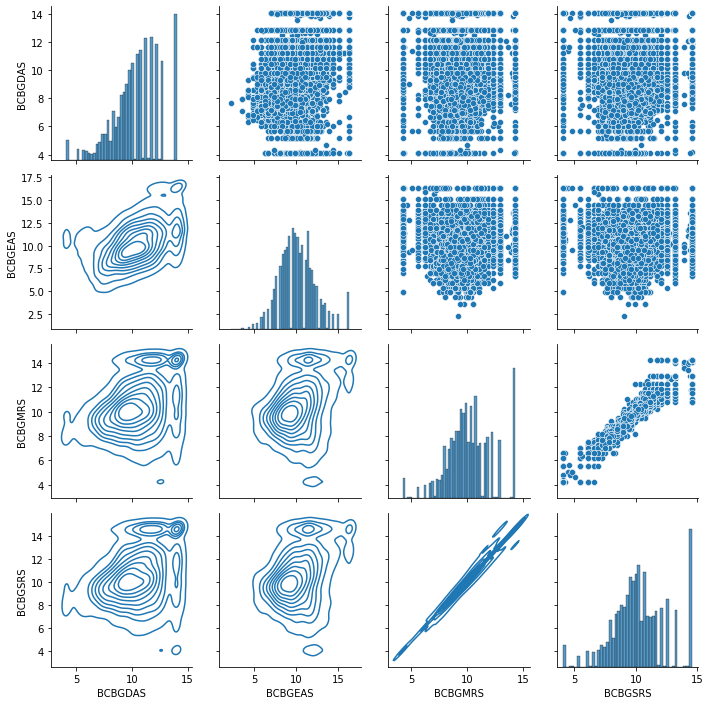

In [18]:
g = sns.PairGrid(school.loc[:,[col for col in school.columns if 'BCBG' in col]])
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)

**Initial Observations about `school` dataset:**
* School discipline problems and focus on academic success do not seem correlated with each other or resource shortages
* Math and science resource shortages are strongly correlated; schools seem to be investing or struggling in both math and science equally
* There are many schools with hardly any struggles with discipline or resources, while most other schools are spread equally across the spectrum

**`school` Data Preparation**
* drop unnecessary columns
* convert IDCNTRY, IDSCHOOL to integers
* Convert BCDGDAS, BCDGEAS, BCDGMRS, BCDGSRS, BCDGSBC to ordered categoricals
* rename all columns to be more descriptive
* merge with student performance by school

In [19]:
stud_ach.head()

IDCNTRY      IDBOOK  IDSCHOOL   IDCLASS      IDSTUD BNRGCAL1 BNRGCAL2  \
0   7842.0  Booklet 11    5001.0  500102.0  50010201.0      NaN      NaN   
1   7842.0  Booklet 12    5001.0  500102.0  50010202.0      NaN      NaN   
2   7842.0  Booklet 13    5001.0  500102.0  50010203.0      NaN      NaN   
3   7842.0  Booklet 14    5001.0  500102.0  50010204.0      NaN      NaN   
4   7842.0  Booklet 02    5001.0  500102.0  50010207.0      NaN      NaN   

   IDPOP     IDGRADER  IDGRADE ITLANG_SA                     LCID_SA ITSEX  \
0  Pop 2  Upper Grade  Grade 8   English  English (U.A.E. Abu Dhabi)  Male   
1  Pop 2  Upper Grade  Grade 8   English  English (U.A.E. Abu Dhabi)  Male   
2  Pop 2  Upper Grade  Grade 8   English  English (U.A.E. Abu Dhabi)  Male   
3  Pop 2  Upper Grade  Grade 8   English  English (U.A.E. Abu Dhabi)  Male   
4  Pop 2  Upper Grade  Grade 8   English  English (U.A.E. Abu Dhabi)  Male   

   BSDAGE             ITADMINI  \
0   13.58  Teacher from School   
1   13.75  Teacher from School   
2   13.50  Teacher from School   
3   14.00  Teacher from School   
4   13.33  Teacher from School   

                                            ILRELIAB  MP52024_val  \
0  Students Booklet was used for Reliability Scoring          NaN   
1  Students Booklet was used for Reliability Scoring          NaN   
2  Students Booklet was used for Reliability Scoring          NaN   
3  Students Booklet was used for Reliability Scoring          0.0   
4  Students Booklet not used for Reliability Scoring          NaN   

   MP52058_val  MP52125_val  MP52229_val  MP52063_val  MP52072_val  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          0.0          1.0          0.0          1.0          1.0   
4          NaN          NaN          NaN          NaN          NaN   

   MP52146_val  MP52092_val  MP52046_val  MP52083_val  MP52082_val  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          1.0          0.0          1.0          0.0          1.0   
4          NaN          NaN          NaN          NaN          NaN   

   MP52161_val  MP52418_val  MP72007_val  MP72025_val  MP72017_val  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          0.0          0.0          NaN          NaN          NaN   
4          NaN          NaN          1.0          0.0          0.0   

   MP72190_val  MP72068_val  MP72076_val  MP72056_val  MP72098_val  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          1.0          0.0          1.0          1.0          1.0   

   MP72103_val  MP72121_val  MP72180_val  MP72198_val  MP72227_val  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          1.0          1.0          1.0          1.0          1.0   

   MP72170_val  MP72209_val  MP62005_val  MP62139_val  MP62164_val  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4 

In [20]:
stud_ach_drop_new = list(stud_ach.columns[stud_ach.isna().all()])+list(stud_ach.columns[stud_ach.nunique()==1])

In [21]:
stud_ach.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295453 entries, 0 to 295452
Columns: 445 entries, IDCNTRY to srea_sd
dtypes: float64(434), object(11)
memory usage: 1003.1+ MB


In [22]:
stud_ach.describe()

IDCNTRY       IDSCHOOL        IDCLASS        IDSTUD  \
count  295453.000000  295453.000000  295453.000000  2.954530e+05   
mean    35669.770887    5147.488924  514752.442145  5.147526e+07   
std    150889.861246     129.955610   12995.298104  1.299530e+06   
min        36.000000    5001.000000  500101.000000  5.001010e+07   
25%       380.000000    5057.000000  505701.000000  5.057011e+07   
50%       578.000000    5114.000000  511402.000000  5.114023e+07   
75%       784.000000    5189.000000  518902.000000  5.189020e+07   
max    710004.000000    5631.000000  563102.000000  5.631021e+07   

              BSDAGE   MP52024_val   MP52058_val   MP52125_val   MP52229_val  \
count  295007.000000  44576.000000  43270.000000  44614.000000  41948.000000   
mean       14.293059      0.486831      0.260319      0.403707      0.509726   
std         0.816446      0.499832      0.438814      0.490646      0.499911   
min         9.080000      0.000000      0.000000      0.000000      0.000000   
25%        13.750000      0.000000      0.000000      0.000000      0.000000   
50%        14.170000      0.000000      0.000000      0.000000      1.000000   
75%        14.670000      1.000000      1.000000      1.000000      1.000000   
max        19.000000      1.000000      1.000000      1.000000      1.000000   

        MP52063_val   MP52072_val   MP52146_val   MP52092_val   MP52046_val  \
count  44563.000000  44900.000000  42787.000000  44096.000000  44124.000000   
mean       0.449207      0.568753      0.195363      0.266782      0.286647   
std        0.497419      0.495256      0.396485      0.442282      0.452200   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      1.000000      0.000000      0.000000      0.000000   
75%        1.000000      1.000000      0.000000      1.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

        MP52083_val   MP52082_val   MP52161_val  MP52418_val   MP72007_val  \
count  43376.000000  44500.000000  44132.000000  44023.00000  36582.000000   
mean       0.370182      0.535326      0.634415      0.26602      0.164425   
std        0.482859      0.498756      0.481599      0.44188      0.370666   
min        0.000000      0.000000      0.000000      0.00000      0.000000   
25%        0.000000      0.000000      0.000000      0.00000      0.000000   
50%        0.000000      1.000000      1.000000      0.00000      0.000000   
75%        1.000000      1.000000      1.000000      1.00000      0.000000   
max        1.000000      1.000000      1.000000      1.00000      1.000000   

        MP72025_val   MP72017_val   MP72190_val   MP72068_val   MP72076_val  \
count  36261.000000  31224.000000  34927.000000  36694.000000  36255.000000   
mean       0.440308      0.194466      0.522776      0.591841      0.410426   
std        0.496431      0.395795      0.499488      0.491500      0.491918   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      1.000000      1.000000      0.000000   
75%        1.000000      0.000000      1.000000      1.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

        MP72056_val   MP72098_val   MP72103_val   MP72121_val   MP72180_val  \
count  33137.000000  33145.000000  35739.000000  35081.000000  35548.000000   
mean       0.379183      0.269845      0.423963      0.554089      0.404411   
std        0.485191      0.443886      0.494191      0.497073      0.490785   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      1.000000      0.000000   

In [23]:
stud_ach.loc[:,[col for col in stud_ach.columns if '_val' not in col and '_avg' not in col and '_sd' not in col]].dtypes

IDCNTRY      float64
IDBOOK        object
IDSCHOOL     float64
IDCLASS      float64
IDSTUD       float64
BNRGCAL1      object
BNRGCAL2      object
IDPOP         object
IDGRADER      object
IDGRADE       object
ITLANG_SA     object
LCID_SA       object
ITSEX         object
BSDAGE       float64
ITADMINI      object
ILRELIAB      object
dtype: object

In [24]:
stud_ach_codes.loc[[col for col in stud_ach.columns if '_val' not in col and '_avg' not in col and '_sd' not in col],:]

Label
Variable                                                  
IDCNTRY                      Country ID - Numeric ISO Code
IDBOOK                                Student Test Booklet
IDSCHOOL                                         School ID
IDCLASS                                           Class ID
IDSTUD                                          Student ID
BNRGCAL1               CALCULATOR SURVEY\USE OF CALCULATOR
BNRGCAL2   CALCULATOR SURVEY\FREQUENCY OF USING CALCULATOR
IDPOP                                        Population ID
IDGRADER                             Standardized Grade ID
IDGRADE                                           Grade ID
ITLANG_SA             Language of Student Achievement Test
LCID_SA              Locale ID of Student Achievement Test
ITSEX                                      Sex of Students
BSDAGE                                        Students Age
ITADMINI                       Test Administrator Position
ILRELIAB                         Reliability Coding Status

In [25]:
stud_ach_drop_new = stud_ach_drop_new+['BNRGCAL1','BNRGCAL2','ITADMINI','ILRELIAB']
stud_ach_drop_new

['MP62342_val',
 'MP72038_val',
 'MP62048_val',
 'SP62272_val',
 'SP52221_val',
 'SP72133_val',
 'SP72048_val',
 'SP62036_val',
 'SP72906_val',
 'SP72329_val',
 'SP62266_val',
 'IDPOP',
 'IDGRADER',
 'BNRGCAL1',
 'BNRGCAL2',
 'ITADMINI',
 'ILRELIAB']

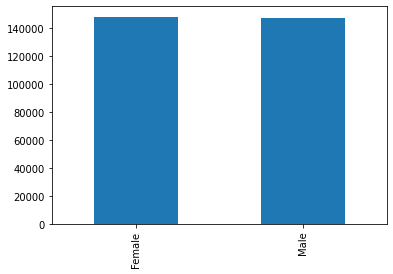

In [26]:
stud_ach['ITSEX'].value_counts().plot(kind='bar');

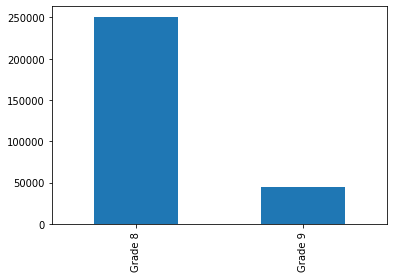

In [27]:
stud_ach['IDGRADE'].value_counts().plot(kind='bar');

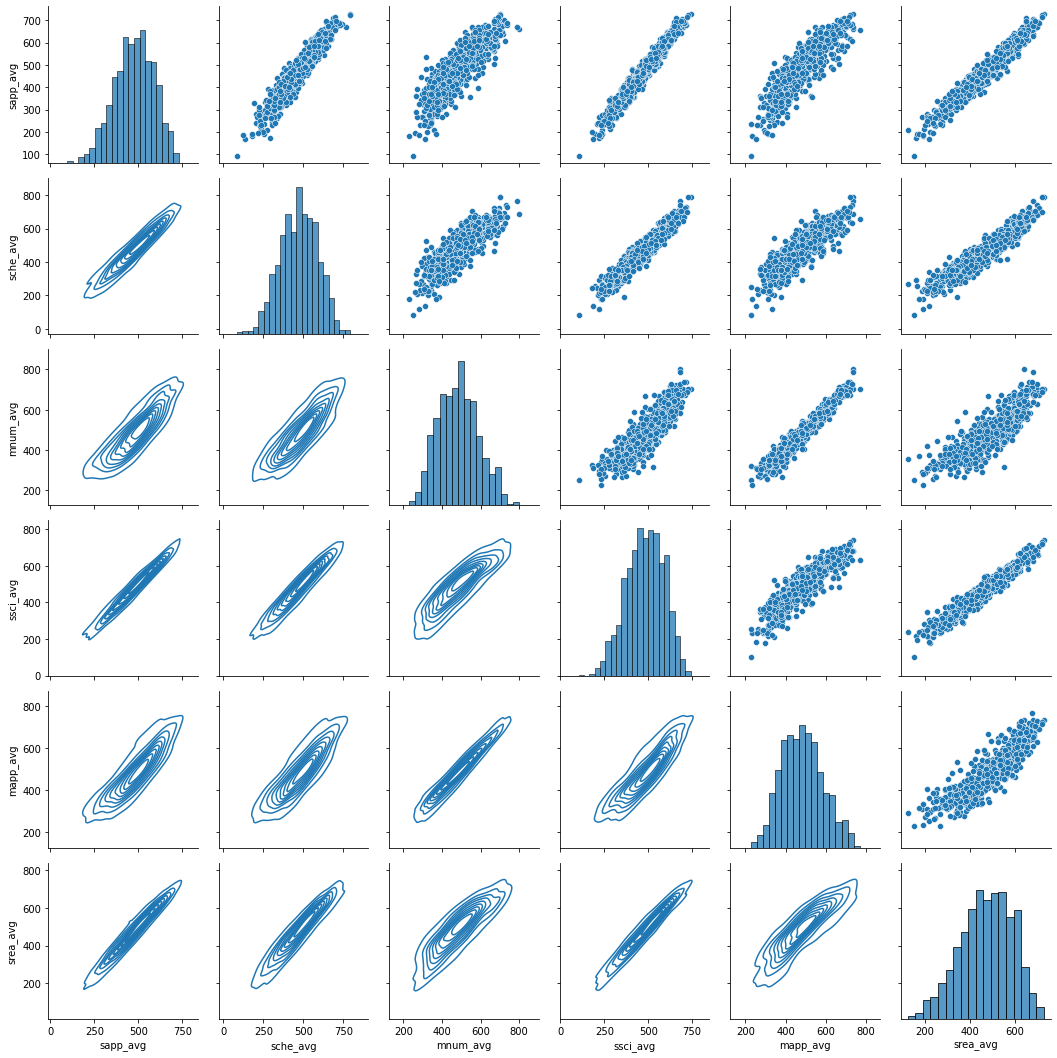

In [28]:
g = sns.PairGrid(stud_ach.sample(1000).loc[:,random.sample([col for col in stud_ach.columns if '_avg' in col],6)])
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)

**Initial Observations about `stud_ach` dataset:**
* All mathematical understanding is closely related (strong correlation)
* All science understanding is closely related (strong correlation)
* The relationship between science and math has more variance - is this due to subject differences or the difference in teaching?

**`stud_ach` Data Preparation**
* drop unnecessary (or null) columns
* convert IDCNTRY, IDSCHOOL, IDCLASS, IDSTUD to integers
* trim and convert IDBOOK, IDGRADE to integer
* rename all columns to be more descriptive

In [29]:
student.head()

IDCNTRY      IDBOOK  IDSCHOOL   IDCLASS      IDSTUD BSBG01         BSBG03  \
0   7842.0  Booklet 11    5001.0  500102.0  50010201.0    Boy  Almost always   
1   7842.0  Booklet 12    5001.0  500102.0  50010202.0    Boy  Almost always   
2   7842.0  Booklet 13    5001.0  500102.0  50010203.0    Boy         Always   
3   7842.0  Booklet 14    5001.0  500102.0  50010204.0    Boy  Almost always   
4   7842.0  Booklet 02    5001.0  500102.0  50010207.0    Boy  Almost always   

                                   BSBG04 BSBG05A BSBG05B BSBG05C BSBG05D  \
0  Enough to fill one shelf (11–25 books)     Yes     Yes     Yes     Yes   
1  Enough to fill one shelf (11–25 books)     Yes     Yes     Yes     Yes   
2           None or very few (0–10 books)     Yes      No     Yes      No   
3  Enough to fill one shelf (11–25 books)     Yes     Yes     Yes     Yes   
4  Enough to fill one shelf (11–25 books)     Yes     Yes     Yes     Yes   

  BSBG05E BSBG05F BSBG05G BSBG05H BSBG05I  \
0     Yes     Yes     Yes     Yes     Yes   
1     Yes     Yes     Yes     Yes     Yes   
2     Yes      No     Yes      No     Yes   
3     Yes     Yes     Yes     Yes     Yes   
4     Yes     Yes     Yes     Yes     Yes   

                                             BSBG06A  \
0  <Post-secondary, non-tertiary education—ISCED ...   
1     <Short-cycle tertiary education—ISCED Level 5>   
2                                                NaN   
3     <Short-cycle tertiary education—ISCED Level 5>   
4     <Short-cycle tertiary education—ISCED Level 5>   

                                             BSBG06B  \
0     <Bachelor’s or equivalent level—ISCED Level 6>   
1     <Short-cycle tertiary education—ISCED Level 5>   
2     <Short-cycle tertiary education—ISCED Level 5>   
3     <Short-cycle tertiary education—ISCED Level 5>   
4  <Post-secondary, non-tertiary education—ISCED ...   

                                              BSBG07 BSBG08A BSBG08B BSBG09A  \
0  Finish <Bachelor’s or equivalent level—ISCED L...     Yes     Yes     Yes   
1  Finish <Bachelor’s or equivalent level—ISCED L...     Yes     Yes     Yes   
2   Finish <Lower secondary education—ISCED Level 2>     Yes      No     Yes   
3  Finish <Bachelor’s or equivalent level—ISCED L...     Yes     Yes     Yes   
4  Finish <Bachelor’s or equivalent level—ISCED L...     Yes     Yes     Yes   

  BSBG09B                 BSBG10    BSBG11A    BSBG11B BSBG12A BSBG12B  \
0     NaN  Never or almost never  Sometimes  Sometimes     Yes     Yes   
1     NaN  Never or almost never  Sometimes  Sometimes     Yes     Yes   
2     NaN  Never or almost never  Sometimes  Sometimes     Yes     Yes   
3     NaN  Never or almost never  Sometimes  Sometimes     Yes     Yes   
4     NaN  Never or almost never  Sometimes  Sometimes     Yes     Yes   

  BSBG12C BSBG12D BSBG12E BSBG12F  IDPOP  IDGRADE ITLANG_SQ  \
0     Yes     Yes     Yes     Yes  Pop 2  Grade 8   English   
1     Yes     Yes     Yes     Yes  Pop 2  Grade 8   English   
2     Yes     Yes     Yes     Yes  Pop 2  Grade 8   English   
3     Yes     Yes     Yes     Yes  Pop 2  Grade 8   English   
4     Yes     Yes     Yes     Yes  Pop 2  Grade 8   English   

                      LCID_SQ ITLANG_SA                     LCID_SA ITSEX  \
0  English (U.A.E. Abu Dhabi)   English  English (U.A.E. Abu Dhabi)  Male   
1  English (U.A.E. Abu Dhabi)   English  English (U.A.E. Abu Dhabi)  Male   
2  English (U.A.E. Abu Dhabi)   English  English (U.A.E. Abu Dhabi)  Male   
3  English (U.A.E. Abu Dhabi)   English  English (U.A.E. Abu Dhabi)  Male   
4  English (U.A.E. Abu Dhabi)   English  English (U.A.E. Abu Dhabi)  Male   

   BSDAGE   BSBGHER         BSDGHER   BSBGSSB                         BSDGSSB  \
0   13.58  10.84499  Some Resources  12.80573  High Sense of School Belonging   
1   13.75  10.23835  Some Resources  13.27199  High Sense of School Belonging   
2   13.50   9.03613  Some Resources  13.27199  High Sense of School Belonging   
3   14.00  10.23835  S

In [30]:
student_drop_new = list(student.columns[student.isna().all()])+list(student.columns[student.nunique()==1])

In [31]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295453 entries, 0 to 295452
Data columns (total 93 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   IDCNTRY    295453 non-null  float64
 1   IDBOOK     295453 non-null  object 
 2   IDSCHOOL   295453 non-null  float64
 3   IDCLASS    295453 non-null  float64
 4   IDSTUD     295453 non-null  float64
 5   BSBG01     292598 non-null  object 
 6   BSBG03     290052 non-null  object 
 7   BSBG04     290351 non-null  object 
 8   BSBG05A    290843 non-null  object 
 9   BSBG05B    290610 non-null  object 
 10  BSBG05C    285147 non-null  object 
 11  BSBG05D    289807 non-null  object 
 12  BSBG05E    290379 non-null  object 
 13  BSBG05F    266242 non-null  object 
 14  BSBG05G    237077 non-null  object 
 15  BSBG05H    223433 non-null  object 
 16  BSBG05I    203576 non-null  object 
 17  BSBG06A    283039 non-null  object 
 18  BSBG06B    282538 non-null  object 
 19  BSBG07     284088 non-n

In [32]:
student.describe()

IDCNTRY       IDSCHOOL        IDCLASS        IDSTUD  \
count  295453.000000  295453.000000  295453.000000  2.954530e+05   
mean    35669.770887    5147.488924  514752.442145  5.147526e+07   
std    150889.861246     129.955610   12995.298104  1.299530e+06   
min        36.000000    5001.000000  500101.000000  5.001010e+07   
25%       380.000000    5057.000000  505701.000000  5.057011e+07   
50%       578.000000    5114.000000  511402.000000  5.114023e+07   
75%       784.000000    5189.000000  518902.000000  5.189020e+07   
max    710004.000000    5631.000000  563102.000000  5.631021e+07   

              BSDAGE        BSBGHER       BSBGSSB         BSBGSB  \
count  295007.000000  289242.000000  290131.00000  284744.000000   
mean       14.293059      10.251069       9.86241       9.776433   
std         0.816446       1.684202       1.95809       2.017834   
min         9.080000       4.552080       3.92440       1.953440   
25%        13.750000       9.036130       8.46096       8.357840   
50%        14.170000      10.238350       9.40801       9.569750   
75%        14.670000      11.487120      11.62252      11.187840   
max        19.000000      13.515430      13.27199      12.937340   

             BSBGSLM        BSBGICM        BSBGDML        BSBGSCM  \
count  290408.000000  289976.000000  282896.000000  289359.000000   
mean        9.961073      10.072908       9.916083      10.019942   
std         1.903557       1.997334       1.992961       2.089437   
min         5.094840       3.695680       5.566330       3.277930   
25%         8.761390       8.518960       8.705590       8.997360   
50%         9.866380       9.926750       9.941130       9.804960   
75%        11.148590      11.651150      11.103430      11.104060   
max        13.848490      13.018850      14.673710      15.851880   

             BSBGSVM        BSBGSLS        BSBGICS        BSBGSCS  \
count  288760.000000  220370.000000  219680.000000  219342.000000   
mean        9.840356      10.117461      10.072631      10.079303   
std         2.054977       2.027841       1.979049       2.007870   
min         3.036820       3.846500       4.022730       3.249920   
25%         8.346150       8.696610       8.528200       8.873810   
50%         9.654380       9.817230      10.306400       9.615810   
75%        11.301900      11.533000      11.431060      11.024140   
max        13.482930      13.517780      12.633860      14.841820   

             BSBGSVS       BSBGSLB       BSBGICB       BSBGSCB       BSBGSLE  \
count  285862.000000  66641.000000  66479.000000  66416.000000  54472.000000   
mean       10.086556      9.969839      9.932821      9.982285      9.961898   
std         1.910471      2.006163      2.003414      1.984479      2.005631   
min         4.283400      3.770330      3.805730      3.049750      4.020150   
25%         8.817250      8.646750      8.476250      8.768360      8.720260   
50%         9.895320      9.576050      9.939960      9.628410      9.614740   
75%        11.354160     11.404230     11.547870     10.979050     11.265810   
max        12.936700     13.864760     12.776070     14.925630     14.057380   

            BSBGICE       BSBGSCE       BSBGSLC       BSBGICC       BSBGSCC  \
count  54320.000000  54252.000000  65734.000000  65556.000000  65417.000000   
mean       9.964434      9.998950      9.970825      9.948196      9.937674   
std        1.998236      1.993684      2.017648      2.002994      1.990926   
min        4.198000      3.210940      4.381810      4.449820      3.896350   
25%        8.604940      8.807510      8.772590      8.694020      8.784090   
50%       10.090050      9.665740      9.709260      9.753180      9.732660   
75%       11.608490     11.013050     11.138650     11.561420     10.855390   
max       12.753610     14.910220     13.776840     12.636810     14.721900   

            BSBGSLP       BSBGICP       BSBGSCP        BSBGSEC  
count  65719.000000  65491.000000  65368.0000

In [33]:
student.dtypes

IDCNTRY      float64
IDBOOK        object
IDSCHOOL     float64
IDCLASS      float64
IDSTUD       float64
BSBG01        object
BSBG03        object
BSBG04        object
BSBG05A       object
BSBG05B       object
BSBG05C       object
BSBG05D       object
BSBG05E       object
BSBG05F       object
BSBG05G       object
BSBG05H       object
BSBG05I       object
BSBG06A       object
BSBG06B       object
BSBG07        object
BSBG08A       object
BSBG08B       object
BSBG09A       object
BSBG09B       object
BSBG10        object
BSBG11A       object
BSBG11B       object
BSBG12A       object
BSBG12B       object
BSBG12C       object
BSBG12D       object
BSBG12E       object
BSBG12F       object
IDPOP         object
IDGRADE       object
ITLANG_SQ     object
LCID_SQ       object
ITLANG_SA     object
LCID_SA       object
ITSEX         object
BSDAGE       float64
BSBGHER      float64
BSDGHER       object
BSBGSSB      float64
BSDGSSB       object
BSBGSB       float64
BSDGSB        object
BSBGSLM      

In [34]:
student_codes.loc[student.columns,:]

Label
IDCNTRY                        Country ID - Numeric ISO Code
IDBOOK                                  Student Test Booklet
IDSCHOOL                                           School ID
IDCLASS                                             Class ID
IDSTUD                                            Student ID
BSBG01                                    GEN\SEX OF STUDENT
BSBG03                GEN\OFTEN SPEAK <LANG OF TEST> AT HOME
BSBG04                      GEN\AMOUNT OF BOOKS IN YOUR HOME
BSBG05A                     GEN\HOME POSSESS\COMPUTER TABLET
BSBG05B                          GEN\HOME POSSESS\STUDY DESK
BSBG05C                            GEN\HOME POSSESS\OWN ROOM
BSBG05D                 GEN\HOME POSSESS\INTERNET CONNECTION
BSBG05E                    GEN\HOME POSSESS\OWN MOBILE PHONE
BSBG05F                  GEN\HOME POSSESS\<COUNTRY SPECIFIC>
BSBG05G                  GEN\HOME POSSESS\<COUNTRY SPECIFIC>
BSBG05H                  GEN\HOME POSSESS\<COUNTRY SPECIFIC>
BSBG05I                  GEN\HOME POSSESS\<COUNTRY SPECIFIC>
BSBG06A        GEN\HIGHEST LVL OF EDU OF <PARENT/GUARDIAN A>
BSBG06B        GEN\HIGHEST LVL OF EDU OF <PARENT/GUARDIAN B>
BSBG07                GEN\HOW FAR IN EDU DO YOU EXPECT TO GO
BSBG08A            GEN\<PARENT/GUARDIAN A> BORN IN <COUNTRY>
BSBG08B            GEN\<PARENT/GUARDIAN B> BORN IN <COUNTRY>
BSBG09A                                GEN\BORN IN <COUNTRY>
BSBG09B            GEN\BORN IN <COUNTRY>\AGE CAME TO COUNTRY
BSBG10                GEN\ABOUT HOW OFTEN ABSENT FROM SCHOOL
BSBG11A                                  GEN\HOW OFTEN\TIRED
BSBG11B                                 GEN\HOW OFTEN\HUNGRY
BSBG12A                    GEN\INTERNET USE\ACCESS TEXTBOOKS
BSBG12B                  GEN\INTERNET USE\ACCESS ASSIGNMENTS
BSBG12C         GEN\INTERNET USE\COLLABORATE WITH CLASSMATES
BSBG12D            GEN\INTERNET USE\COMMUNICATE WITH TEACHER
BSBG12E     GEN\INTERNET USE\FIND INFO TO AID IN MATH OR SCI
BSBG12F               GEN\INTERNET USE\ACCESS LEARNING GAMES
IDPOP                                          Population ID
IDGRADE                                             Grade ID
ITLANG_SQ          Language of Student Context Questionnaire
LCID_SQ           Locale ID of Student Context Questionnaire
ITLANG_SA               Language of Student Achievement Test
LCID_SA                Locale ID of Student Achievement Test
ITSEX                                        Sex of Students
BSDAGE                                          Students Age
BSBGHER                       Home Educational Resources/SCL
BSDGHER                       Home Educational Resources/IDX
BSBGSSB               Students Sense of School Belonging/SCL
BSDGSSB               Students Sense of School Belonging/IDX
BSBGSB                                  Student Bullying/SCL
BSDGSB                                  Student Bullying/IDX
BSBGSLM       Students Like Learning Mathematics Lessons/SCL
BSDGSLM       Students Like Learning Mathematics Lessons/IDX
BSBGICM     Instructional Clarity in Mathematics Lessons/SCL
BSDGICM     Instructional Clarity in Mathematics Lessons/IDX
BSBGDML          Disorderly Behavior during Math Lessons/SCL
BSDGDML          Disorderly Behavior during Math Lessons/IDX
BSBGSCM                 Student Confident in Mathematics/SCL
BSDGSCM                 Student Confident in Mathematics/IDX
BSBGSVM                       Students Value Mathematics/SCL
BSDGSVM                       Students Value Mathematics/IDX
BSBGSLS                   Students Like Learning Science/SCL
BSDGSLS                   Students Like Learning Science/IDX
BSBGICS         Instructional Clarity in Science Lessons/SCL
BSDGICS         Instructional Clarity in Science Lessons/IDX
BSBGSCS                     Student Confident in Science/SCL
BSDGSCS                     Student Confident in Science/IDX
BSBGSVS                           Students Value Science/SCL
BSDGSVS                           Students Value Science/IDX
BSBGSLB                   Stu

In [35]:
student['BSDGSB'].unique()

array(['Never or Almost Never', 'About Monthly', 'About Weekly', nan],
      dtype=object)

In [36]:
student.query('ITLANG_SQ != ITLANG_SA and ITLANG_SQ == ITLANG_SQ')

IDCNTRY      IDBOOK  IDSCHOOL   IDCLASS      IDSTUD BSBG01  BSBG03  \
8393      7841.0  Booklet 10    5035.0  503502.0  50350201.0   Girl  Always   
8394      7841.0  Booklet 11    5035.0  503502.0  50350202.0   Girl  Always   
8395      7841.0  Booklet 12    5035.0  503502.0  50350203.0   Girl  Always   
8396      7841.0  Booklet 13    5035.0  503502.0  50350204.0   Girl  Always   
8397      7841.0  Booklet 14    5035.0  503502.0  50350205.0   Girl  Always   
...          ...         ...       ...       ...         ...    ...     ...   
187001     578.0  Booklet 08    5206.0  520602.0  52060215.0   Girl  Always   
187046     578.0  Booklet 10    5210.0  521001.0  52100108.0    Boy  Always   
216492     642.0  Booklet 10    5172.0  517201.0  51720115.0   Girl  Always   
270224     710.0  Booklet 10    5170.0  517003.0  51700317.0    Boy  Always   
291835  710004.0  Booklet 10    5170.0  517003.0  51700317.0    Boy  Always   

                                              BSBG04 BSBG05A BSBG05B BSBG05C  \
8393      Enough to fill one bookcase (26–100 books)     Yes     Yes     Yes   
8394      Enough to fill one bookcase (26–100 books)     Yes     Yes     Yes   
8395      Enough to fill one bookcase (26–100 books)     Yes      No      No   
8396          Enough to fill one shelf (11–25 books)     Yes      No      No   
8397                   None or very few (0–10 books)     Yes     Yes      No   
...                                              ...     ...     ...     ...   
187001  Enough to fill two bookcases (101–200 books)     Yes     Yes     Yes   
187046    Enough to fill one bookcase (26–100 books)     Yes     Yes     Yes   
216492  Enough to fill two bookcases (101–200 books)     Yes     Yes      No   
270224                 None or very few (0–10 books)      No     Yes     Yes   
291835                 None or very few (0–10 books)      No     Yes     Yes   

       BSBG05D BSBG05E BSBG05F BSBG05G BSBG05H BSBG05I  \
8393       Yes     Yes     Yes      No      No      No   
8394       Yes     Yes      No      No      No     Yes   
8395       Yes     Yes      No     Yes     Yes     Yes   
8396       Yes     Yes     Yes     Yes      No      No   
8397       Yes     Yes     Yes     Yes     Yes      No   
...        ...     ...     ...     ...     ...     ...   
187001     Yes     Yes      No     Yes     NaN     NaN   
187046     Yes     Yes      No     Yes     NaN     NaN   
216492     Yes     Yes      No     Yes      No     Yes   
270224      No     Yes      No     Yes     Yes      No   
291835      No     Yes      No     Yes     Yes      No   

                                                  BSBG06A  \
8393            <Upper secondary education—ISCED Level 3>   
8394            <Lower secondary education—ISCED Level 2>   
8395                                         I don’t know   
8396    <Postgraduate degree: Master’s—ISCED Level 7 o...   
8397    <Postgraduate degree: Master’s—ISCED Level 7 o...   
...                                                   ...   
187001          <Upper secondary education—ISCED Level 3>   
187046                                     Not applicable   
216492                                       I don’t know   
270224          <Lower secondary education—ISCED Level 2>   
291835          <Lower secondary education—ISCED Level 2>   

                                                  BSBG06B  \
8393    Some <Primary education—ISCED Level 1 or Lower...   
8394    Some <Primary education—ISCED Level 1 or Lower...   
8395            <Upper secondary education—ISCED Level 3>   
8396    <Postgraduate degree: Master’s—ISCED Level 7 o...   
8397                                         I don’t know   
...                                                   ...   
187001                                       I don’t know   
187046                                                NaN   
216492                                       I don’t know   
270224          <Lower secondary education—ISCED Level 2>  

In [37]:
student_drop_new = student_drop_new + ['BSBG01','LCID_SQ','LCID_SA']

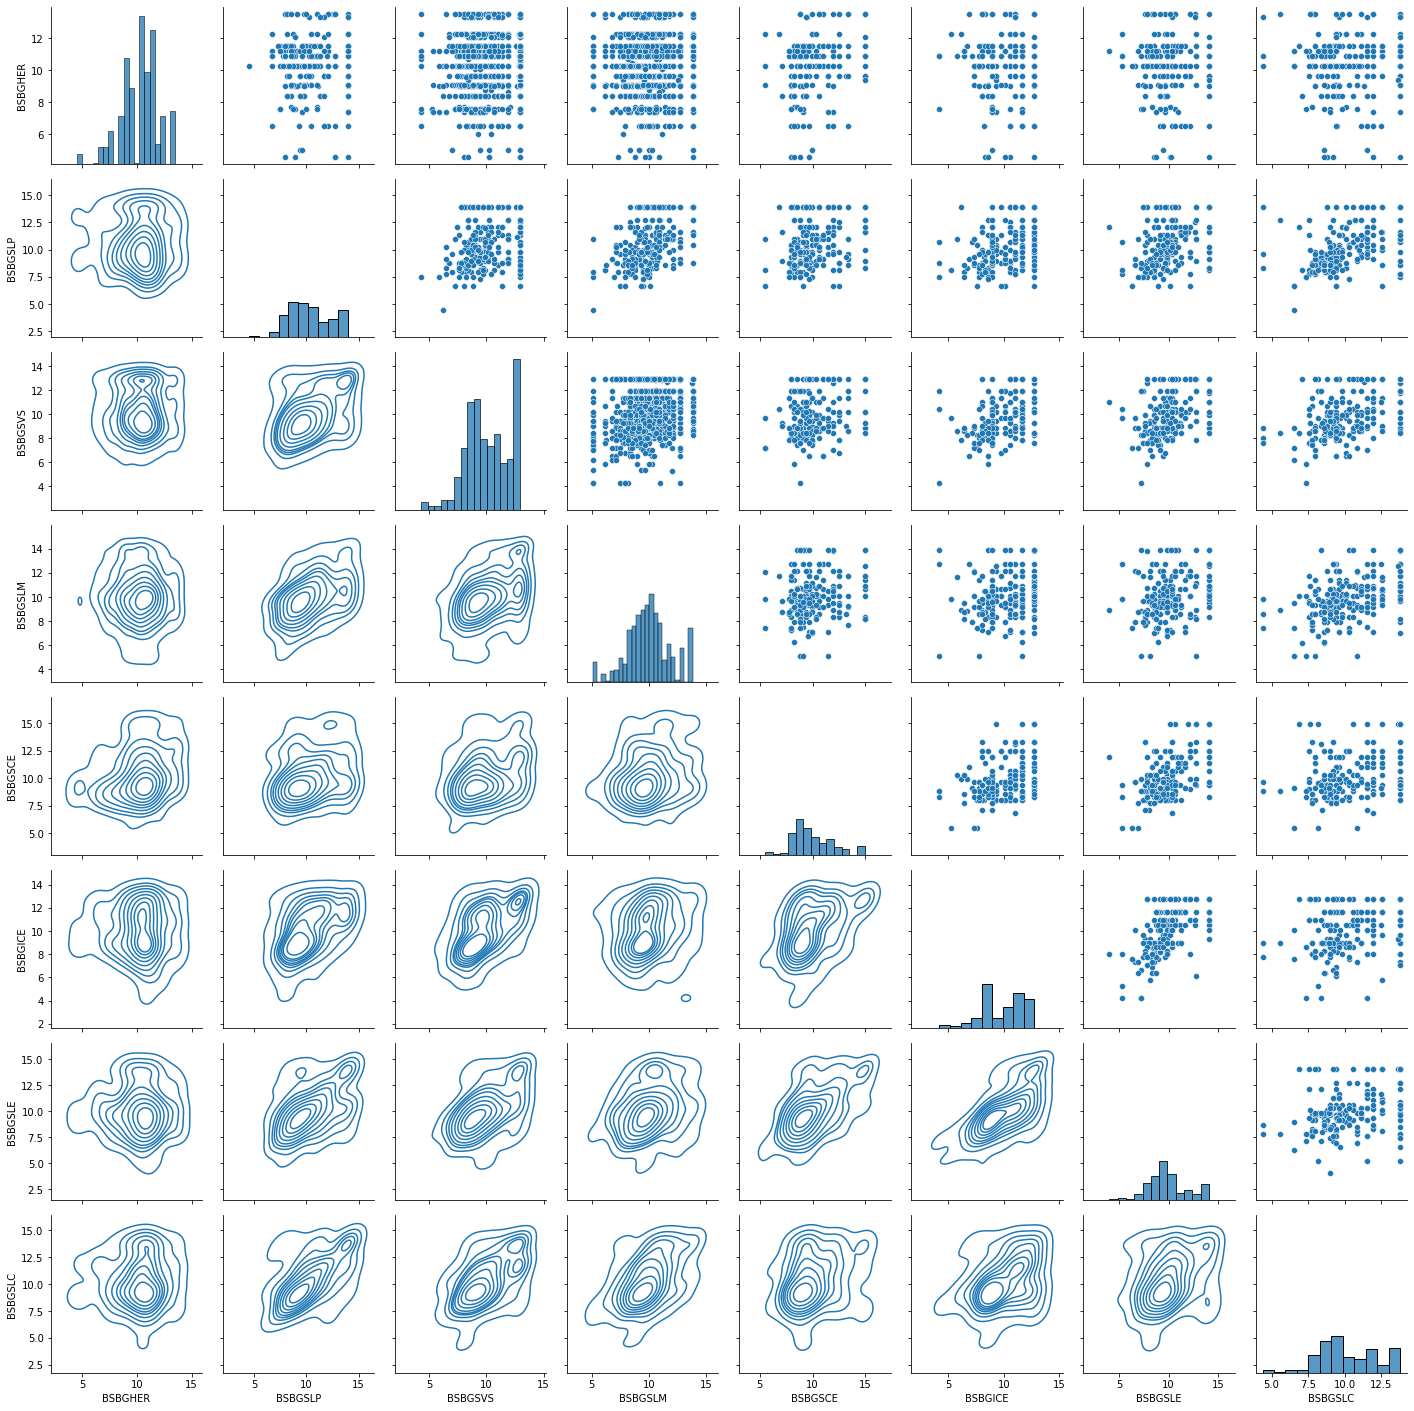

In [38]:
g = sns.PairGrid(student.sample(1000).loc[:,random.sample([col for col in student.columns if 'BSBG' in col and student[col].dtype == 'float64'],8)])
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)

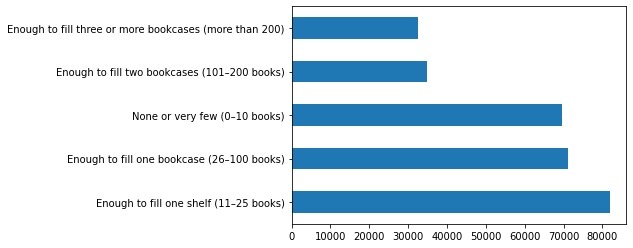

In [39]:
student['BSBG04'].value_counts().plot(kind='barh');

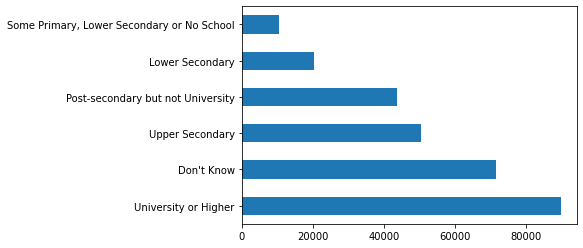

In [40]:
student['BSDGEDUP'].value_counts().plot(kind='barh');

**Initial Observations about `student` dataset:**
* Apparent correlation between instructional clarity across all science classes (possible link to instructional quality at the school level)
* Wide variance in the number of books in the home
* Wide variance in highest parental education, but university is most common

**`student` Data Preparation**
* drop unnecessary columns
* convert IDCNTRY, IDSCHOOL, IDCLASS, IDSTUD to integers
* trim and convert IDBOOK, IDGRADE to integers
* convert to integer and combine BSBG05* columns to home_possession column
* convert to integer and combine BSBG09* columns to age_immigration column
* convert to integer and combine BSBG12* columns to internet_access column
* convert BSBG03, BSBG04, BSBG10, BSBG11*, BSDG* columns to ordered categoricals
* trim and convert BSBG06A, BSBG06B, BSBG07 to ordered categoricals (ISCED level)
* convert BSBG08* to boolean
* rename all columns to be more descriptive
* merge with student performance

In [41]:
stud_teach.head()

IDCNTRY      IDBOOK  IDSCHOOL   IDCLASS      IDSTUD    IDTEALIN   IDTEACH  \
0   7842.0  Booklet 11    5001.0  500102.0  50010201.0  50010101.0  500101.0   
1   7842.0  Booklet 11    5001.0  500102.0  50010201.0  50010203.0  500102.0   
2   7842.0  Booklet 12    5001.0  500102.0  50010202.0  50010203.0  500102.0   
3   7842.0  Booklet 12    5001.0  500102.0  50010202.0  50010101.0  500101.0   
4   7842.0  Booklet 13    5001.0  500102.0  50010203.0  50010101.0  500101.0   

   IDLINK  IDPOP  IDGRADE       IDSUBJ            ITCOURSE  NMTEACH  NSTEACH  \
0     1.0  Pop 2  Grade 8  Mathematics         Mathematics      1.0      1.0   
1     3.0  Pop 2  Grade 8      Science  Integrated science      1.0      1.0   
2     3.0  Pop 2  Grade 8      Science  Integrated science      1.0      1.0   
3     1.0  Pop 2  Grade 8  Mathematics         Mathematics      1.0      1.0   
4     1.0  Pop 2  Grade 8  Mathematics         Mathematics      1.0      1.0   

     mmat_avg    ssci_avg    malg_avg    mapp_avg    mdat_avg    mgeo_avg  \
0  550.550842  480.099946  517.042408  502.836180  485.677994  508.168950   
1  550.550842  480.099946  517.042408  502.836180  485.677994  508.168950   
2  326.129702  318.662552  323.233832  356.545632  302.030198  328.756934   
3  326.129702  318.662552  323.233832  356.545632  302.030198  328.756934   
4  393.169444  328.771868  420.589982  389.112222  371.349082  391.344424   

     mkno_avg    mnum_avg    mrea_avg    sapp_avg    sbio_avg    sche_avg  \
0  527.618686  535.162198  517.203196  459.227332  404.517518  443.350576   
1  527.618686  535.162198  517.203196  459.227332  404.517518  443.350576   
2  352.864178  355.017696  385.102162  315.159308  295.509340  324.683132   
3  352.864178  355.017696  385.102162  315.159308  295.509340  324.683132   
4  417.370708  386.164962  407.777500  310.335522  279.297756  321.583934   

     sear_avg    skno_avg    sphy_avg    srea_avg  
0  412.148076  471.580088  450.679538  464.316504  
1  412.148076  471.580088  450.679538  464.316504  
2  343.312374  323.550294  343.942730  315.274280  
3  343.312374  323.550294  343.942730  315.274280  
4  291.039122  313.976578  350.246454  315.896516

In [42]:
stud_teach_drop_new = list(stud_teach.columns[stud_teach.isna().all()])+list(stud_teach.columns[stud_teach.nunique()==1])

In [43]:
stud_teach_drop_new = stud_teach_drop_new + ['IDBOOK']

In [44]:
stud_teach.nunique()

IDCNTRY         46
IDBOOK          22
IDSCHOOL       631
IDCLASS       3311
IDSTUD       96976
IDTEALIN      8674
IDTEACH       3995
IDLINK          34
IDPOP            1
IDGRADE          2
IDSUBJ           2
ITCOURSE         9
NMTEACH          7
NSTEACH          9
mmat_avg    270402
ssci_avg    270380
malg_avg    217888
mapp_avg    214582
mdat_avg    217903
mgeo_avg    217868
mkno_avg    214587
mnum_avg    217887
mrea_avg    214563
sapp_avg    227727
sbio_avg    227746
sche_avg    227735
sear_avg    227724
skno_avg    227725
sphy_avg    227734
srea_avg    227723
dtype: int64

In [45]:
stud_teach.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775679 entries, 0 to 775678
Data columns (total 30 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   IDCNTRY   775679 non-null  float64
 1   IDBOOK    775679 non-null  object 
 2   IDSCHOOL  775679 non-null  float64
 3   IDCLASS   775679 non-null  float64
 4   IDSTUD    775679 non-null  float64
 5   IDTEALIN  775679 non-null  float64
 6   IDTEACH   775679 non-null  float64
 7   IDLINK    775679 non-null  float64
 8   IDPOP     775679 non-null  object 
 9   IDGRADE   775679 non-null  object 
 10  IDSUBJ    775679 non-null  object 
 11  ITCOURSE  775679 non-null  object 
 12  NMTEACH   775679 non-null  float64
 13  NSTEACH   774759 non-null  float64
 14  mmat_avg  775679 non-null  float64
 15  ssci_avg  775679 non-null  float64
 16  malg_avg  620626 non-null  float64
 17  mapp_avg  603971 non-null  float64
 18  mdat_avg  620626 non-null  float64
 19  mgeo_avg  620626 non-null  float64
 20  mkno

In [46]:
stud_teach.describe()

IDCNTRY       IDSCHOOL        IDCLASS        IDSTUD  \
count  775679.000000  775679.000000  775679.000000  7.756790e+05   
mean    37465.527130    5140.928510  514096.189617  5.140963e+07   
std    153150.434185     123.909897   12390.828566  1.239084e+06   
min        36.000000    5001.000000  500101.000000  5.001010e+07   
25%       376.000000    5055.000000  505503.000000  5.055031e+07   
50%       554.000000    5111.000000  511101.000000  5.111011e+07   
75%       784.000000    5182.000000  518201.000000  5.182010e+07   
max    710004.000000    5631.000000  563102.000000  5.631021e+07   

           IDTEALIN        IDTEACH         IDLINK        NMTEACH  \
count  7.756790e+05  775679.000000  775679.000000  775679.000000   
mean   5.140959e+07  514095.866035       3.895333       1.053588   
std    1.239079e+06   12390.789203       7.323645       0.345699   
min    5.001010e+07  500101.000000       1.000000       0.000000   
25%    5.055021e+07  505502.000000       1.000000       1.000000   
50%    5.111010e+07  511101.000000       2.000000       1.000000   
75%    5.182010e+07  518201.000000       4.000000       1.000000   
max    5.631030e+07  563103.000000      53.000000       6.000000   

             NSTEACH       mmat_avg       ssci_avg       malg_avg  \
count  774759.000000  775679.000000  775679.000000  620626.000000   
mean        2.028420     489.088003     488.528813     495.967189   
std         1.280168     101.753267     105.866719     104.567953   
min         0.000000      56.752538      61.388014      47.723008   
25%         1.000000     413.918210     417.174551     421.560000   
50%         1.000000     487.704820     496.994006     494.991487   
75%         3.000000     561.778150     566.059370     569.174582   
max         8.000000     877.182974     845.540666     891.283348   

            mapp_avg       mdat_avg       mgeo_avg       mkno_avg  \
count  603971.000000  620626.000000  620626.000000  603971.000000   
mean      491.867137     483.006341     491.025065     494.050350   
std       101.875097     109.829002     104.770478     105.595112   
min       133.534768      25.659660      78.946176      59.474710   
25%       417.720334     404.340813     415.441624     419.084818   
50%       491.974032     485.223588     489.248777     494.495776   
75%       564.612218     562.484304     564.684318     568.066600   
max       874.593228     860.045736     880.636346     893.665148   

            mnum_avg       mrea_avg       sapp_avg       sbio_avg  \
count  620626.000000  603971.000000  662865.000000  662865.000000   
mean      491.570938     494.484773     485.310309     485.113651   
std       102.670330     101.734562     108.677419     112.423132   
min         7.549074      65.597132      35.718462      21.659244   
25%       417.611784     422.181186     411.691938     410.253980   
50%       490.941730     494.347230     492.957422     495.421520   
75%       564.244025     565.972959     565.215432     567.720074   
max       896.908096     875.585480     844.549682     863.381694   

            sche_avg       sear_avg       skno_avg       sphy_avg  \
count  662865.000000  662865.000000  662865.000000  662865.000000   
mean      484.675805     479.326665     484.771978     484.623848   
std       111.495880     117.027184     111.524588     108.344964   
min         5.000000      14.672014       5.000000       5.000000   
25%       409.224164     400.050162     409.040816     410.573510   
50%       491.995086     489.809962     492.806826     490.710546   
75%       565.168684     565.963584     565.647358     563.467620   
max       878.615532     883.370896     875.553876     864.926514   

            srea_avg  
count  662865.000000  
mean      482.984125  
std       111.353839  
min        39.114636  
25%       408.690756  
50%       493.974166  
75%       566.072986  
max       820.829710

In [47]:
stud_teach.dtypes

IDCNTRY     float64
IDBOOK       object
IDSCHOOL    float64
IDCLASS     float64
IDSTUD      float64
IDTEALIN    float64
IDTEACH     float64
IDLINK      float64
IDPOP        object
IDGRADE      object
IDSUBJ       object
ITCOURSE     object
NMTEACH     float64
NSTEACH     float64
mmat_avg    float64
ssci_avg    float64
malg_avg    float64
mapp_avg    float64
mdat_avg    float64
mgeo_avg    float64
mkno_avg    float64
mnum_avg    float64
mrea_avg    float64
sapp_avg    float64
sbio_avg    float64
sche_avg    float64
sear_avg    float64
skno_avg    float64
sphy_avg    float64
srea_avg    float64
dtype: object

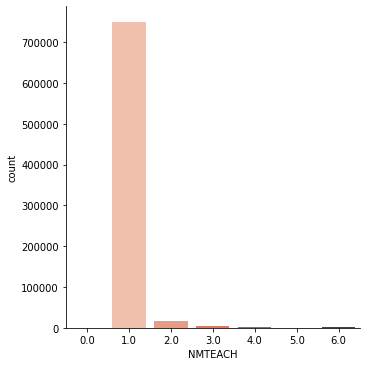

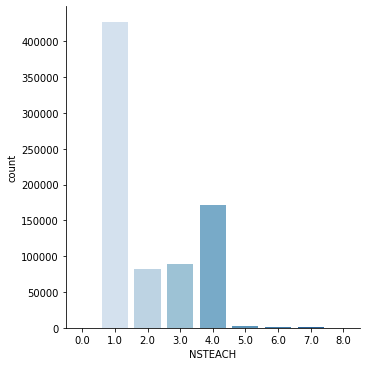

In [48]:
sns.catplot(x='NMTEACH', kind='count', palette='Reds', data=stud_teach);
sns.catplot(x='NSTEACH', kind='count', palette='Blues', data=stud_teach);

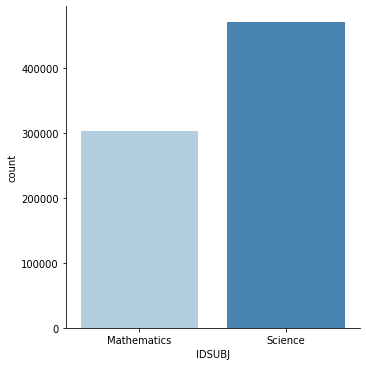

In [49]:
sns.catplot(x="IDSUBJ", kind="count", palette="Blues", data=stud_teach);

**Initial Observations about `stud_teach` dataset:**
* students are morel likey to have multiple science teachers than multiple math teachers
* there are more science teachers in the study than math teachers

**`stud_teach` Data Preparation**
* drop unnecessary columns
* convert IDCNTRY, IDSCHOOL, IDCLASS, IDSTUD, IDTEALIN, IDTEACH, IDLINK, NMTEACH, NSTEACH to integers
* trim and convert IDGRADE to integers

In [50]:
math_teach.head()

IDCNTRY  IDSCHOOL    IDTEALIN   IDTEACH  IDLINK     ITCOURSE  BTBG01  \
0   7842.0    5001.0  50010101.0  500101.0     1.0  Mathematics    17.0   
1   7842.0    5001.0  50010102.0  500101.0     2.0  Mathematics    17.0   
2   7842.0    5004.0  50040101.0  500401.0     1.0  Mathematics     1.0   
3   7842.0    5004.0  50040303.0  500403.0     3.0  Mathematics     6.0   
4   7842.0    5006.0  50060101.0  500601.0     1.0  Mathematics    10.0   

   BTBG02    BTBG03                                          BTBG04 BTBG05A  \
0    Male     40–49    <Master’s or equivalent level—ISCED Level 7>     Yes   
1    Male     40–49    <Master’s or equivalent level—ISCED Level 7>     Yes   
2    Male  Under 25  <Bachelor’s or equivalent level—ISCED Level 6>      No   
3    Male     30–39    <Master’s or equivalent level—ISCED Level 7>     Yes   
4  Female     40–49  <Bachelor’s or equivalent level—ISCED Level 6>     Yes   

  BTBG05B BTBG05C BTBG05D BTBG05E BTBG05F BTBG05G BTBG05H BTBG05I    BTBG06A  \
0      No     Yes     Yes      No     Yes     Yes      No      No  Very high   
1      No     Yes     Yes      No     Yes     Yes      No      No  Very high   
2      No      No      No      No      No      No      No     Yes  Very high   
3      No     Yes      No      No      No      No      No     Yes       High   
4      No      No      No      No     Yes      No      No      No  Very high   

     BTBG06B    BTBG06C    BTBG06D    BTBG06E    BTBG06F    BTBG06G  \
0  Very high       High  Very high        Low        Low        Low   
1  Very high       High  Very high        Low        Low        Low   
2  Very high  Very high  Very high  Very high  Very high  Very high   
3       High     Medium     Medium        Low        Low     Medium   
4       High  Very high       High       High       High       High   

     BTBG06H    BTBG06I    BTBG06J    BTBG06K    BTBG06L      BTBG07A  \
0     Medium     Medium     Medium       High  Very high  Agree a lot   
1     Medium     Medium     Medium       High  Very high  Agree a lot   
2  Very high  Very high  Very high  Very high  Very high  Agree a lot   
3        Low     Medium     Medium     Medium       High  Agree a lot   
4       High       High       High  Very high     Medium  Agree a lot   

       BTBG07B      BTBG07C         BTBG07D         BTBG07E         BTBG07F  \
0  Agree a lot  Agree a lot  Agree a little     Agree a lot  Agree a little   
1  Agree a lot  Agree a lot  Agree a little     Agree a lot  Agree a little   
2  Agree a lot  Agree a lot     Agree a lot     Agree a lot     Agree a lot   
3  Agree a lot  Agree a lot  Agree a little  Agree a little  Agree a little   
4  Agree a lot  Agree a lot     Agree a lot     Agree a lot     Agree a lot   

          BTBG07G         BTBG07H     BTBG08A     BTBG08B     BTBG08C  \
0     Agree a lot     Agree a lot  Very often  Very often  Very often   
1     Agree a lot     Agree a lot  Very often  Very often  Very often   
2     Agree a lot     Agree a lot  Very often  Very often  Very often   
3  Agree a little  Agree a little  Very often  Very often       Often   
4     Agree a lot     Agree a lot  Very often       Often  Very often   

      BTBG08D     BTBG08E         BTBG09A            BTBG09B  \
0  Very often  Very often  Disagree a lot  Disagree a little   
1  Very often  Very often  Disagree a lot  Disagree a little   
2  Very often  Very often  Agree a little        Agree a lot   
3       Often       Often  Agree a little     Agree a little   
4  Very often  Very often  Agree a little        Agree a lot   

             BTBG09C            BTBG09D         BTBG09E            BTBG09F  \
0     Agree a little     Disagree a lot  Disagree a lot     Disagree a lot   
1     Agree a little     Disagree a lot  Disagree a lot     Disagree a lot   
2  Disagree a little  Disagree a little     Agree a lot  Disagree a little   
3  Disagree a little  Disagree a little     Agree a lot  Disagree a little   
4     Agree a little     Agree a little  

In [51]:
math_teach_drop_new = list(math_teach.columns[math_teach.isna().all()])+list(math_teach.columns[math_teach.nunique()==1])

In [52]:
math_teach_drop_new = math_teach_drop_new + ['LCID_T']

In [53]:
math_teach.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14571 entries, 0 to 14570
Columns: 157 entries, IDCNTRY to VERSION
dtypes: float64(18), object(139)
memory usage: 17.5+ MB


In [54]:
math_teach.describe()

IDCNTRY      IDSCHOOL      IDTEALIN        IDTEACH        IDLINK  \
count   14571.000000  14571.000000  1.457100e+04   14571.000000  14571.000000   
mean    25861.760483   5139.824583  5.139846e+07  513984.606959      2.316039   
std    127761.944314    125.107698  1.251051e+06   12510.510896      4.010638   
min        36.000000   5001.000000  5.001010e+07  500101.000000      1.000000   
25%       372.000000   5055.000000  5.055010e+07  505501.000000      1.000000   
50%       554.000000   5108.000000  5.108050e+07  510805.000000      1.000000   
75%       784.000000   5177.000000  5.177010e+07  517701.000000      3.000000   
max    710004.000000   5631.000000  5.631020e+07  563102.000000     51.000000   

             BTBG01        BTBG10        BTBG11        BTBM14       BTBGEAS  \
count  13427.000000  13090.000000  12817.000000  12736.000000  13443.000000   
mean      15.726000     26.273415      3.074744    228.827418     10.264284   
std       10.505881     10.450771      6.940515     78.152219      2.174719   
min        0.000000      1.000000      0.000000      0.000000      0.873410   
25%        7.000000     20.000000      0.000000    180.000000      8.846900   
50%       14.000000     26.000000      0.000000    225.000000     10.051020   
75%       23.000000     31.000000      3.000000    270.000000     11.550050   
max       59.000000    118.000000    105.000000    700.000000     17.780680   

            BTBGLSN       BTBGSOS       BTBGTJS       BTDMNUM       BTDMALG  \
count  13198.000000  13376.000000  13421.000000  13195.000000  13189.000000   
mean       9.850015     10.420642      9.971230     98.147026     70.822475   
std        1.996385      2.154510      1.793995      8.467915     24.651900   
min        3.623690      4.426320      5.281180      0.000000      0.000000   
25%        8.632380      8.783370      8.482860    100.000000     57.142860   
50%        9.619100     10.072630     10.258740    100.000000     71.428570   
75%       11.288280     11.789980     11.745590    100.000000    100.000000   
max       15.295110     13.870350     11.745590    100.000000    100.000000   

            BTDMGEO       BTDMDAT  VERSION  
count  13174.000000  13149.000000  14571.0  
mean      76.294342     59.566127      4.0  
std       23.014936     35.533852      0.0  
min        0.000000      0.000000      4.0  
25%       66.666670     33.333330      4.0  
50%       83.333330     66.666670      4.0  
75%      100.000000    100.000000      4.0  
max      100.000000    100.000000      4.0

In [55]:
math_teach_codes.loc[[col for col in math_teach.columns if 'BTBG' not in col],:]

Label
Variable                                                   
IDCNTRY                       Country ID - Numeric ISO Code
IDSCHOOL                                          School ID
IDTEALIN                                Teacher ID and Link
IDTEACH                                          Teacher ID
IDLINK                                  Teacher Link Number
ITCOURSE                         Subject Code in instrument
BTBM14                   MATH\TIME SPENT MATH INSTR MINUTES
BTBM15A               MATH\ASK STUDENTS\EXPLAIN NEW CONTENT
BTBM15B              MATH\ASK STUDENTS\EXPLAIN HOW TO SOLVE
BTBM15C                    MATH\ASK STUDENTS\MEMORIZE RULES
BTBM15D               MATH\ASK STUDENTS\PRACTICE PROCEDURES
BTBM15E                MATH\ASK STUDENTS\APPLY WHAT LEARNED
BTBM15F               MATH\ASK STUDENTS\WORK IN WHOLE CLASS
BTBM15G              MATH\ASK STUDENTS\MIXED ABILITY GROUPS
BTBM15H               MATH\ASK STUDENTS\SAME ABILITY GROUPS
BTBM16                    MATH\PERMITTED TO USE CALCULATORS
BTBM17A       MATH\COMPUTER TABLET AVAILABILITY DURING MATH
BTBM17BA    MATH\ACCESS TO COMPUTER\EACH STD HAS A COMPUTER
BTBM17BB        MATH\ACCESS TO COMPUTER\CLASS HAS COMPUTERS
BTBM17BC       MATH\ACCESS TO COMPUTER\SCHOOL HAS COMPUTERS
BTBM17CA       MATH\LEARNING ACTIVITIES ON COMP\WHOLE CLASS
BTBM17CB    MATH\LEARNING ACTIVITIES ON COMP\LOW PERFORMING
BTBM17CC   MATH\LEARNING ACTIVITIES ON COMP\HIGH PERFORMING
BTBM17CD     MATH\LEARNING ACTIVITIES ON COMP\SPECIAL NEEDS
BTBM18AA                        MATH\TOPIC\NUMBER\COMPUTING
BTBM18AB             MATH\TOPIC\NUMBER\CONCEPT OF FRACTIONS
BTBM18AC         MATH\TOPIC\NUMBER\SOLVING PROB PROPORTIONS
BTBM18BA                     MATH\TOPIC\ALGEBRA\SIMPLIFYING
BTBM18BB                MATH\TOPIC\ALGEBRA\LINEAR EQUATIONS
BTBM18BC             MATH\TOPIC\ALGEBRA\LINEAR INEQUALITIES
BTBM18BD           MATH\TOPIC\ALGEBRA\SIMULTANEOUS EQUATION
BTBM18BE                       MATH\TOPIC\ALGEBRA\FUNCTIONS
BTBM18BF             MATH\TOPIC\ALGEBRA\PROPERTIES OF FUNCS
BTBM18BG                         MATH\TOPIC\ALGEBRA\NUMERIC
BTBM18CA           MATH\TOPIC\GEOMETRY\GEOMETRIC PROPERTIES
BTBM18CB        MATH\TOPIC\GEOMETRY\SOLVING PROB PERIMETERS
BTBM18CC       MATH\TOPIC\GEOMETRY\SOLVING PROB PYTHAGOREAN
BTBM18CD                    MATH\TOPIC\GEOMETRY\TRANSLATION
BTBM18CE              MATH\TOPIC\GEOMETRY\CONGRUENT FIGURES
BTBM18CF        MATH\TOPIC\GEOMETRY\THREE-DIMENSIONAL SHAPE
BTBM18DA      MATH\TOPIC\DATA\READING AND INTERPRETING DATA
BTBM18DB             MATH\TOPIC\DATA\IDENTIFYING PROCEDURES
BTBM18DC   MATH\TOPIC\DATA\ORGANIZING AND REPRESENTING DATA
BTBM18DD  MATH\TOPIC\DATA\CALCULATING AND INTERPRETING S...
BTBM18DE          MATH\TOPIC\DATA\PROBABILITY SIMPLE EVENTS
BTBM18DF        MATH\TOPIC\DATA\PROBABILITY COMPOUND EVENTS
BTBM19A               MATH\HOW OFTEN MATH HOMEWORK ASSIGNED
BTBM19B                         MATH\TIME SPENT ON HOMEWORK
BTBM19CA                  MATH\HOMEWORK\CORRECT ASSIGNMENTS
BTBM19CB                 MATH\HOMEWORK\CORRECT OWN HOMEWORK
BTBM19CC                     MATH\HOMEWORK\DISCUSS HOMEWORK
BTBM19CD                 MATH\HOMEWORK\MONITOR COMPLETENESS
BTBM19CE                       MATH\HOMEWORK\USE FOR GRADES
BTBM20A       MATH\IMPORTANCE STRATEGIES\OBSERVING STUDENTS
BTBM20B          MATH\IMPORTANCE STRATEGIES\ASKING STUDENTS
BTBM20C        MATH\IMPORTANCE STRATEGIES\SHORT ASSESEMENTS
BTBM20D             MATH\IMPORTANCE STRATEGIES\LONGER TESTS
BTBM20E       MATH\IMPORTANCE STRATEGIES\LONG-TERM PROJECTS
BTBM21                    MATH\TESTS ON COMPUTER OR TABLETS
BTBM22AA            MATH\PROF DEVELOPMENT PAST\MATH CONTENT
BTBM22BA          MATH\PROF DEVELOPMENT FUTURE\MATH CONTENT
BTBM22AB           MATH\PROF DEVELOPMENT PAST\MATH PEDAGOGY
BTBM22BB         MATH\PROF DEVELOPMENT FUTURE\MATH PEDAGOGY
BTBM22AC         MATH\PROF DEVELOPMENT PAST\MATH CURRICULUM
BTBM22BC       MATH\PROF DEVELOPMENT FUTURE\MATH CURRICULUM
BTBM22AD  MATH\PROF DEVELOPMENT PA

In [56]:
math_teach.dtypes

IDCNTRY     float64
IDSCHOOL    float64
IDTEALIN    float64
IDTEACH     float64
IDLINK      float64
             ...   
BTDMNUM     float64
BTDMALG     float64
BTDMGEO     float64
BTDMDAT     float64
VERSION     float64
Length: 157, dtype: object

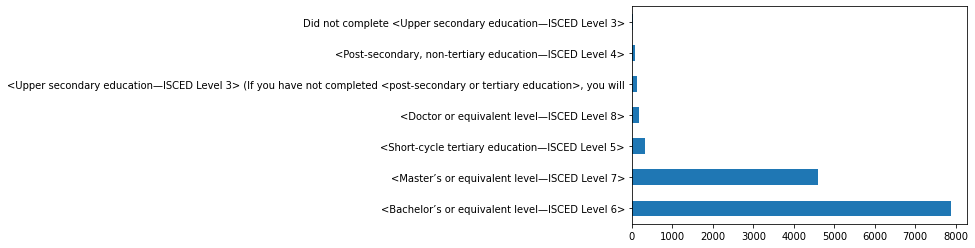

In [57]:
math_teach['BTBG04'].value_counts().plot(kind='barh');

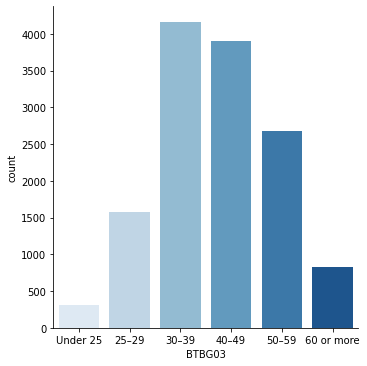

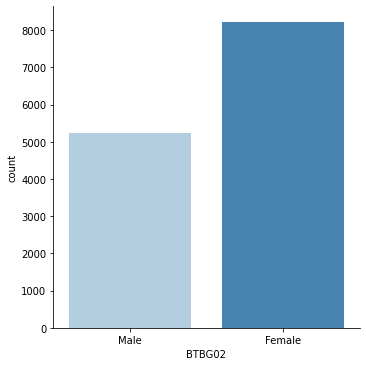

In [58]:
cat_type = CategoricalDtype(categories=['Under 25', '25–29', '30–39', '40–49', '50–59', '60 or more'], ordered=True)
math_teach['BTBG03'] = math_teach['BTBG03'].astype(cat_type)
sns.catplot(x='BTBG03', kind='count', palette='Blues', data=math_teach);
sns.catplot(x='BTBG02', kind='count', palette='Blues', data=math_teach);

**Initial Observations about `math_teach` dataset:**
* Approximately Normal distribution of teacher ages
* Teach education is highly concentrated in the Bachelor's and Master's level
* Significantly more female teacher than males

**`math_teach` Data Preparation**
* drop unnecessary columns
* convert IDCNTRY, IDSCHOOL, IDTEALIN, IDTEACH, IDLINK to integers
* trim and convert BTBG04 to ordered categoricals (ISCED level)
* convert to integer and combine BTBG05* columns to study_stem_edu column
* drop BTBG06* columns because already summarized in BTBGEAS
* drop BTBG07* columns because already summarized in BTBGSOS
* drop BTBG08* columns because already summarized in BTBGTJS
* convert to integer scale BTBG09* columns for comparing teaching environments
* convert to integer scale BTBG12* columns for tracking effectiveness of teacher practices
* drop BTBG13* columns because already summarized in BTBGLSN
* convert to integer scale BTBM15* columns for tracking effectiveness of teacher practices
* convert to integer scale BTBM17* columns for tracking effectiveness of computer access
* drop BTBM18* columns because already summarized in BTDMNUM, BTDMALG, BTDMGEO, BTDMDAT
* convert to integer scale BTBM19* columns for tracking effectiveness of homework practices
* convert to integer scale BTBM20* columns for tracking effectiveness of assessment practices
* drop BTBM22* columns because alreadys summarized in BTBM23
* convert BTDGEAS, BTDGLSN, BTDGSOS, BTDGTJS columns to ordered categoricals
* rename all columns to be more descriptive
* merge with average student performance by teacher

In [59]:
sci_teach.head()

IDCNTRY  IDSCHOOL    IDTEALIN   IDTEACH  IDLINK            ITCOURSE  \
0   7842.0    5001.0  50010203.0  500102.0     3.0  Integrated science   
1   7842.0    5001.0  50010204.0  500102.0     4.0  Integrated science   
2   7842.0    5004.0  50040202.0  500402.0     2.0  Integrated science   
3   7842.0    5004.0  50040404.0  500404.0     4.0  Integrated science   
4   7842.0    5006.0  50060202.0  500602.0     2.0  Integrated science   

   BTBG01  BTBG02 BTBG03                                          BTBG04  \
0    30.0    Male  50–59    <Master’s or equivalent level—ISCED Level 7>   
1    30.0    Male  50–59    <Master’s or equivalent level—ISCED Level 7>   
2    10.0    Male  30–39  <Bachelor’s or equivalent level—ISCED Level 6>   
3     4.0  Female  25–29    <Master’s or equivalent level—ISCED Level 7>   
4    11.0  Female  40–49  <Bachelor’s or equivalent level—ISCED Level 6>   

  BTBG05A BTBG05B BTBG05C BTBG05D BTBG05E BTBG05F BTBG05G BTBG05H BTBG05I  \
0      No     Yes     Yes     Yes     Yes      No     Yes      No      No   
1      No     Yes     Yes     Yes     Yes      No     Yes      No      No   
2      No      No      No      No      No      No     Yes     Yes     Yes   
3      No     Yes     Yes     Yes      No      No     Yes      No     Yes   
4     Yes     Yes     Yes     Yes      No      No      No      No      No   

     BTBG06A    BTBG06B BTBG06C    BTBG06D BTBG06E   BTBG06F    BTBG06G  \
0       High       High  Medium       High  Medium       Low       High   
1       High       High  Medium       High  Medium       Low       High   
2       High       High    High       High     Low  Very low        Low   
3       High     Medium  Medium       High  Medium    Medium       High   
4  Very high  Very high    High  Very high    High      High  Very high   

     BTBG06H    BTBG06I BTBG06J BTBG06K    BTBG06L      BTBG07A      BTBG07B  \
0        Low     Medium  Medium  Medium  Very high  Agree a lot  Agree a lot   
1        Low     Medium  Medium  Medium  Very high  Agree a lot  Agree a lot   
2   Very low        Low  Medium     Low       High  Agree a lot  Agree a lot   
3     Medium       High  Medium    High       High  Agree a lot  Agree a lot   
4  Very high  Very high    High    High       High  Agree a lot  Agree a lot   

          BTBG07C            BTBG07D            BTBG07E         BTBG07F  \
0     Agree a lot     Agree a little     Agree a little     Agree a lot   
1     Agree a lot     Agree a little     Agree a little     Agree a lot   
2  Agree a little  Disagree a little  Disagree a little  Disagree a lot   
3     Agree a lot        Agree a lot        Agree a lot     Agree a lot   
4     Agree a lot        Agree a lot        Agree a lot     Agree a lot   

          BTBG07G            BTBG07H     BTBG08A     BTBG08B     BTBG08C  \
0     Agree a lot        Agree a lot  Very often  Very often  Very often   
1     Agree a lot        Agree a lot  Very often  Very often  Very often   
2  Agree a little  Disagree a little  Very often       Often       Often   
3     Agree a lot        Agree a lot  Very often  Very often  Very often   
4     Agree a lot        Agree a lot  Very often  Very often  Very often   

      BTBG08D     BTBG08E            BTBG09A            BTBG09B  \
0  Very often  Very often     Agree a little        Agree a lot   
1  Very often  Very often     Agree a little        Agree a lot   
2       Often       Often        Agree a lot        Agree a lot   
3  Very often  Very often     Agree a little  Disagree a little   
4  Very often  Very often  Disagree a little     Agree a little   

             BTBG09C         BTBG09D         BTBG09E         BTBG09F  \
0        Agree a lot  Agree a little     Agree a lot     Agree a lot   
1        Agree a lot  Agree a little     Agree a lot     Agree a lot   
2  Disagree a little  Agree a little  Agree a little  Disagree a lot   
3  Disagree a little  Agree a little  Agree a little  Disagree a lot   
4  Disagree a little     Agree a lo

In [60]:
sci_teach_drop_new = list(sci_teach.columns[sci_teach.isna().all()])+list(sci_teach.columns[sci_teach.nunique()==1])

In [61]:
sci_teach_drop_new = sci_teach_drop_new + ['LCID_T']

In [62]:
sci_teach.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22648 entries, 0 to 22647
Columns: 168 entries, IDCNTRY to VERSION
dtypes: float64(19), object(149)
memory usage: 29.0+ MB


In [63]:
sci_teach_codes.loc[[col for col in sci_teach.columns if 'BTBG' not in col],:].iloc[5:,:]

Label
Variable                                                   
ITCOURSE                         Subject Code in instrument
BTBS14                     SCI\TIME SPENT SCI INSTR MINUTES
BTBS15A                SCI\ASK STUDENTS\EXPLAIN NEW CONTENT
BTBS15B                  SCI\ASK STUDENTS\OBSERVE PHENOMENA
BTBS15C             SCI\ASK STUDENTS\DEMONSTRATE EXPERIMENT
BTBS15D                   SCI\ASK STUDENTS\PLAN EXPERIMENTS
BTBS15E                SCI\ASK STUDENTS\CONDUCT EXPERIMENTS
BTBS15F                       SCI\ASK STUDENTS\PRESENT DATA
BTBS15G                     SCI\ASK STUDENTS\INTERPRET DATA
BTBS15H            SCI\ASK STUDENTS\USE EVIDENCE TO SUPPORT
BTBS15I                     SCI\ASK STUDENTS\READ TEXTBOOKS
BTBS15J                     SCI\ASK STUDENTS\MEMORIZE FACTS
BTBS15K                       SCI\ASK STUDENTS\USE FORMULAS
BTBS15L                      SCI\ASK STUDENTS\DO FIELD WORK
BTBS15M               SCI\ASK STUDENTS\MIXED ABILITY GROUPS
BTBS15N                SCI\ASK STUDENTS\SAME ABILITY GROUPS
BTBS16A         SCI\COMPUTER TABLET AVAILABILITY DURING SCI
BTBS16BA     SCI\ACCESS TO COMPUTER\EACH STD HAS A COMPUTER
BTBS16BB         SCI\ACCESS TO COMPUTER\CLASS HAS COMPUTERS
BTBS16BC        SCI\ACCESS TO COMPUTER\SCHOOL HAS COMPUTERS
BTBS16CA        SCI\LEARNING ACTIVITIES ON COMP\WHOLE CLASS
BTBS16CB     SCI\LEARNING ACTIVITIES ON COMP\LOW PERFORMING
BTBS16CC    SCI\LEARNING ACTIVITIES ON COMP\HIGH PERFORMING
BTBS16CD      SCI\LEARNING ACTIVITIES ON COMP\SPECIAL NEEDS
BTBS17AA         SCI\TOPIC\BIO\DIFFERENCES TAXONOMIC GROUPS
BTBS17AB                         SCI\TOPIC\BIO\MAJOR ORGANS
BTBS17AC             SCI\TOPIC\BIO\CELLS AND THEIR FUNCTION
BTBS17AD                         SCI\TOPIC\BIO\REPRODUCTION
BTBS17AE                    SCI\TOPIC\BIO\ROLE OF VARIATION
BTBS17AF        SCI\TOPIC\BIO\INTERDEPENDENCE OF POPULATION
BTBS17AG                         SCI\TOPIC\BIO\HUMAN HEALTH
BTBS17BA               SCI\TOPIC\CHEM\PARTICULATE STRUCTURE
BTBS17BB                      SCI\TOPIC\CHEM\PERIODIC TABLE
BTBS17BC            SCI\TOPIC\CHEM\PHY CHEM PROPERTY MATTER
BTBS17BD              SCI\TOPIC\CHEM\MIXTURES AND SOLUTIONS
BTBS17BE                     SCI\TOPIC\CHEM\ACIDS AND BASES
BTBS17BF                  SCI\TOPIC\CHEM\CHEMICAL REACTIONS
BTBS17BG                   SCI\TOPIC\CHEM\MATTER AND ENERGY
BTBS17BH                   SCI\TOPIC\CHEM\ROLE OF ELECTRONS
BTBS17CA                      SCI\TOPIC\PHY\PHYSICAL STATES
BTBS17CB                SCI\TOPIC\PHY\ENERGY TRANSFORMATION
BTBS17CC            SCI\TOPIC\PHY\BASIC PROPERTIES OF LIGHT
BTBS17CD            SCI\TOPIC\PHY\BASIC PROPERTIES OF SOUND
BTBS17CE                    SCI\TOPIC\PHY\ELECTRIC CIRCUITS
BTBS17CF                   SCI\TOPIC\PHY\PROPERTIES MAGNETS
BTBS17CG                    SCI\TOPIC\PHY\MOTION AND FORCES
BTBS17DA                   SCI\TOPIC\EARTH\EARTHS STRUCTURE
BTBS17DB                   SCI\TOPIC\EARTH\EARTHS PROCESSES
BTBS17DC                   SCI\TOPIC\EARTH\EARTHS RESOURCES
BTBS17DD              SCI\TOPIC\EARTH\EARTH IN SOLAR SYSTEM
BTBS18A                 SCI\HOW OFTEN SCI HOMEWORK ASSIGNED
BTBS18B                          SCI\TIME SPENT ON HOMEWORK
BTBS18CA                   SCI\HOMEWORK\CORRECT ASSIGNMENTS
BTBS18CB                  SCI\HOMEWORK\CORRECT OWN HOMEWORK
BTBS18CC                      SCI\HOMEWORK\DISCUSS HOMEWORK
BTBS18CD                  SCI\HOMEWORK\MONITOR COMPLETENESS
BTBS18CE                        SCI\HOMEWORK\USE FOR GRADES
BTBS19A        SCI\IMPORTANCE STRATEGIES\OBSERVING STUDENTS
BTBS19B           SCI\IMPORTANCE STRATEGIES\ASKING STUDENTS
BTBS19C         SCI\IMPORTANCE STRATEGIES\SHORT ASSESEMENTS
BTBS19D              SCI\IMPORTANCE STRATEGIES\LONGER TESTS
BTBS19E        SCI\IMPORTANCE STRATEGIES\LONG-TERM PROJECTS
BTBS20                     SCI\TESTS ON COMPUTER OR TABLETS
BTBS21AA          SCI\PROF DEVELOPMENT PAST\SCIENCE CONTENT
BTBS21BA        SCI\PROF DEVELOPMENT FUTURE\SCIENCE CONTENT
BTBS21AB         SCI\PROF DEVELOPM

In [64]:
sci_teach.describe()

IDCNTRY      IDSCHOOL      IDTEALIN        IDTEACH        IDLINK  \
count   22648.000000  22648.000000  2.264800e+04   22648.000000  22648.000000   
mean    31454.742759   5130.338661  5.130378e+07  513037.700371      5.529981   
std    139064.866672    112.485862  1.124852e+06   11248.526185      8.923136   
min        36.000000   5001.000000  5.001010e+07  500101.000000      1.000000   
25%       348.000000   5053.000000  5.053071e+07  505307.000000      2.000000   
50%       458.000000   5106.000000  5.106030e+07  510603.000000      3.000000   
75%       752.000000   5169.000000  5.169020e+07  516902.000000      5.000000   
max    710004.000000   5631.000000  5.631030e+07  563103.000000     53.000000   

             BTBG01        BTBG10        BTBG11        BTBS14       BTBGEAS  \
count  20738.000000  20234.000000  19792.000000  19816.000000  20855.000000   
mean      16.965956     25.370515      2.941188    139.375101     10.238353   
std       11.146168      9.939160      7.179479     78.428047      2.104111   
min        0.000000      1.000000      0.000000      0.000000      0.873410   
25%        8.000000     20.000000      0.000000     90.000000      8.846900   
50%       15.000000     25.000000      0.000000    120.000000     10.051020   
75%       25.000000     30.000000      3.000000    180.000000     11.550050   
max       60.000000    117.000000    111.000000    700.000000     17.780680   

            BTBGLSN       BTBGSOS       BTBGTJS       BTBSESI       BTDSBIO  \
count  20440.000000  20700.000000  20794.000000  20561.000000  12694.000000   
mean      10.030577     10.444209      9.826156      9.646790     74.968790   
std        1.979319      2.116645      1.815395      2.190059     23.169797   
min        3.623690      4.426320      5.281180      6.513090      0.000000   
25%        8.632380      8.783370      8.482860      8.038700     57.142860   
50%       10.145090     10.072630     10.258740      9.836960     71.428570   
75%       11.288280     11.789980     11.745590     10.968860    100.000000   
max       15.295110     13.870350     11.745590     16.032560    100.000000   

            BTDSCHE       BTDSPHY       BTDSEAR  VERSION  
count  12809.000000  12849.000000  11876.000000  22648.0  
mean      75.931311     70.421378     73.435921      4.0  
std       23.687424     25.143445     34.276024      0.0  
min        0.000000      0.000000      0.000000      4.0  
25%       62.500000     57.142860     50.000000      4.0  
50%       75.000000     71.428570    100.000000      4.0  
75%      100.000000    100.000000    100.000000      4.0  
max      100.000000    100.000000    100.000000      4.0

In [65]:
sci_teach.dtypes

IDCNTRY     float64
IDSCHOOL    float64
IDTEALIN    float64
IDTEACH     float64
IDLINK      float64
             ...   
BTDSBIO     float64
BTDSCHE     float64
BTDSPHY     float64
BTDSEAR     float64
VERSION     float64
Length: 168, dtype: object

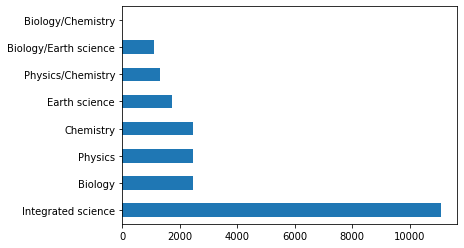

In [66]:
sci_teach['ITCOURSE'].value_counts().plot(kind='barh');

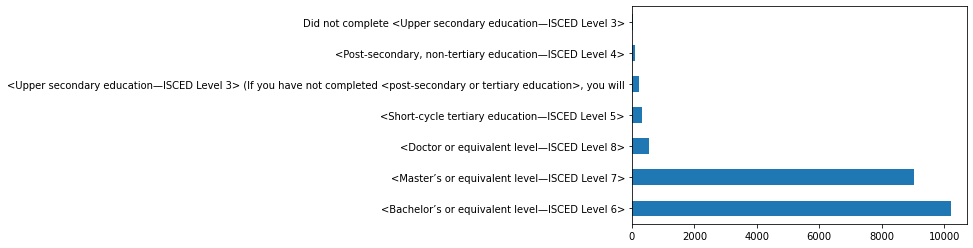

In [67]:
sci_teach['BTBG04'].value_counts().plot(kind='barh');

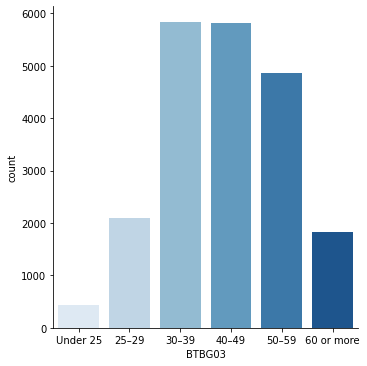

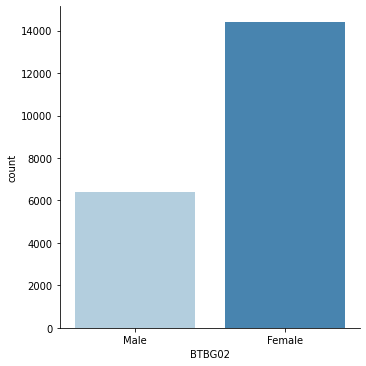

In [68]:
cat_type = CategoricalDtype(categories=['Under 25', '25–29', '30–39', '40–49', '50–59', '60 or more'], ordered=True)
sci_teach['BTBG03'] = sci_teach['BTBG03'].astype(cat_type)
sns.catplot(x='BTBG03', kind='count', palette='Blues', data=sci_teach);
sns.catplot(x='BTBG02', kind='count', palette='Blues', data=sci_teach);

**Initial Observations about `sci_teach` dataset:**
* Approximately Normal distribution of teacher ages (slightly older than math teachers)
* Teach education is highly concentrated in the Bachelor's and Master's level (slightly more educated that math teachers)
* Significantly more female teacher than males (more significant difference than math teachers)
* Most schools offer Integrated Science as compared to specific disciplines

**`sci_teach` Data Preparation**
* drop unnecessary columns
* convert IDCNTRY, IDSCHOOL, IDTEALIN, IDTEACH, IDLINK to integers
* trim and convert BTBG04 to ordered categoricals (ISCED level)
* convert to integer and combine BTBG05* columns to study_stem_edu column
* drop BTBG06* columns because already summarized in BTBGEAS
* drop BTBG07* columns because already summarized in BTBGSOS
* drop BTBG08* columns because already summarized in BTBGTJS
* convert to integer scale BTBG09* columns for comparing teaching environments
* convert to integer scale BTBG12* columns for tracking effectiveness of teacher practices
* drop BTBG13* columns because already summarized in BTBGLSN
* convert to integer scale BTBS15* columns for tracking effectiveness of teacher practices
* convert to integer scale BTBS16* columns for tracking effectiveness of computer access
* drop BTBS17* columns because already summarized in BTDSBIO, BTDSCHE, BTDSPHY, BTDSEAR
* convert to integer scale BTBS18* columns for tracking effectiveness of homework practices
* convert to integer scale BTBS19* columns for tracking effectiveness of assessment practices
* drop BTBS21* columns because alreadys summarized in BTBM22
* convert BTDGEAS, BTDGLSN, BTDGSOS, BTDGTJS, BTDSESI columns to ordered categoricals
* rename all columns to be more descriptive
* merge with average student performance by teacher

[Return to Top](#top)

<div id='data_preparation'></div>

# Data Preparation

Jump to:
1. [`stud_ach Preparation`](#prep1)
1. [`school Preparation`](#prep2)
1. [`student Preparation`](#prep3)
1. [`stud_teach Preparation`](#prep4)
1. [`math_teach Preparation`](#prep5)
1. [`sci_teach Preparation`](#prep6)

[Return to Top of Data Preparation](#data_preparation)

<div id='prep1'></div>

**`stud_ach` Data Preparation**
* ~~drop unnecessary (or null) columns~~
* ~~convert IDCNTRY, IDSCHOOL, IDCLASS, IDSTUD to integers~~
* ~~trim and convert IDBOOK, IDGRADE to integer~~
* ~~rename all columns to be more descriptive~~

#### Define
* drop unnecessary (or null) columns

#### Code

In [69]:
stud_ach.drop(columns=stud_ach_drop_new, inplace=True)
stud_ach.drop(columns=['LCID_SA'], inplace=True)

#### Test

In [70]:
set(stud_ach_drop_new) & set(stud_ach.columns)

set()

#### Define
* convert IDCNTRY, IDSCHOOL, IDCLASS, IDSTUD to integers

#### Code

In [71]:
stud_ach['IDCNTRY'] = stud_ach['IDCNTRY'].astype(int)
stud_ach['IDSCHOOL'] = stud_ach['IDSCHOOL'].astype(int)
stud_ach['IDCLASS'] = stud_ach['IDCLASS'].astype(int)
stud_ach['IDSTUD'] = stud_ach['IDSTUD'].astype(int)

#### Test

In [72]:
stud_ach.dtypes[:10]

IDCNTRY          int32
IDBOOK          object
IDSCHOOL         int32
IDCLASS          int32
IDSTUD           int32
IDGRADE         object
ITLANG_SA       object
ITSEX           object
BSDAGE         float64
MP52024_val    float64
dtype: object

#### Define
* trim and convert IDBOOK, IDGRADE to integer

#### Code

In [73]:
stud_ach['IDBOOK'] = stud_ach['IDBOOK'].apply(lambda x: x[-2:]).astype(int)
stud_ach['IDGRADE'] = stud_ach['IDGRADE'].apply(lambda x: x[-1]).astype(int)

#### Test

In [74]:
stud_ach.dtypes[:10]

IDCNTRY          int32
IDBOOK           int32
IDSCHOOL         int32
IDCLASS          int32
IDSTUD           int32
IDGRADE          int32
ITLANG_SA       object
ITSEX           object
BSDAGE         float64
MP52024_val    float64
dtype: object

#### Define
* rename all columns to be more descriptive

#### Code

In [75]:
stud_ach_col_dict = {'ITLANG_SA':'language','IDGRADE':'grade','ITSEX':'sex','BSDAGE':'age','IDBOOK':'test_book'}
stud_ach.rename(columns=stud_ach_col_dict, inplace=True)

#### Test

In [76]:
[col for col in stud_ach.columns if '_avg' not in col and '_val' not in col and '_sd' not in col]

['IDCNTRY',
 'test_book',
 'IDSCHOOL',
 'IDCLASS',
 'IDSTUD',
 'grade',
 'language',
 'sex',
 'age']

[Return to Top of Data Preparation](#data_preparation)

<div id='prep2'></div>

**`school` Data Preparation**
* ~~drop unnecessary columns~~
* ~~convert IDCNTRY, IDSCHOOL to integers~~
* ~~trim and convert IDGRADE to integer~~
* ~~convert BCDGDAS, BCDGEAS, BCDGMRS, BCDGSRS, BCDGSBC to ordered categoricals~~
* ~~rename all columns to be more descriptive~~
* ~~merge with student performance by school~~

#### Define
* Drop repetitive columns from the dataset

#### Code

In [77]:
school.drop(columns=school_drop_new,inplace=True)
school.drop(columns=['LCID_C'], inplace=True)

#### Test

In [78]:
set(school_drop_new) & set(school.columns)

set()

#### Define
* Convert IDCNTRY, IDSCHOOL to integers

#### Code

In [79]:
school['IDCNTRY'] = school['IDCNTRY'].astype(int)
school['IDSCHOOL'] = school['IDSCHOOL'].astype(int)

#### Test

In [80]:
school.dtypes[:5]

IDCNTRY       int32
IDSCHOOL      int32
IDGRADE      object
ITLANG_C     object
BCBGDAS     float64
dtype: object

#### Define
* Trim and convert IDGRADE to integer (8 or 9)

#### Code

In [81]:
school['IDGRADE'] = school['IDGRADE'].apply(lambda x: x[-1]).astype(int)

#### Test

In [82]:
school['IDGRADE'].unique()

array([8, 9])

#### Define
* Convert BCDGDAS, BCDGEAS, BCDGMRS, BCDGSRS, BCDGSBC to ordered categoricals

#### Code

In [83]:
school_indices = ['BCDGDAS', 'BCDGEAS', 'BCDGMRS', 'BCDGSRS', 'BCDGSBC']
for col in school_indices:
    print(school_codes.loc[col,:])
    print(school[col].unique())

Label    School Discipline Problems-Prncpl/IDX
Name: BCDGDAS, dtype: object
['Minor Problems' 'Hardly Any Problems' nan 'Moderate to Severe Problems']
Label    School Emph on Acad Success-Prncpl/IDX
Name: BCDGEAS, dtype: object
['Medium Emphasis' 'High Emphasis' 'Very High Emphasis' nan]
Label    Instr Aff by Mat Res Shortage-Prncpl/IDX
Name: BCDGMRS, dtype: object
['Not Affected' 'Affected' 'Affected A Lot' nan]
Label    Instr Aff by Sci Res Shortage-Prncpl/IDX
Name: BCDGSRS, dtype: object
['Not Affected' 'Affected A Lot' nan 'Affected']
Label    School Composition by Socioeconomic Background
Name: BCDGSBC, dtype: object
['Neither More Affluent nor More Disadvantaged' 'More Affluent'
 'More Disadvantaged' nan]


In [84]:
disc_prob_type = CategoricalDtype(categories=['Hardly Any Problems','Minor Problems','Moderate to Severe Problems'], ordered=True)
school['disc_prob'] = school['BCDGDAS'].astype(disc_prob_type)
acad_emph_type = CategoricalDtype(categories=['Medium Emphasis', 'High Emphasis', 'Very High Emphasis'], ordered=True)
school['acad_emph'] = school['BCDGEAS'].astype(acad_emph_type)
shortage_affect_type = CategoricalDtype(categories=['Not Affected', 'Affected', 'Affected A Lot'], ordered=True)
school['math_shortage'] = school['BCDGMRS'].astype(shortage_affect_type)
school['sci_shortage'] = school['BCDGSRS'].astype(shortage_affect_type)
school_socio_type = CategoricalDtype(categories=['More Disadvantaged', 'Neither More Affluent nor More Disadvantaged', 'More Affluent'], ordered=True)
school['socio_background'] = school['BCDGSBC'].astype(school_socio_type)
school.drop(columns=school_indices, inplace=True)

#### Test

In [85]:
school.dtypes

IDCNTRY                int32
IDSCHOOL               int32
IDGRADE                int32
ITLANG_C              object
BCBGDAS              float64
BCBGEAS              float64
BCBGMRS              float64
BCBGSRS              float64
BCDGTIHY             float64
disc_prob           category
acad_emph           category
math_shortage       category
sci_shortage        category
socio_background    category
dtype: object

#### Define
* rename all columns to be more descriptive

#### Code

In [86]:
school_col_dict = {'BCBGDAS':'disc_prob_score','BCBGEAS':'acad_emph_score','BCBGMRS':'math_shortage_score','BCBGSRS':'sci_shortage_score','BCDGTIHY':'acad_hours','ITLANG_C':'language','IDGRADE':'grade'}
school.rename(columns=school_col_dict,inplace=True)

#### Test

In [87]:
school.columns

Index(['IDCNTRY', 'IDSCHOOL', 'grade', 'language', 'disc_prob_score',
       'acad_emph_score', 'math_shortage_score', 'sci_shortage_score',
       'acad_hours', 'disc_prob', 'acad_emph', 'math_shortage', 'sci_shortage',
       'socio_background'],
      dtype='object')

#### Define
* merge with student performance by school

#### Code

In [88]:
stud_ach.groupby(['IDCNTRY','IDSCHOOL']).mean().loc[:,[col for col in stud_ach.columns if '_avg' in col]]

mmat_avg    ssci_avg    malg_avg    mapp_avg    mdat_avg  \
IDCNTRY IDSCHOOL                                                               
36      5001      512.160420  528.909690  498.302685  521.510511  531.893457   
        5002      500.057398  525.348892  480.069888  501.129069  521.833812   
        5003      525.973490  533.678966  511.335672  529.865375  544.964311   
        5004      568.834716  582.543276  557.924186  572.206090  585.849087   
        5005      458.656151  478.569777  444.118141  460.885134  471.541118   
...                      ...         ...         ...         ...         ...   
710004  5506      452.359804  468.081983  462.101839  455.212580  438.792544   
        5516      602.888115  632.628227  626.841950  597.759074  583.927258   
        5517      419.186459  395.377530  429.928165  421.909539  415.132096   
        5518      386.538689  389.442015  388.189399  390.103950  381.652148   
        5520      540.502919  564.136019  545.918544  536.166104  528.333465   

                    mgeo_avg    mkno_avg    mnum_avg    mrea_avg    sapp_avg  \
IDCNTRY IDSCHOOL                                                               
36      5001      510.723844  506.440412  516.348085  513.322954  536.406658   
        5002      495.260373  493.117152  505.968088  495.033254  533.047731   
        5003      519.626145  517.451107  531.761602  521.959500  538.120939   
        5004      566.528514  552.770096  580.028650  567.582195  587.872312   
        5005      452.514983  450.811446  456.019090  451.648922  481.027424   
...                      ...         ...         ...         ...         ...   
710004  5506      439.539107  445.538925  455.938441  460.605905  473.185123   
        5516      588.903224  607.187292  609.126282  599.514280  629.275423   
        5517      411.644396  413.414427  428.663409  426.951825  410.715863   
        5518      375.569264  366.523464  391.213308  401.814731  394.776448   
        5520      531.399344  534.928037  537.833104  543.095488  579.713074   

                    sbio_avg    sche_avg    sear_avg    skno_avg    sphy_avg  \
IDCNTRY IDSCHOOL                                                               
36      5001      530.658886  514.227199  535.867503  507.441620  528.110842   
        5002      532.758198  512.284051  541.315108  514.368975  529.544135   
        5003      532.310956  526.377450  542.737756  525.064673  537.782550   
        5004      587.439474  577.372379  586.673154  575.790927  580.311813   
        5005      472.061751  452.380780  477.753128  461.967294  475.214976   
...                      ...         ...         ...         ...         ...   
710004  5506      454.353800  471.234008  465.058587  454.253831  465.100969   
        5516      634.215849  644.136851  635.950862  624.911290  613.534277   
        5517      396.357939  404.610874  408.782505  391.827735  407.385845   
        5518      380.595840  378.696205  401.607907  373.246617  386.977013   
        5520      563.955841  571.377793  577.770288  564.587764  559.173107   

                    srea_avg  
IDCNTRY IDSCHOOL              
36      5001      532.552107  
        5002      534.525980  
        5003      537.392486  
        5004      590.738231  
        5005      495.105472  
...                      ...  
710004  5506      473.847294  
        5516      636.991715  
        5517      391.658714  
        5518      383.254652  
        5520      561.533043  

[9397 rows x 16 columns]

In [89]:
school.set_index(['IDCNTRY','IDSCHOOL'])

grade   language  disc_prob_score  acad_emph_score  \
IDCNTRY IDSCHOOL                                                       
7842    5001          8    English          9.79606          7.03177   
        5004          8    English         10.10482          9.56054   
        5006          8    English         10.43939         11.35999   
        5007          8    English         12.80218         13.19357   
        5008          8    English         14.02858         13.19357   
...                 ...        ...              ...              ...   
710004  5506          9    English          8.24184          7.03177   
        5516          9    English         14.02858         16.36222   
        5517          9  Afrikaans          8.41206          8.67341   
        5518          9  Afrikaans          8.08398          7.39368   
        5520          9  Afrikaans         14.02858         16.36222   

                  math_shortage_score  sci_shortage_score  acad_hours  \
IDCNTRY IDSCHOOL                                                        
7842    5001                 14.25596            14.57241  1350.00000   
        5004                 12.92960            14.57241  1680.00000   
        5006                  8.03304             7.45575  1281.00000   
        5007                 12.29366            12.50979  1311.50000   
        5008                  4.23486             4.07624         NaN   
...                               ...                 ...         ...   
710004  5506                  9.41874             9.46956  1172.50000   
        5516                 14.25596            14.57241  1013.25000   
        5517                 10.21426            10.17656  1100.00000   
        5518                  9.62794             9.57915  1061.33333   
        5520                 14.25596            14.57241  1200.00000   

                            disc_prob           acad_emph   math_shortage  \
IDCNTRY IDSCHOOL                                                            
7842    5001           Minor Problems     Medium Emphasis    Not Affected   
        5004           Minor Problems     Medium Emphasis    Not Affected   
        5006           Minor Problems       High Emphasis        Affected   
        5007      Hardly Any Problems  Very High Emphasis    Not Affected   
        5008      Hardly Any Problems  Very High Emphasis  Affected A Lot   
...                               ...                 ...             ...   
710004  5506           Minor Problems     Medium Emphasis        Affected   
        5516      Hardly Any Problems  Very High Emphasis    Not Affected   
        5517           Minor Problems     Medium Emphasis        Affected   
        5518           Minor Problems     Medium Emphasis        Affected   
        5520      Hardly Any Problems  Very High Emphasis    Not Affected   

                    sci_shortage                              socio_background  
IDCNTRY IDSCHOOL                                                                
7842    5001        Not Affected  Neither More Affluent nor More Disadvantaged  
        5004        Not Affected                                 More Affluent  
        5006      Affected A Lot                                 More Affluent  
        5007        Not Affected                                 More Affluent  
        5008      Affected A Lot  Neither More Affluent nor More Disadvantaged  
...                          ...                                           ...  
710004  5506            Affected                            More Disadvantaged  
        5516        Not Affected                                 More Affluent  
        5517            Affected                            More Disadvantaged  
        5518            Affected                            More Disadvantaged  
        5520        Not Affected                                 More Affluent  

[9925 rows x 12 columns]

In [90]:
school = school.set_index(['IDCNTRY','IDSCHOOL']).join(stud_ach.groupby(['IDCNTRY','IDSCHOOL']).mean().loc[:,[col for col in stud_ach.columns if '_avg' in col]], how='left').reset_index()

#### Test

In [91]:
school.columns

Index(['IDCNTRY', 'IDSCHOOL', 'grade', 'language', 'disc_prob_score',
       'acad_emph_score', 'math_shortage_score', 'sci_shortage_score',
       'acad_hours', 'disc_prob', 'acad_emph', 'math_shortage', 'sci_shortage',
       'socio_background', 'mmat_avg', 'ssci_avg', 'malg_avg', 'mapp_avg',
       'mdat_avg', 'mgeo_avg', 'mkno_avg', 'mnum_avg', 'mrea_avg', 'sapp_avg',
       'sbio_avg', 'sche_avg', 'sear_avg', 'skno_avg', 'sphy_avg', 'srea_avg'],
      dtype='object')

[Return to Top of Data Preparation](#data_preparation)

<div id='prep3'></div>

**`student` Data Preparation**
* ~~drop unnecessary columns~~
* ~~convert IDCNTRY, IDSCHOOL, IDCLASS, IDSTUD to integers~~
* ~~trim and convert IDBOOK, IDGRADE to integers~~
* ~~convert to integer and combine BSBG05* columns to home_possession column~~
* ~~convert to string and combine BSBG09* columns to ordered categorical age_immigration column~~
* ~~convert to integer and combine BSBG12* columns to internet_access column~~
* ~~convert BSBG03, BSBG04, BSBG10, BSBG11*, BSDG* columns to ordered categoricals~~
* ~~trim and convert BSBG06A, BSBG06B, BSBG07 to ordered categoricals (ISCED level)~~
* ~~convert BSBG08* to boolean~~
* ~~rename all columns to be more descriptive~~
* ~~merge with student performance~~

#### Define
* drop unnecessary columns

#### Code

In [92]:
student_drop_new = student_drop_new + ['LCID_SQ','ITLANG_SA','LCID_SA']
student.drop(columns=student_drop_new, inplace=True)

#### Test

In [93]:
set(student_drop_new) & set(student.columns)

set()

#### Define
* convert IDCNTRY, IDSCHOOL, IDCLASS, IDSTUD to integers
* trim and convert IDBOOK, IDGRADE to integers

#### Code

In [94]:
student[['IDCNTRY','IDSCHOOL','IDCLASS','IDSTUD']] = student[['IDCNTRY','IDSCHOOL','IDCLASS','IDSTUD']].astype(int)
student['IDBOOK'] = student['IDBOOK'].apply(lambda x: x[-2:]).astype(int)
student['IDGRADE'] = student['IDGRADE'].apply(lambda x: x[-1]).astype(int)

#### Test

In [95]:
student[['IDCNTRY','IDSCHOOL','IDCLASS','IDSTUD','IDBOOK','IDGRADE']].dtypes

IDCNTRY     int32
IDSCHOOL    int32
IDCLASS     int32
IDSTUD      int32
IDBOOK      int32
IDGRADE     int32
dtype: object

#### Define
* convert to integer and combine BSBG05* columns to home_possession column
* convert to integer and combine BSBG12* columns to internet_access column

#### Code

In [96]:
conv_col = {'BSBG05':'home_possession','BSBG12':'internet_access'}
for base_col in conv_col.keys():
    all_cols = [col for col in student.columns if base_col in col]
    for i, single_col in enumerate(all_cols):
        if i == 0:
            student[conv_col[base_col]] = student[single_col].apply(lambda x: np.nan if x!=x else int(x=='Yes')).astype(float)
        else:
            student[conv_col[base_col]] = student[conv_col[base_col]] + student[single_col].apply(lambda x: np.nan if x!=x else int(x=='Yes')).astype(float)
    student.drop(columns=all_cols, inplace=True)

#### Test

In [97]:
student.columns

Index(['IDCNTRY', 'IDBOOK', 'IDSCHOOL', 'IDCLASS', 'IDSTUD', 'BSBG03',
       'BSBG04', 'BSBG06A', 'BSBG06B', 'BSBG07', 'BSBG08A', 'BSBG08B',
       'BSBG09A', 'BSBG09B', 'BSBG10', 'BSBG11A', 'BSBG11B', 'IDGRADE',
       'ITLANG_SQ', 'ITSEX', 'BSDAGE', 'BSBGHER', 'BSDGHER', 'BSBGSSB',
       'BSDGSSB', 'BSBGSB', 'BSDGSB', 'BSBGSLM', 'BSDGSLM', 'BSBGICM',
       'BSDGICM', 'BSBGDML', 'BSDGDML', 'BSBGSCM', 'BSDGSCM', 'BSBGSVM',
       'BSDGSVM', 'BSBGSLS', 'BSDGSLS', 'BSBGICS', 'BSDGICS', 'BSBGSCS',
       'BSDGSCS', 'BSBGSVS', 'BSDGSVS', 'BSBGSLB', 'BSDGSLB', 'BSBGICB',
       'BSDGICB', 'BSBGSCB', 'BSDGSCB', 'BSBGSLE', 'BSDGSLE', 'BSBGICE',
       'BSDGICE', 'BSBGSCE', 'BSDGSCE', 'BSBGSLC', 'BSDGSLC', 'BSBGICC',
       'BSDGICC', 'BSBGSCC', 'BSDGSCC', 'BSBGSLP', 'BSDGSLP', 'BSBGICP',
       'BSDGICP', 'BSBGSCP', 'BSDGSCP', 'BSBGSEC', 'BSDGSEC', 'BSDG05S',
       'BSDGEDUP', 'home_possession', 'internet_access'],
      dtype='object')

In [98]:
student[['home_possession','internet_access']].dtypes

home_possession    float64
internet_access    float64
dtype: object

#### Define
* convert to string and combine BSBG09* columns to ordered categorical age_immigration column

#### Code

In [99]:
for col in [col for col in student.columns if 'BSBG09' in col]:
    print(student[col].unique())

['Yes' 'No' nan]
[nan '5 to 10 years old' 'Younger than 5 years old'
 'Older than 10 years old']


In [100]:
def age_immigration_col(x):
    if x[0] == 'Yes':
        return('Birth')
    else:
        return(x[1])

In [101]:
student['age_immigration'] = student[['BSBG09A','BSBG09B']].apply(age_immigration_col, axis = 1)
student.drop(columns=['BSBG09A','BSBG09B'], inplace=True)

In [102]:
immigration_type = CategoricalDtype(categories=['Birth','Younger than 5 years old','5 to 10 years old', 'Older than 10 years old'], ordered=True)
student['age_immigration'] = student['age_immigration'].astype(immigration_type)

#### Test

In [103]:
student[[col for col in student.columns if 'BSBG09' in col or 'immigration' in col]].dtypes

age_immigration    category
dtype: object

#### Define
* convert BSBG03, BSBG04, BSBG10, BSBG11, BSDG columns to ordered categoricals

#### Code

In [106]:
new_cat_cols = ['BSBG03', 'BSBG04', 'BSBG10', 'BSBG11', 'BSDG']
for col_root in new_cat_cols:
    for col in student.columns:
        if col_root in col:
            print(student[col].unique())
            print(student_codes.loc[col,:])
            #input()

['Almost always' 'Always' nan 'Sometimes' 'Never']
Label    GEN\OFTEN SPEAK <LANG OF TEST> AT HOME
Name: BSBG03, dtype: object
['Enough to fill one shelf (11–25 books)' 'None or very few (0–10 books)'
 nan 'Enough to fill one bookcase (26–100 books)'
 'Enough to fill two bookcases (101–200 books)'
 'Enough to fill three or more bookcases (more than 200)']
Label    GEN\AMOUNT OF BOOKS IN YOUR HOME
Name: BSBG04, dtype: object
['Never or almost never' 'Once a week' 'Once every two month'
 'Once a month' 'Once every two weeks' nan]
Label    GEN\ABOUT HOW OFTEN ABSENT FROM SCHOOL
Name: BSBG10, dtype: object
['Sometimes' 'Every day' 'Almost every day' 'Never' nan]
Label    GEN\HOW OFTEN\TIRED
Name: BSBG11A, dtype: object
['Sometimes' nan 'Every day' 'Never' 'Almost every day']
Label    GEN\HOW OFTEN\HUNGRY
Name: BSBG11B, dtype: object
['Some Resources' 'Few Resources' 'Many Resources' nan]
Label    Home Educational Resources/IDX
Name: BSDGHER, dtype: object
['High Sense of School Belonging' 

In [107]:
info = {}
info['BSBG03'] = {'new_name':'acad_lang_home','ordered_cols':['Never','Sometimes','Almost always','Always']}
info['BSBG04'] = {'new_name':'books','ordered_cols':['None or very few (0–10 books)','Enough to fill one shelf (11–25 books)',
                                                     'Enough to fill one bookcase (26–100 books)','Enough to fill two bookcases (101–200 books)',
                                                     'Enough to fill three or more bookcases (more than 200)']}
info['BSBG10'] = {'new_name':'absent_freq','ordered_cols':['Never or almost never','Once every two month','Once a month','Once every two weeks','Once a week']}
info['BSBG11A'] = {'new_name':'tired_freq','ordered_cols':['Never','Sometimes','Almost every day','Every day']}
info['BSBG11B'] = {'new_name':'hungry_freq','ordered_cols':['Never','Sometimes','Almost every day','Every day']}
info['BSDGHER'] = {'new_name':'home_res','ordered_cols':['Few Resources','Some Resources','Many Resources']}
info['BSDGSSB'] = {'new_name':'belonging','ordered_cols':['Little Sense of School Belonging','Some Sense of School Belonging','High Sense of School Belonging']}
info['BSDGSB'] = {'new_name':'bullying','ordered_cols':['Never or Almost Never','About Monthly','About Weekly']}
info['BSDGSLM'] = {'new_name':'like_math','ordered_cols':['Do Not Like Learning Mathematics','Somewhat Like Learning Mathematics','Very Much Like Learning Mathematics']}
info['BSDGICM'] = {'new_name':'clear_math','ordered_cols':['Low Clarity of Instruction','Moderate Clarity of Instruction','High Clarity of Instruction']}
info['BSDGDML'] = {'new_name':'disorder_math','ordered_cols':['Few or No Lessons','Some Lessons','Most Lessons']}
info['BSDGSCM'] = {'new_name':'confident_math','ordered_cols':['Not Confident in Mathematics','Somewhat Confident in Mathematics','Very Confident in Mathematics']}
info['BSDGSVM'] = {'new_name':'value_math','ordered_cols':['Do Not Value Mathematics','Somewhat Value Mathematics','Strongly Value Mathematics']}
info['BSDGSLS'] = {'new_name':'like_science','ordered_cols':['Do Not Like Learning Science','Somewhat Like Learning Science','Very Much Like Learning Science']}
info['BSDGICS'] = {'new_name':'clear_science','ordered_cols':['Low Clarity of Instruction','Moderate Clarity of Instruction','High Clarity of Instruction']}
info['BSDGSCS'] = {'new_name':'confident_science','ordered_cols':['Not Confident in Science','Somewhat Confident in Science','Very Confident in Science']}
info['BSDGSVS'] = {'new_name':'value_science','ordered_cols':['Do Not Value Science','Somewhat Value Science','Strongly Value Science']}
info['BSDGSLB'] = {'new_name':'like_bio','ordered_cols':['Do Not Like Learning Biology','Somewhat Like Learning Biology','Very Much Like Learning Biology']}
info['BSDGICB'] = {'new_name':'clear_bio','ordered_cols':['Low Clarity of Instruction','Moderate Clarity of Instruction','High Clarity of Instruction']}
info['BSDGSCB'] = {'new_name':'confident_bio','ordered_cols':['Not Confident in Biology','Somewhat Confident in Biology','Very Confident in Biology']}
info['BSDGSLE'] = {'new_name':'like_earth','ordered_cols':['Do Not Like Learning Earth Science','Somewhat Like Learning Earth Science','Very Much Like Learning Earth Science']}
info['BSDGICE'] = {'new_name':'clear_earth','ordered_cols':['Low Clarity of Instruction','Moderate Clarity of Instruction','High Clarity of Instruction']}
info['BSDGSCE'] = {'new_name':'confident_earth','ordered_cols':['Not Confident in Earth Science','Somewhat Confident in Earth Science','Very Confident in Earth Science']}
info['BSDGSLC'] = {'new_name':'like_chem','ordered_cols':['Do Not Like Learning Chemistry','Somewhat Like Learning Chemistry','Very Much Like Learning Chemistry']}
info['BSDGICC'] = {'new_name':'clear_chem','ordered_cols':['Low Clarity of Instruction','Moderate Clarity of Instruction','High Clarity of Instruction']}
info['BSDGSCC'] = {'new_name':'confident_chem','ordered_cols':['Not Confident in Chemistry','Somewhat Confident in Chemistry','Very Confident in Chemistry']}
info['BSDGSLP'] = {'new_name':'like_phys','ordered_cols':['Do Not Like Learning Physics','Somewhat Like Learning Physics','Very Much Like Learning Physics']}
info['BSDGICP'] = {'new_name':'clear_phys','ordered_cols':['Low Clarity of Instruction','Moderate Clarity of Instruction','High Clarity of Instruction']}
info['BSDGSCP'] = {'new_name':'confident_phys','ordered_cols':['Not Confident in Physics','Somewhat Confident in Physics','Very Confident in Physics']}
info['BSDGSEC'] = {'new_name':'confident_computer','ordered_cols':['Low Self-Efficacy','Medium Self-Efficacy','High Self-Efficacy']}
info['BSDG05S'] = {'new_name':'study_support','ordered_cols':['Neither Own Room nor Internet Connection','Either Own Room or Internet Connection','Both Own Room and Internet Connection']}
info['BSDGEDUP'] = {'new_name':'','ordered_cols':['Some Primary, Lower Secondary or No School',
                                                 'Lower Secondary','Upper Secondary','Post-secondary but not University',
                                                 'University or Higher']}

In [112]:
for item in info.keys():
    cat_type = CategoricalDtype(categories=info[item]['ordered_cols'], ordered=True)
    student[item] = student[item].astype(cat_type)
    student.rename(columns={item:info[item]['new_name']},inplace=True)

#### Test

In [123]:
student.loc[:,[col for col in student.columns if col.islower()]].dtypes.sample(10)

confident_earth    category
belonging          category
bullying           category
clear_bio          category
study_support      category
books              category
clear_science      category
clear_chem         category
home_possession     float64
value_math         category
dtype: object

In [127]:
student[random.choice([col for col in student.columns if col.islower()])].unique()

['Enough to fill one shelf (11–25 books)', 'None or very few (0–10 books)', NaN, 'Enough to fill one bookcase (26–100 books)', 'Enough to fill two bookcases (101–200 books)', 'Enough to fill three or more bookcases (more ...]
Categories (5, object): ['None or very few (0–10 books)' < 'Enough to fill one shelf (11–25 books)' < 'Enough to fill one bookcase (26–100 books)' < 'Enough to fill two bookcases (101–200 books)' < 'Enough to fill three or more bookcases (more ...]

#### Define
* trim and convert BSBG06A, BSBG06B, BSBG07 to ordered categoricals (ISCED level)

#### Code

In [165]:
student_codes.loc['BSBG06A']

Label    GEN\HIGHEST LVL OF EDU OF <PARENT/GUARDIAN A>
Name: BSBG06A, dtype: object

In [160]:
def edu_level(val):
    try:
        level = re.search('[0-9]',val).group(0)
        return 'ISCED Level '+level
    except:
        return np.NaN

In [167]:
student['parent_edu_1'] = student['BSBG06A'].apply(edu_level)
student['parent_edu_2'] = student['BSBG06B'].apply(edu_level)
student['desired_edu'] = student['BSBG07'].apply(edu_level)
student.drop(columns=['BSBG06A', 'BSBG06B', 'BSBG07'],inplace=True)

In [186]:
edu_list = list(filter(lambda x: str(x) != 'nan',student['parent_edu_1'].unique()))
edu_list.sort()
edu_type = CategoricalDtype(categories=edu_list, ordered=True)
student['parent_edu_1'] = student['parent_edu_1'].astype(edu_type)
student['parent_edu_2'] = student['parent_edu_2'].astype(edu_type)
student['desired_edu'] = student['desired_edu'].astype(edu_type)

#### Test

In [189]:
for col in [col for col in student.columns if '_edu' in col]:
    print(student.loc[:,col].unique())

['ISCED Level 4', 'ISCED Level 5', NaN, 'ISCED Level 2', 'ISCED Level 6', 'ISCED Level 3', 'ISCED Level 1', 'ISCED Level 7']
Categories (7, object): ['ISCED Level 1' < 'ISCED Level 2' < 'ISCED Level 3' < 'ISCED Level 4' < 'ISCED Level 5' < 'ISCED Level 6' < 'ISCED Level 7']
['ISCED Level 6', 'ISCED Level 5', 'ISCED Level 4', NaN, 'ISCED Level 3', 'ISCED Level 7', 'ISCED Level 2', 'ISCED Level 1']
Categories (7, object): ['ISCED Level 1' < 'ISCED Level 2' < 'ISCED Level 3' < 'ISCED Level 4' < 'ISCED Level 5' < 'ISCED Level 6' < 'ISCED Level 7']
['ISCED Level 6', 'ISCED Level 2', NaN, 'ISCED Level 3', 'ISCED Level 7', 'ISCED Level 5', 'ISCED Level 4']
Categories (6, object): ['ISCED Level 2' < 'ISCED Level 3' < 'ISCED Level 4' < 'ISCED Level 5' < 'ISCED Level 6' < 'ISCED Level 7']


#### Define
* convert BSBG08* to float

#### Code

In [194]:
def immig_status(val):
    if val == "Yes":
        return 1
    elif val == "No":
        return 0
    else:
        return np.nan

In [195]:
student['parent_immig_1'] = student['BSBG08A'].apply(immig_status)
student['parent_immig_2'] = student['BSBG08B'].apply(immig_status)
student.drop(columns=['BSBG08A','BSBG08B'],inplace=True)

#### Test

In [197]:
student['parent_immig_1'].unique()

array([ 1.,  0., nan])

#### Define
* rename all columns to be more descriptive

#### Code

In [204]:
student.head()

IDCNTRY  IDBOOK  IDSCHOOL  IDCLASS    IDSTUD acad_lang_home  \
0     7842      11      5001   500102  50010201  Almost always   
1     7842      12      5001   500102  50010202  Almost always   
2     7842      13      5001   500102  50010203         Always   
3     7842      14      5001   500102  50010204  Almost always   
4     7842       2      5001   500102  50010207  Almost always   

                                    books            absent_freq tired_freq  \
0  Enough to fill one shelf (11–25 books)  Never or almost never  Sometimes   
1  Enough to fill one shelf (11–25 books)  Never or almost never  Sometimes   
2           None or very few (0–10 books)  Never or almost never  Sometimes   
3  Enough to fill one shelf (11–25 books)  Never or almost never  Sometimes   
4  Enough to fill one shelf (11–25 books)  Never or almost never  Sometimes   

  hungry_freq  IDGRADE ITLANG_SQ ITSEX  BSDAGE   BSBGHER        home_res  \
0   Sometimes        8   English  Male   13.58  10.84499  Some Resources   
1   Sometimes        8   English  Male   13.75  10.23835  Some Resources   
2   Sometimes        8   English  Male   13.50   9.03613  Some Resources   
3   Sometimes        8   English  Male   14.00  10.23835  Some Resources   
4   Sometimes        8   English  Male   13.33  10.23835  Some Resources   

    BSBGSSB                       belonging    BSBGSB               bullying  \
0  12.80573  High Sense of School Belonging  12.93734  Never or Almost Never   
1  13.27199  High Sense of School Belonging  12.93734  Never or Almost Never   
2  13.27199  High Sense of School Belonging  12.93734  Never or Almost Never   
3  13.27199  High Sense of School Belonging  12.93734  Never or Almost Never   
4  13.27199  High Sense of School Belonging  12.85595  Never or Almost Never   

    BSBGSLM                            like_math   BSBGICM  \
0  11.75478  Very Much Like Learning Mathematics  10.38389   
1  11.42832  Very Much Like Learning Mathematics  10.38389   
2  11.75478  Very Much Like Learning Mathematics  10.38389   
3  10.89898   Somewhat Like Learning Mathematics   9.52219   
4  11.14859   Somewhat Like Learning Mathematics  10.41510   

                        clear_math   BSBGDML disorder_math   BSBGSCM  \
0      High Clarity of Instruction  11.40970  Some Lessons  10.35323   
1      High Clarity of Instruction  11.10343  Some Lessons  10.35323   
2      High Clarity of Instruction  11.40970  Some Lessons   8.51433   
3  Moderate Clarity of Instruction  11.10343  Some Lessons  10.12116   
4      High Clarity of Instruction   9.45061  Some Lessons  10.12116   

                      confident_math   BSBGSVM                  value_math  \
0  Somewhat Confident in Mathematics  10.34734  Strongly Value Mathematics   
1  Somewhat Confident in Mathematics  10.34734  Strongly Value Mathematics   
2       Not Confident in Mathematics   6.48714    Do Not Value Mathematics   
3  Somewhat Confident in Mathematics  10.34734  Strongly Value Mathematics   
4  Somewhat Confident in Mathematics  10.34734  Strongly Value Mathematics   

    BSBGSLS                     like_science   BSBGICS  \
0  10.10421   Somewhat Like Learning Science  10.78969   
1  10.68878  Very Much Like Learning Science  10.78969   
2  10.36663   Somewhat Like Learning Science  10.78969   
3   9.97380   Somewhat Like Learning Science  11.43106   
4   8.91433   Somewhat Like Learning Science  10.78969   

                 clear_science   BSBGSCS              confident_science  \
0  High Clarity of Instruction  11.39185      Very Confident in Science   
1  High Clarity of Instruction  10.70197  Somewhat Confident in Science   
2  High Clarity of Instruction  11.39185      Very Confident in Science   
3  High Clarity of Instruction  10.13014  Somewhat Confident in Science   
4  High Clarity of Instruction   9.86849  Somewhat Confident in Science   

   BSBGSVS           value_science  BSBGSLB like_bio  BSBGICB clear_bio  \
0  12.9367  Strongly Value Science      NaN

In [203]:
str(list([col for col in student.columns if not col.islower()]))

"['IDCNTRY', 'IDBOOK', 'IDSCHOOL', 'IDCLASS', 'IDSTUD', 'IDGRADE', 'ITLANG_SQ', 'ITSEX', 'BSDAGE', 'BSBGHER', 'BSBGSSB', 'BSBGSB', 'BSBGSLM', 'BSBGICM', 'BSBGDML', 'BSBGSCM', 'BSBGSVM', 'BSBGSLS', 'BSBGICS', 'BSBGSCS', 'BSBGSVS', 'BSBGSLB', 'BSBGICB', 'BSBGSCB', 'BSBGSLE', 'BSBGICE', 'BSBGSCE', 'BSBGSLC', 'BSBGICC', 'BSBGSCC', 'BSBGSLP', 'BSBGICP', 'BSBGSCP', 'BSBGSEC', '']"

In [209]:
student_col_dict = {'ITLANG_SQ':'language',
                     'IDGRADE':'grade',
                     'ITSEX':'sex',
                     'BSDAGE':'age',
                     'IDBOOK':'test_book',
                    'BSBGHER':'home_res_score',
                    'BSBGSSB':'belonging_score',
                    'BSBGSB':'bullying_score',
                    'BSBGSLM':'like_math_score',
                    'BSBGICM':'clear_math_score',
                    'BSBGDML':'disorder_math_score',
                    'BSBGSCM':'confident_math_score',
                    'BSBGSVM':'value_math_score',
                    'BSBGSLS':'like_science_score',
                    'BSBGICS':'clear_science_score',
                    'BSBGSCS':'confident_science_score',
                    'BSBGSVS':'value_science_score',
                    'BSBGSLB':'like_bio_score', 
                    'BSBGICB':'clear_bio_score',
                    'BSBGSCB':'confident_bio_score',
                    'BSBGSLE':'like_earth_score',
                    'BSBGICE':'clear_earth_score',
                    'BSBGSCE':'confident_earth_score',
                    'BSBGSLC':'like_chem_score',
                    'BSBGICC':'clear_chem_score',
                    'BSBGSCC':'confident_chem_score',
                    'BSBGSLP':'like_phys_score',
                    'BSBGICP':'clear_phys_score',
                    'BSBGSCP':'confident_phys_score',
                    'BSBGSEC':'confident_computer_score',
                    '':'parent_edu_max'}
student.rename(columns=student_col_dict, inplace=True)

#### Test

In [214]:
student.columns

Index(['IDCNTRY', 'test_book', 'IDSCHOOL', 'IDCLASS', 'IDSTUD',
       'acad_lang_home', 'books', 'absent_freq', 'tired_freq', 'hungry_freq',
       'grade', 'language', 'sex', 'age', 'home_res_score', 'home_res',
       'belonging_score', 'belonging', 'bullying_score', 'bullying',
       'like_math_score', 'like_math', 'clear_math_score', 'clear_math',
       'disorder_math_score', 'disorder_math', 'confident_math_score',
       'confident_math', 'value_math_score', 'value_math',
       'like_science_score', 'like_science', 'clear_science_score',
       'clear_science', 'confident_science_score', 'confident_science',
       'value_science_score', 'value_science', 'like_bio_score', 'like_bio',
       'clear_bio_score', 'clear_bio', 'confident_bio_score', 'confident_bio',
       'like_earth_score', 'like_earth', 'clear_earth_score', 'clear_earth',
       'confident_earth_score', 'confident_earth', 'like_chem_score',
       'like_chem', 'clear_chem_score', 'clear_chem', 'confident_chem_s

#### Define
* merge with student performance

#### Code

In [215]:
student.columns[:8]

Index(['IDCNTRY', 'test_book', 'IDSCHOOL', 'IDCLASS', 'IDSTUD',
       'acad_lang_home', 'books', 'absent_freq'],
      dtype='object')

In [216]:
stud_ach.columns[:8]

Index(['IDCNTRY', 'test_book', 'IDSCHOOL', 'IDCLASS', 'IDSTUD', 'grade',
       'language', 'sex'],
      dtype='object')

In [218]:
student = student.set_index(['IDCNTRY','IDSCHOOL','IDCLASS','IDSTUD']).join(stud_ach.set_index(['IDCNTRY','IDSCHOOL','IDCLASS','IDSTUD']).loc[:,[col for col in stud_ach.columns if '_avg' in col]], how='left').reset_index()

#### Test

In [219]:
student.head()

IDCNTRY  IDSCHOOL  IDCLASS    IDSTUD  test_book acad_lang_home  \
0     7842      5001   500102  50010201         11  Almost always   
1     7842      5001   500102  50010202         12  Almost always   
2     7842      5001   500102  50010203         13         Always   
3     7842      5001   500102  50010204         14  Almost always   
4     7842      5001   500102  50010207          2  Almost always   

                                    books            absent_freq tired_freq  \
0  Enough to fill one shelf (11–25 books)  Never or almost never  Sometimes   
1  Enough to fill one shelf (11–25 books)  Never or almost never  Sometimes   
2           None or very few (0–10 books)  Never or almost never  Sometimes   
3  Enough to fill one shelf (11–25 books)  Never or almost never  Sometimes   
4  Enough to fill one shelf (11–25 books)  Never or almost never  Sometimes   

  hungry_freq  grade language   sex    age  home_res_score        home_res  \
0   Sometimes      8  English  Male  13.58        10.84499  Some Resources   
1   Sometimes      8  English  Male  13.75        10.23835  Some Resources   
2   Sometimes      8  English  Male  13.50         9.03613  Some Resources   
3   Sometimes      8  English  Male  14.00        10.23835  Some Resources   
4   Sometimes      8  English  Male  13.33        10.23835  Some Resources   

   belonging_score                       belonging  bullying_score  \
0         12.80573  High Sense of School Belonging        12.93734   
1         13.27199  High Sense of School Belonging        12.93734   
2         13.27199  High Sense of School Belonging        12.93734   
3         13.27199  High Sense of School Belonging        12.93734   
4         13.27199  High Sense of School Belonging        12.85595   

                bullying  like_math_score  \
0  Never or Almost Never         11.75478   
1  Never or Almost Never         11.42832   
2  Never or Almost Never         11.75478   
3  Never or Almost Never         10.89898   
4  Never or Almost Never         11.14859   

                             like_math  clear_math_score  \
0  Very Much Like Learning Mathematics          10.38389   
1  Very Much Like Learning Mathematics          10.38389   
2  Very Much Like Learning Mathematics          10.38389   
3   Somewhat Like Learning Mathematics           9.52219   
4   Somewhat Like Learning Mathematics          10.41510   

                        clear_math  disorder_math_score disorder_math  \
0      High Clarity of Instruction             11.40970  Some Lessons   
1      High Clarity of Instruction             11.10343  Some Lessons   
2      High Clarity of Instruction             11.40970  Some Lessons   
3  Moderate Clarity of Instruction             11.10343  Some Lessons   
4      High Clarity of Instruction              9.45061  Some Lessons   

   confident_math_score                     confident_math  value_math_score  \
0              10.35323  Somewhat Confident in Mathematics          10.34734   
1              10.35323  Somewhat Confident in Mathematics          10.34734   
2               8.51433       Not Confident in Mathematics           6.48714   
3              10.12116  Somewhat Confident in Mathematics          10.34734   
4              10.12116  Somewhat Confident in Mathematics          10.34734   

                   value_math  like_science_score  \
0  Strongly Value Mathematics            10.10421   
1  Strongly Value Mathematics            10.68878   
2    Do Not Value Mathematics            10.36663   
3  Strongly Value Mathematics             9.97380   
4  Strongly Value Mathematics             8.91433   

                      like_science  clear_science_score  \
0   Somewhat Like Learning Science             10.78969   
1  Very Much Like Learning Science             10.78969   
2   Somewhat Like Learning Science             10.78969   
3   Somewhat Like Learning Science             11.43106   
4   Somewhat Like Learning Science             10.78969  

[Return to Top of Data Preparation](#data_preparation)

<div id='prep4'></div>

**`stud_teach` Data Preparation**
* ~~drop unnecessary columns~~
* ~~convert IDCNTRY, IDSCHOOL, IDCLASS, IDSTUD, IDTEALIN, IDTEACH, IDLINK, NMTEACH, NSTEACH to integers~~
* ~~trim and convert IDGRADE to integers~~

#### Define
* drop unnecessary columns

#### Code

In [222]:
stud_teach.drop(columns=stud_teach_drop_new, inplace=True)

#### Test

In [223]:
set(stud_teach_drop_new) & set(stud_teach.columns)

set()

#### Define
* trim and convert IDGRADE to integers

#### Code

In [224]:
stud_teach['IDGRADE'] = stud_teach['IDGRADE'].apply(lambda x: x[-1]).astype(int)

#### Test

In [225]:
stud_teach['IDGRADE']

0         8
1         8
2         8
3         8
4         8
         ..
775674    9
775675    9
775676    9
775677    9
775678    9
Name: IDGRADE, Length: 775679, dtype: int32

#### Define
* convert IDCNTRY, IDSCHOOL, IDCLASS, IDSTUD, IDGRADE, IDTEALIN, IDTEACH, IDLINK, NMTEACH, NSTEACH to integers

#### Code

In [231]:
int_cols = ['IDCNTRY', 'IDSCHOOL', 'IDCLASS', 'IDSTUD', 'IDGRADE', 'IDTEALIN', 'IDTEACH', 'IDLINK', 'NMTEACH', 'NSTEACH']
for col in int_cols:
    stud_teach[col] = stud_teach[col].apply(lambda x: int(x) if x==x else 0)

#### Test

In [232]:
stud_teach.loc[:,int_cols].dtypes

IDCNTRY     int64
IDSCHOOL    int64
IDCLASS     int64
IDSTUD      int64
IDGRADE     int64
IDTEALIN    int64
IDTEACH     int64
IDLINK      int64
NMTEACH     int64
NSTEACH     int64
dtype: object

[Return to Top of Data Preparation](#data_preparation)

<div id='prep5'></div>

**`math_teach` Data Preparation**
* ~~drop unnecessary columns~~
* ~~convert IDCNTRY, IDSCHOOL, IDTEALIN, IDTEACH, IDLINK to integers~~
* ~~trim and convert BTBG04 to ordered categoricals (ISCED level)~~
* ~~convert to integer and combine BTBG05* columns to study_stem_edu column~~
* ~~drop BTBG06* columns because already summarized in BTBGEAS~~
* ~~drop BTBG07* columns because already summarized in BTBGSOS~~
* ~~drop BTBG08* columns because already summarized in BTBGTJS~~
* ~~convert to integer scale BTBG09* columns for comparing teaching environments~~
* ~~convert to integer scale BTBG12* columns for tracking effectiveness of teacher practices~~
* ~~drop BTBG13* columns because already summarized in BTBGLSN~~
* ~~convert to integer scale BTBM15* columns for tracking effectiveness of teacher practices~~
* ~~convert to integer scale BTBM17* columns for tracking effectiveness of computer access~~
* ~~drop BTBM18* columns because already summarized in BTDMNUM, BTDMALG, BTDMGEO, BTDMDAT~~
* ~~convert to integer scale BTBM19* columns for tracking effectiveness of homework practices~~
* ~~convert to integer scale BTBM20* columns for tracking effectiveness of assessment practices~~
* ~~drop BTBM22* columns because alreadys summarized in BTBM23~~
* ~~convert BTDGEAS, BTDGLSN, BTDGSOS, BTDGTJS columns to ordered categoricals~~
* ~~rename all columns to be more descriptive~~
* ~~merge with average student performance by teacher~~

#### Define
* drop unnecessary columns
* drop BTBG06* columns because already summarized in BTBGEAS
* drop BTBG07* columns because already summarized in BTBGSOS
* drop BTBG08* columns because already summarized in BTBGTJS
* drop BTBG13* columns because already summarized in BTBGLSN
* drop BTBM18* columns because already summarized in BTDMNUM, BTDMALG, BTDMGEO, BTDMDAT
* drop BTBM22* columns because alreadys summarized in BTBM23

#### Code

In [237]:
drop_heads = ['BTBG06','BTBG07','BTBG08','BTBG13','BTBM18','BTBM22']
for head in drop_heads:
    math_teach_drop_new += [col for col in math_teach.columns if head in col]

['ITCOURSE',
 'IDPOP',
 'IDGRADER',
 'IDSUBJ',
 'VERSION',
 'LCID_T',
 'BTBG06A',
 'BTBG06B',
 'BTBG06C',
 'BTBG06D',
 'BTBG06E',
 'BTBG06F',
 'BTBG06G',
 'BTBG06H',
 'BTBG06I',
 'BTBG06J',
 'BTBG06K',
 'BTBG06L',
 'BTBG07A',
 'BTBG07B',
 'BTBG07C',
 'BTBG07D',
 'BTBG07E',
 'BTBG07F',
 'BTBG07G',
 'BTBG07H',
 'BTBG08A',
 'BTBG08B',
 'BTBG08C',
 'BTBG08D',
 'BTBG08E',
 'BTBG13A',
 'BTBG13B',
 'BTBG13C',
 'BTBG13D',
 'BTBG13E',
 'BTBG13F',
 'BTBG13G',
 'BTBG13H',
 'BTBM18AA',
 'BTBM18AB',
 'BTBM18AC',
 'BTBM18BA',
 'BTBM18BB',
 'BTBM18BC',
 'BTBM18BD',
 'BTBM18BE',
 'BTBM18BF',
 'BTBM18BG',
 'BTBM18CA',
 'BTBM18CB',
 'BTBM18CC',
 'BTBM18CD',
 'BTBM18CE',
 'BTBM18CF',
 'BTBM18DA',
 'BTBM18DB',
 'BTBM18DC',
 'BTBM18DD',
 'BTBM18DE',
 'BTBM18DF',
 'BTBM22AA',
 'BTBM22BA',
 'BTBM22AB',
 'BTBM22BB',
 'BTBM22AC',
 'BTBM22BC',
 'BTBM22AD',
 'BTBM22BD',
 'BTBM22AE',
 'BTBM22BE',
 'BTBM22AF',
 'BTBM22BF',
 'BTBM22AG',
 'BTBM22BG']

In [238]:
math_teach.drop(columns=math_teach_drop_new, inplace=True)

#### Test

In [239]:
math_teach.columns

Index(['IDCNTRY', 'IDSCHOOL', 'IDTEALIN', 'IDTEACH', 'IDLINK', 'BTBG01',
       'BTBG02', 'BTBG03', 'BTBG04', 'BTBG05A', 'BTBG05B', 'BTBG05C',
       'BTBG05D', 'BTBG05E', 'BTBG05F', 'BTBG05G', 'BTBG05H', 'BTBG05I',
       'BTBG09A', 'BTBG09B', 'BTBG09C', 'BTBG09D', 'BTBG09E', 'BTBG09F',
       'BTBG09G', 'BTBG09H', 'BTBG10', 'BTBG11', 'BTBG12A', 'BTBG12B',
       'BTBG12C', 'BTBG12D', 'BTBG12E', 'BTBG12F', 'BTBG12G', 'BTBM14',
       'BTBM15A', 'BTBM15B', 'BTBM15C', 'BTBM15D', 'BTBM15E', 'BTBM15F',
       'BTBM15G', 'BTBM15H', 'BTBM16', 'BTBM17A', 'BTBM17BA', 'BTBM17BB',
       'BTBM17BC', 'BTBM17CA', 'BTBM17CB', 'BTBM17CC', 'BTBM17CD', 'BTBM19A',
       'BTBM19B', 'BTBM19CA', 'BTBM19CB', 'BTBM19CC', 'BTBM19CD', 'BTBM19CE',
       'BTBM20A', 'BTBM20B', 'BTBM20C', 'BTBM20D', 'BTBM20E', 'BTBM21',
       'BTBM23', 'IDGRADE', 'ITLANG_T', 'BTBGEAS', 'BTBGLSN', 'BTBGSOS',
       'BTBGTJS', 'BTDGEAS', 'BTDGLSN', 'BTDGSOS', 'BTDGTJS', 'BTDMMME',
       'BTDMNUM', 'BTDMALG', 'BTDMGEO', 'BTDMDA

#### Define
* convert IDCNTRY, IDSCHOOL, IDTEALIN, IDTEACH, IDLINK to integers

#### Code

In [241]:
int_cols = ['IDCNTRY', 'IDSCHOOL', 'IDTEALIN', 'IDTEACH', 'IDLINK']
for col in int_cols:
    math_teach[col] = math_teach[col].astype(int)

#### Test

In [242]:
math_teach.loc[:,int_cols].dtypes

IDCNTRY     int32
IDSCHOOL    int32
IDTEALIN    int32
IDTEACH     int32
IDLINK      int32
dtype: object

#### Define
* trim and convert BTBG04 to ordered categoricals (ISCED level)

#### Code

In [255]:
def teacher_edu_level(val):
    try:
        level = re.search('[0-9]',val).group(0)
        if level == '3' and 'Did not complete' in val:
            return 'ISCED Level 2'
        return 'ISCED Level '+level
    except:
        return np.NaN

In [257]:
math_teach['edu_level'] = math_teach['BTBG04'].apply(teacher_edu_level)
math_teach.drop(columns=['BTBG04'],inplace=True)

#### Test

In [258]:
math_teach['edu_level'].value_counts()

ISCED Level 6    7879
ISCED Level 7    4600
ISCED Level 5     320
ISCED Level 8     175
ISCED Level 3     135
ISCED Level 4      67
ISCED Level 2      16
Name: edu_level, dtype: int64

#### Define
* convert to integer and combine BTBG05* columns to study_stem_edu column

#### Code

In [279]:
math_teach.loc[:,[col for col in math_teach.columns if 'BTBG05' in col][:-2]]

BTBG05A BTBG05B BTBG05C BTBG05D BTBG05E BTBG05F BTBG05G
0         Yes      No     Yes     Yes      No     Yes     Yes
1         Yes      No     Yes     Yes      No     Yes     Yes
2          No      No      No      No      No      No      No
3         Yes      No     Yes      No      No      No      No
4         Yes      No      No      No      No     Yes      No
...       ...     ...     ...     ...     ...     ...     ...
14566     Yes      No     Yes      No      No      No      No
14567     Yes     Yes     Yes     Yes      No     Yes      No
14568     Yes      No      No      No      No      No      No
14569     Yes      No      No      No      No      No      No
14570     Yes      No     Yes     Yes      No     Yes     Yes

[14571 rows x 7 columns]

In [282]:
math_teach['study_stem'] = 1-math_teach.loc[:,[col for col in math_teach.columns if 'BTBG05' in col][:-2]].apply(lambda x: x=="No").all(axis=1).astype(int)

In [283]:
math_teach['study_edu'] = 1-math_teach.loc[:,[col for col in math_teach.columns if 'BTBG05' in col][-4:-1]].apply(lambda x: x=="No").all(axis=1).astype(int)

In [263]:
math_teach_codes.loc[[col for col in math_teach.columns if 'BTBG05' in col]]

Label
Variable                                         
BTBG05A       GEN\MAJOR AREA OF STUDY\MATHEMATICS
BTBG05B           GEN\MAJOR AREA OF STUDY\BIOLOGY
BTBG05C           GEN\MAJOR AREA OF STUDY\PHYSICS
BTBG05D         GEN\MAJOR AREA OF STUDY\CHEMISTRY
BTBG05E   GEN\MAJOR AREA OF STUDY\<EARTH SCIENCE>
BTBG05F   GEN\MAJOR AREA OF STUDY\EDU MATHEMATICS
BTBG05G       GEN\MAJOR AREA OF STUDY\EDU SCIENCE
BTBG05H       GEN\MAJOR AREA OF STUDY\EDU GENERAL
BTBG05I             GEN\MAJOR AREA OF STUDY\OTHER

In [284]:
math_teach.drop(columns=[col for col in math_teach.columns if 'BTBG05' in col],inplace=True)

#### Test

In [285]:
math_teach.columns

Index(['IDCNTRY', 'IDSCHOOL', 'IDTEALIN', 'IDTEACH', 'IDLINK', 'BTBG01',
       'BTBG02', 'BTBG03', 'BTBG09A', 'BTBG09B', 'BTBG09C', 'BTBG09D',
       'BTBG09E', 'BTBG09F', 'BTBG09G', 'BTBG09H', 'BTBG10', 'BTBG11',
       'BTBG12A', 'BTBG12B', 'BTBG12C', 'BTBG12D', 'BTBG12E', 'BTBG12F',
       'BTBG12G', 'BTBM14', 'BTBM15A', 'BTBM15B', 'BTBM15C', 'BTBM15D',
       'BTBM15E', 'BTBM15F', 'BTBM15G', 'BTBM15H', 'BTBM16', 'BTBM17A',
       'BTBM17BA', 'BTBM17BB', 'BTBM17BC', 'BTBM17CA', 'BTBM17CB', 'BTBM17CC',
       'BTBM17CD', 'BTBM19A', 'BTBM19B', 'BTBM19CA', 'BTBM19CB', 'BTBM19CC',
       'BTBM19CD', 'BTBM19CE', 'BTBM20A', 'BTBM20B', 'BTBM20C', 'BTBM20D',
       'BTBM20E', 'BTBM21', 'BTBM23', 'IDGRADE', 'ITLANG_T', 'BTBGEAS',
       'BTBGLSN', 'BTBGSOS', 'BTBGTJS', 'BTDGEAS', 'BTDGLSN', 'BTDGSOS',
       'BTDGTJS', 'BTDMMME', 'BTDMNUM', 'BTDMALG', 'BTDMGEO', 'BTDMDAT',
       'edu_level', 'study_stem', 'study_edu'],
      dtype='object')

In [286]:
math_teach['study_stem'].dtypes

dtype('int32')

#### Define
* convert to integer scale BTBG09* columns for comparing teaching environments

#### Code

In [271]:
math_teach.loc[:,[col for col in math_teach.columns if 'BTBG09' in col]]

BTBG09A            BTBG09B            BTBG09C  \
0         Disagree a lot  Disagree a little     Agree a little   
1         Disagree a lot  Disagree a little     Agree a little   
2         Agree a little        Agree a lot  Disagree a little   
3         Agree a little     Agree a little  Disagree a little   
4         Agree a little        Agree a lot     Agree a little   
...                  ...                ...                ...   
14566     Disagree a lot     Disagree a lot     Agree a little   
14567     Disagree a lot  Disagree a little  Disagree a little   
14568  Disagree a little     Agree a little     Agree a little   
14569     Agree a little  Disagree a little  Disagree a little   
14570  Disagree a little     Agree a little  Disagree a little   

                 BTBG09D         BTBG09E            BTBG09F  \
0         Disagree a lot  Disagree a lot     Disagree a lot   
1         Disagree a lot  Disagree a lot     Disagree a lot   
2      Disagree a little     Agree a lot  Disagree a little   
3      Disagree a little     Agree a lot  Disagree a little   
4         Agree a little     Agree a lot  Disagree a little   
...                  ...             ...                ...   
14566     Disagree a lot  Agree a little        Agree a lot   
14567  Disagree a little  Disagree a lot  Disagree a little   
14568  Disagree a little  Agree a little  Disagree a little   
14569  Disagree a little     Agree a lot  Disagree a little   
14570     Agree a little  Agree a little  Disagree a little   

                 BTBG09G            BTBG09H  
0         Disagree a lot  Disagree a little  
1         Disagree a lot  Disagree a little  
2      Disagree a little  Disagree a little  
3      Disagree a little  Disagree a little  
4      Disagree a little        Agree a lot  
...                  ...                ...  
14566     Agree a little     Agree a little  
14567  Disagree a little  Disagree a little  
14568  Disagree a little     Agree a little  
14569     Agree a little     Agree a little  
14570  Disagree a little     Agree a little  

[14571 rows x 8 columns]

In [288]:
math_teach['BTBG09A'].unique()

array(['Disagree a lot', 'Agree a little', 'Disagree a little',
       'Agree a lot', nan], dtype=object)

In [265]:
math_teach_codes.loc[[col for col in math_teach.columns if 'BTBG09' in col]]

Label
Variable                                             
BTBG09A               GEN\AGREEMENT\TOO MANY STUDENTS
BTBG09B               GEN\AGREEMENT\TOO MUCH MATERIAL
BTBG09C                  GEN\AGREEMENT\TOO MANY HOURS
BTBG09D       GEN\AGREEMENT\NEED MORE TIME TO PREPARE
BTBG09E        GEN\AGREEMENT\NEED MORE TIME TO ASSIST
BTBG09F               GEN\AGREEMENT\TOO MUCH PRESSURE
BTBG09G           GEN\AGREEMENT\CHANGES IN CURRICULUM
BTBG09H   GEN\AGREEMENT\TOO MANY ADMINISTRATIVE TASKS

In [291]:
teach_prob_map = {'BTBG09A':'prob_class_size',
                 'BTBG09B':'prob_much_material',
                 'BTBG09C':'prob_much_time',
                 'BTBG09D':'prob_need_prep',
                 'BTBG09E':'prob_need_class_time',
                 'BTBG09F':'prob_much_pressure',
                 'BTBG09G':'prob_change_material',
                 'BTBG09H':'prob_admin_tasks'}

In [295]:
def agreement_int(val):
    try:
        return ['Disagree a lot','Disagree a little','Agree a little','Agree a lot'].index(val)
    except:
        return np.nan

In [297]:
for col in teach_prob_map.keys():
    math_teach[col] = math_teach[col].apply(agreement_int)
math_teach.rename(columns=teach_prob_map, inplace=True)

#### Test

In [301]:
math_teach.loc[:,[col for col in math_teach.columns if 'prob_' in col]].dtypes

prob_class_size         float64
prob_much_material      float64
prob_much_time          float64
prob_need_prep          float64
prob_need_class_time    float64
prob_much_pressure      float64
prob_change_material    float64
prob_admin_tasks        float64
dtype: object

In [321]:
math_teach.loc[:,[col for col in math_teach.columns if 'prob_' in col]].head()

prob_class_size  prob_much_material  prob_much_time  prob_need_prep  \
0              0.0                 1.0             2.0             0.0   
1              0.0                 1.0             2.0             0.0   
2              2.0                 3.0             1.0             1.0   
3              2.0                 2.0             1.0             1.0   
4              2.0                 3.0             2.0             2.0   

   prob_need_class_time  prob_much_pressure  prob_change_material  \
0                   0.0                 0.0                   0.0   
1                   0.0                 0.0                   0.0   
2                   3.0                 1.0                   1.0   
3                   3.0                 1.0                   1.0   
4                   3.0                 1.0                   1.0   

   prob_admin_tasks  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
4               3.0

#### Define
* convert to integer scale BTBG12* columns for tracking effectiveness of teacher practices

#### Code

In [304]:
math_teach.loc[:,[col for col in math_teach.columns if 'BTBG12' in col]]

BTBG12A                       BTBG12B  \
0      Every or almost every lesson  Every or almost every lesson   
1                               NaN                           NaN   
2      Every or almost every lesson  Every or almost every lesson   
3                      Some lessons  Every or almost every lesson   
4      Every or almost every lesson  Every or almost every lesson   
...                             ...                           ...   
14566                  Some lessons  Every or almost every lesson   
14567                  Some lessons        About half the lessons   
14568  Every or almost every lesson  Every or almost every lesson   
14569        About half the lessons                  Some lessons   
14570                  Some lessons                  Some lessons   

                            BTBG12C                       BTBG12D  \
0      Every or almost every lesson  Every or almost every lesson   
1                               NaN                           NaN   
2      Every or almost every lesson  Every or almost every lesson   
3            About half the lessons  Every or almost every lesson   
4      Every or almost every lesson  Every or almost every lesson   
...                             ...                           ...   
14566        About half the lessons  Every or almost every lesson   
14567                  Some lessons                  Some lessons   
14568  Every or almost every lesson        About half the lessons   
14569        About half the lessons                  Some lessons   
14570                  Some lessons                  Some lessons   

                            BTBG12E                       BTBG12F  \
0      Every or almost every lesson  Every or almost every lesson   
1                               NaN                           NaN   
2      Every or almost every lesson  Every or almost every lesson   
3            About half the lessons                  Some lessons   
4      Every or almost every lesson  Every or almost every lesson   
...                             ...                           ...   
14566  Every or almost every lesson        About half the lessons   
14567                  Some lessons                  Some lessons   
14568        About half the lessons        About half the lessons   
14569                  Some lessons                  Some lessons   
14570        About half the lessons        About half the lessons   

                            BTBG12G  
0      Every or almost every lesson  
1                               NaN  
2      Every or almost every lesson  
3            About half the lessons  
4      Every or almost every lesson  
...                             ...  
14566  Every or almost every lesson  
14567                  Some lessons  
14568        About half the lessons  
14569        About half the lessons  
14570        About half the lessons  

[14571 rows x 7 columns]

In [305]:
math_teach['BTBG12A'].unique()

array(['Every or almost every lesson', nan, 'Some lessons',
       'About half the lessons', 'Never'], dtype=object)

In [303]:
math_teach_codes.loc[[col for col in math_teach.columns if 'BTBG12' in col]]

Label
Variable                                     
BTBG12A             GEN\HOW OFTEN\DAILY LIVES
BTBG12B         GEN\HOW OFTEN\EXPLAIN ANSWERS
BTBG12C         GEN\HOW OFTEN\CHALLENGING EXS
BTBG12D   GEN\HOW OFTEN\CLASSROOM DISCUSSIONS
BTBG12E          GEN\HOW OFTEN\LINK KNOWLEDGE
BTBG12F   GEN\HOW OFTEN\PROBLEM SOLVING PRCDS
BTBG12G           GEN\HOW OFTEN\EXPRESS IDEAS

In [306]:
teach_style_map = {'BTBG12A':'style_daily_lives',
                 'BTBG12B':'style_explain_work',
                 'BTBG12C':'style_challenge',
                 'BTBG12D':'style_discussion',
                 'BTBG12E':'style_link_previous',
                 'BTBG12F':'style_procedures',
                 'BTBG12G':'style_express_ideas'}

In [307]:
def implement_int(val):
    try:
        return ['Never','Some lessons','About half the lessons','Every or almost every lesson'].index(val)
    except:
        return np.nan

In [308]:
for col in teach_style_map.keys():
    math_teach[col] = math_teach[col].apply(implement_int)
math_teach.rename(columns=teach_style_map, inplace=True)

#### Test

In [309]:
math_teach.loc[:,[col for col in math_teach.columns if 'style_' in col]].dtypes

style_daily_lives      float64
style_explain_work     float64
style_challenge        float64
style_discussion       float64
style_link_previous    float64
style_procedures       float64
style_express_ideas    float64
dtype: object

In [320]:
math_teach.loc[:,[col for col in math_teach.columns if 'style_' in col]].head()

style_daily_lives  style_explain_work  style_challenge  style_discussion  \
0                3.0                 3.0              3.0               3.0   
1                NaN                 NaN              NaN               NaN   
2                3.0                 3.0              3.0               3.0   
3                1.0                 3.0              2.0               3.0   
4                3.0                 3.0              3.0               3.0   

   style_link_previous  style_procedures  style_express_ideas  
0                  3.0               3.0                  3.0  
1                  NaN               NaN                  NaN  
2                  3.0               3.0                  3.0  
3                  2.0               1.0                  2.0  
4                  3.0               3.0                  3.0

#### Define
* convert to integer scale BTBM15* columns for tracking effectiveness of teacher practices

#### Code

In [311]:
math_teach.loc[:,[col for col in math_teach.columns if 'BTBM15' in col]]

BTBM15A                       BTBM15B  \
0      Every or almost every lesson  Every or almost every lesson   
1                               NaN                           NaN   
2      Every or almost every lesson  Every or almost every lesson   
3      Every or almost every lesson        About half the lessons   
4                      Some lessons                  Some lessons   
...                             ...                           ...   
14566  Every or almost every lesson  Every or almost every lesson   
14567  Every or almost every lesson  Every or almost every lesson   
14568  Every or almost every lesson  Every or almost every lesson   
14569        About half the lessons        About half the lessons   
14570                  Some lessons                  Some lessons   

                            BTBM15C                       BTBM15D  \
0            About half the lessons                         Never   
1                               NaN                           NaN   
2            About half the lessons        About half the lessons   
3                      Some lessons        About half the lessons   
4                      Some lessons  Every or almost every lesson   
...                             ...                           ...   
14566                  Some lessons                  Some lessons   
14567                  Some lessons  Every or almost every lesson   
14568  Every or almost every lesson  Every or almost every lesson   
14569                  Some lessons                  Some lessons   
14570        About half the lessons        About half the lessons   

                            BTBM15E                       BTBM15F  \
0      Every or almost every lesson  Every or almost every lesson   
1                               NaN                           NaN   
2      Every or almost every lesson  Every or almost every lesson   
3            About half the lessons        About half the lessons   
4      Every or almost every lesson                  Some lessons   
...                             ...                           ...   
14566                  Some lessons                  Some lessons   
14567  Every or almost every lesson                  Some lessons   
14568  Every or almost every lesson  Every or almost every lesson   
14569                  Some lessons                  Some lessons   
14570        About half the lessons        About half the lessons   

                            BTBM15G                       BTBM15H  
0      Every or almost every lesson                         Never  
1                               NaN                           NaN  
2      Every or almost every lesson  Every or almost every lesson  
3            About half the lessons        About half the lessons  
4            About half the lessons        About half the lessons  
...                             ...                           ...  
14566  Every or almost every lesson  Every or almost every lesson  
14567                  Some lessons  Every or almost every lesson  
14568                         Never                         Never  
14569                  Some lessons        About half the lessons  
14570                         Never                         Never  

[14571 rows x 8 columns]

In [313]:
math_teach['BTBM15A'].unique()

array(['Every or almost every lesson', nan, 'Some lessons',
       'About half the lessons', 'Never'], dtype=object)

In [314]:
math_teach_codes.loc[[col for col in math_teach.columns if 'BTBM15' in col]]

Label
Variable                                        
BTBM15A    MATH\ASK STUDENTS\EXPLAIN NEW CONTENT
BTBM15B   MATH\ASK STUDENTS\EXPLAIN HOW TO SOLVE
BTBM15C         MATH\ASK STUDENTS\MEMORIZE RULES
BTBM15D    MATH\ASK STUDENTS\PRACTICE PROCEDURES
BTBM15E     MATH\ASK STUDENTS\APPLY WHAT LEARNED
BTBM15F    MATH\ASK STUDENTS\WORK IN WHOLE CLASS
BTBM15G   MATH\ASK STUDENTS\MIXED ABILITY GROUPS
BTBM15H    MATH\ASK STUDENTS\SAME ABILITY GROUPS

In [316]:
teach_stud_map = {'BTBM15A':'stud_explain_new',
                 'BTBM15B':'stud_explain_solve',
                 'BTBM15C':'stud_memorize',
                 'BTBM15D':'stud_practice',
                 'BTBM15E':'stud_apply',
                 'BTBM15F':'stud_class_work',
                 'BTBM15G':'stud_heterogeneous',
                 'BTBM15H':'stud_homogenous'}

In [317]:
for col in teach_stud_map.keys():
    math_teach[col] = math_teach[col].apply(implement_int)
math_teach.rename(columns=teach_stud_map, inplace=True)

#### Test

In [318]:
math_teach.loc[:,[col for col in math_teach.columns if 'stud_' in col]].dtypes

stud_explain_new      float64
stud_explain_solve    float64
stud_memorize         float64
stud_practice         float64
stud_apply            float64
stud_class_work       float64
stud_heterogeneous    float64
stud_homogenous       float64
dtype: object

In [319]:
math_teach.loc[:,[col for col in math_teach.columns if 'stud_' in col]].head()

stud_explain_new  stud_explain_solve  stud_memorize  stud_practice  \
0               3.0                 3.0            2.0            0.0   
1               NaN                 NaN            NaN            NaN   
2               3.0                 3.0            2.0            2.0   
3               3.0                 2.0            1.0            2.0   
4               1.0                 1.0            1.0            3.0   

   stud_apply  stud_class_work  stud_heterogeneous  stud_homogenous  
0         3.0              3.0                 3.0              0.0  
1         NaN              NaN                 NaN              NaN  
2         3.0              3.0                 3.0              3.0  
3         2.0              2.0                 2.0              2.0  
4         3.0              1.0                 2.0              2.0

#### Define
* convert to integer scale BTBM17* columns for tracking effectiveness of computer access

#### Code

In [322]:
math_teach.loc[:,[col for col in math_teach.columns if 'BTBM17' in col]]

BTBM17A BTBM17BA BTBM17BB BTBM17BC                   BTBM17CA  \
0          No      NaN      NaN      NaN                        NaN   
1         NaN      NaN      NaN      NaN                        NaN   
2         Yes      Yes      Yes      Yes  Every or almost every day   
3         Yes      Yes       No       No       Once or twice a week   
4          No      NaN      NaN      NaN                        NaN   
...       ...      ...      ...      ...                        ...   
14566     Yes       No       No      Yes      Once or twice a month   
14567     Yes      Yes       No      Yes      Never or almost never   
14568      No      NaN      NaN      NaN                        NaN   
14569      No      NaN      NaN      NaN                        NaN   
14570      No      NaN      NaN      NaN                        NaN   

                        BTBM17CB                   BTBM17CC  \
0                            NaN                        NaN   
1                            NaN                        NaN   
2      Every or almost every day  Every or almost every day   
3           Once or twice a week       Once or twice a week   
4                            NaN                        NaN   
...                          ...                        ...   
14566      Once or twice a month      Once or twice a month   
14567      Never or almost never      Never or almost never   
14568                        NaN                        NaN   
14569                        NaN                        NaN   
14570                        NaN                        NaN   

                        BTBM17CD  
0                            NaN  
1                            NaN  
2      Every or almost every day  
3          Once or twice a month  
4                            NaN  
...                          ...  
14566      Once or twice a month  
14567      Never or almost never  
14568                        NaN  
14569                        NaN  
14570                        NaN  

[14571 rows x 8 columns]

In [323]:
math_teach['BTBM17CA'].unique()

array([nan, 'Every or almost every day', 'Once or twice a week',
       'Once or twice a month', 'Never or almost never'], dtype=object)

In [324]:
math_teach_codes.loc[[col for col in math_teach.columns if 'BTBM17' in col]]

Label
Variable                                                  
BTBM17A      MATH\COMPUTER TABLET AVAILABILITY DURING MATH
BTBM17BA   MATH\ACCESS TO COMPUTER\EACH STD HAS A COMPUTER
BTBM17BB       MATH\ACCESS TO COMPUTER\CLASS HAS COMPUTERS
BTBM17BC      MATH\ACCESS TO COMPUTER\SCHOOL HAS COMPUTERS
BTBM17CA      MATH\LEARNING ACTIVITIES ON COMP\WHOLE CLASS
BTBM17CB   MATH\LEARNING ACTIVITIES ON COMP\LOW PERFORMING
BTBM17CC  MATH\LEARNING ACTIVITIES ON COMP\HIGH PERFORMING
BTBM17CD    MATH\LEARNING ACTIVITIES ON COMP\SPECIAL NEEDS

In [327]:
teach_comp_map = {'BTBM17A':'computer_math',
                 'BTBM17BA':'computer_stud',
                 'BTBM17BB':'computer_class',
                 'BTBM17BC':'computer_school',
                 'BTBM17CA':'computer_class_freq',
                 'BTBM17CB':'computer_low_freq',
                 'BTBM17CC':'computer_high_freq',
                 'BTBM17CD':'computer_spec_freq'}

In [328]:
def computer_int(val):
    try:
        if len(val) > 3:
            return ['Never or almost never','Once or twice a month','Once or twice a week','Every or almost every day'].index(val)
        return ['No','Yes'].index(val)
    except:
        return np.nan

In [332]:
for col in teach_comp_map.keys():
    math_teach[col] = math_teach[col].apply(computer_int)
math_teach.rename(columns=teach_comp_map, inplace=True)

#### Test

In [333]:
math_teach.loc[:,[col for col in math_teach.columns if 'computer_' in col]].dtypes

computer_math          float64
computer_stud          float64
computer_class         float64
computer_school        float64
computer_class_freq    float64
computer_low_freq      float64
computer_high_freq     float64
computer_spec_freq     float64
dtype: object

In [334]:
math_teach.loc[:,[col for col in math_teach.columns if 'computer_' in col]].head()

computer_math  computer_stud  computer_class  computer_school  \
0            0.0            NaN             NaN              NaN   
1            NaN            NaN             NaN              NaN   
2            1.0            1.0             1.0              1.0   
3            1.0            1.0             0.0              0.0   
4            0.0            NaN             NaN              NaN   

   computer_class_freq  computer_low_freq  computer_high_freq  \
0                  NaN                NaN                 NaN   
1                  NaN                NaN                 NaN   
2                  3.0                3.0                 3.0   
3                  2.0                2.0                 2.0   
4                  NaN                NaN                 NaN   

   computer_spec_freq  
0                 NaN  
1                 NaN  
2                 3.0  
3                 1.0  
4                 NaN

#### Define
* convert to integer scale BTBM19* columns for tracking effectiveness of homework practices

#### Code

In [335]:
math_teach.loc[:,[col for col in math_teach.columns if 'BTBM19' in col]]

BTBM19A             BTBM19B                 BTBM19CA  \
0                Every day  15 minutes or less  Always or almost always   
1                      NaN                 NaN                      NaN   
2      1 or 2 times a week       16–30 minutes  Always or almost always   
3      3 or 4 times a week       16–30 minutes  Always or almost always   
4      3 or 4 times a week       16–30 minutes                Sometimes   
...                    ...                 ...                      ...   
14566  3 or 4 times a week       16–30 minutes  Always or almost always   
14567  3 or 4 times a week  15 minutes or less                Sometimes   
14568            Every day       31–60 minutes  Always or almost always   
14569            Every day  15 minutes or less                Sometimes   
14570            Every day       16–30 minutes  Always or almost always   

                    BTBM19CB                 BTBM19CC  \
0      Never or almost never                Sometimes   
1                        NaN                      NaN   
2                  Sometimes  Always or almost always   
3                  Sometimes                Sometimes   
4                  Sometimes  Always or almost always   
...                      ...                      ...   
14566              Sometimes  Always or almost always   
14567              Sometimes  Always or almost always   
14568              Sometimes  Always or almost always   
14569              Sometimes                Sometimes   
14570              Sometimes  Always or almost always   

                      BTBM19CD                 BTBM19CE  
0      Always or almost always                Sometimes  
1                          NaN                      NaN  
2      Always or almost always  Always or almost always  
3      Always or almost always                Sometimes  
4      Always or almost always  Always or almost always  
...                        ...                      ...  
14566                Sometimes    Never or almost never  
14567                Sometimes    Never or almost never  
14568  Always or almost always  Always or almost always  
14569                Sometimes    Never or almost never  
14570                Sometimes    Never or almost never  

[14571 rows x 7 columns]

In [336]:
math_teach['BTBM19A'].unique()

array(['Every day', nan, '1 or 2 times a week', '3 or 4 times a week',
       'Less than once a week', 'I do not assign mathematics homework'],
      dtype=object)

In [337]:
math_teach['BTBM19B'].unique()

array(['15 minutes or less', nan, '16–30 minutes', '31–60 minutes',
       '61–90 minutes', 'More than 90 minutes'], dtype=object)

In [338]:
math_teach['BTBM19CA'].unique()

array(['Always or almost always', nan, 'Sometimes',
       'Never or almost never'], dtype=object)

In [339]:
math_teach_codes.loc[[col for col in math_teach.columns if 'BTBM19' in col]]

Label
Variable                                       
BTBM19A   MATH\HOW OFTEN MATH HOMEWORK ASSIGNED
BTBM19B             MATH\TIME SPENT ON HOMEWORK
BTBM19CA      MATH\HOMEWORK\CORRECT ASSIGNMENTS
BTBM19CB     MATH\HOMEWORK\CORRECT OWN HOMEWORK
BTBM19CC         MATH\HOMEWORK\DISCUSS HOMEWORK
BTBM19CD     MATH\HOMEWORK\MONITOR COMPLETENESS
BTBM19CE           MATH\HOMEWORK\USE FOR GRADES

In [340]:
teach_hw_map = {'BTBM19A':'hw_freq',
                 'BTBM19B':'hw_time',
                 'BTBM19CA':'hw_correct',
                 'BTBM19CB':'hw_self_correct',
                 'BTBM19CC':'hw_discuss',
                 'BTBM19CD':'hw_complete',
                 'BTBM19CE':'hw_graded'}

In [351]:
def hw_int(val):
    try:
        index = val.find('minutes')
        return int(val[index-3:index-1])
    except:
        try:
            return ['I do not assign mathematics homework','Less than once a week','1 or 2 times a week','3 or 4 times a week','Every day'].index(val)
        except:
            try:
                return ['Never or almost never','Sometimes','Always or almost always'].index(val)
            except:
                return np.nan

In [353]:
for col in teach_hw_map.keys():
    math_teach[col] = math_teach[col].apply(hw_int)
math_teach.rename(columns=teach_hw_map, inplace=True)

#### Test

In [354]:
math_teach.loc[:,[col for col in math_teach.columns if 'hw_' in col]].dtypes

hw_freq            float64
hw_time            float64
hw_correct         float64
hw_self_correct    float64
hw_discuss         float64
hw_complete        float64
hw_graded          float64
dtype: object

In [355]:
math_teach.loc[:,[col for col in math_teach.columns if 'hw_' in col]].head()

hw_freq  hw_time  hw_correct  hw_self_correct  hw_discuss  hw_complete  \
0      4.0     15.0         2.0              0.0         1.0          2.0   
1      NaN      NaN         NaN              NaN         NaN          NaN   
2      2.0     30.0         2.0              1.0         2.0          2.0   
3      3.0     30.0         2.0              1.0         1.0          2.0   
4      3.0     30.0         1.0              1.0         2.0          2.0   

   hw_graded  
0        1.0  
1        NaN  
2        2.0  
3        1.0  
4        2.0

#### Define
* convert to integer scale BTBM20* columns for tracking effectiveness of assessment practices
#### Code

In [356]:
math_teach.loc[:,[col for col in math_teach.columns if 'BTBM20' in col]]

BTBM20A BTBM20B BTBM20C BTBM20D BTBM20E
0       A lot   A lot    Some    Some    Some
1         NaN     NaN     NaN     NaN     NaN
2       A lot   A lot   A lot   A lot   A lot
3       A lot   A lot    Some   A lot    Some
4       A lot   A lot   A lot    Some    Some
...       ...     ...     ...     ...     ...
14566   A lot   A lot   A lot   A lot    Some
14567   A lot   A lot    Some   A lot    None
14568    Some   A lot    Some    Some    Some
14569    Some   A lot    Some    Some    Some
14570   A lot    Some    Some   A lot    Some

[14571 rows x 5 columns]

In [357]:
math_teach['BTBM20A'].unique()

array(['A lot', nan, 'Some', 'None'], dtype=object)

In [360]:
math_teach_codes.loc[[col for col in math_teach.columns if 'BTBM20' in col]]

Label
Variable                                               
BTBM20A   MATH\IMPORTANCE STRATEGIES\OBSERVING STUDENTS
BTBM20B      MATH\IMPORTANCE STRATEGIES\ASKING STUDENTS
BTBM20C    MATH\IMPORTANCE STRATEGIES\SHORT ASSESEMENTS
BTBM20D         MATH\IMPORTANCE STRATEGIES\LONGER TESTS
BTBM20E   MATH\IMPORTANCE STRATEGIES\LONG-TERM PROJECTS

In [363]:
teach_assess_map = {'BTBM20A':'assess_observe',
                 'BTBM20B':'assess_ask',
                 'BTBM20C':'assess_short',
                 'BTBM20D':'assess_long',
                 'BTBM20E':'assess_projects'}

In [364]:
def assess_int(val):
    try:
        return ['None','Some','A lot'].index(val)
    except:
        return np.nan

In [366]:
for col in teach_assess_map.keys():
    math_teach[col] = math_teach[col].apply(assess_int)
math_teach.rename(columns=teach_assess_map, inplace=True)

#### Test

In [367]:
math_teach.loc[:,[col for col in math_teach.columns if 'assess_' in col]].dtypes

assess_observe     float64
assess_ask         float64
assess_short       float64
assess_long        float64
assess_projects    float64
dtype: object

In [368]:
math_teach.loc[:,[col for col in math_teach.columns if 'assess_' in col]].head()

assess_observe  assess_ask  assess_short  assess_long  assess_projects
0             2.0         2.0           1.0          1.0              1.0
1             NaN         NaN           NaN          NaN              NaN
2             2.0         2.0           2.0          2.0              2.0
3             2.0         2.0           1.0          2.0              1.0
4             2.0         2.0           2.0          1.0              1.0

#### Define
* convert BTDGEAS, BTDGLSN, BTDGSOS, BTDGTJS columns to ordered categoricals

#### Code

In [369]:
ordered_math_cols = ['BTDGEAS', 'BTDGLSN', 'BTDGSOS', 'BTDGTJS']

In [370]:
math_teach.loc[:,ordered_math_cols]

BTDGEAS           BTDGLSN                     BTDGSOS  \
0           High Emphasis  Somewhat Limited       Very Safe and Orderly   
1           High Emphasis               NaN       Very Safe and Orderly   
2      Very High Emphasis  Somewhat Limited       Very Safe and Orderly   
3         Medium Emphasis  Somewhat Limited            Safe and Orderly   
4           High Emphasis       Not Limited       Very Safe and Orderly   
...                   ...               ...                         ...   
14566  Very High Emphasis       Not Limited       Very Safe and Orderly   
14567       High Emphasis       Not Limited       Very Safe and Orderly   
14568     Medium Emphasis       Not Limited            Safe and Orderly   
14569     Medium Emphasis  Somewhat Limited  Less than Safe and Orderly   
14570       High Emphasis  Somewhat Limited            Safe and Orderly   

              BTDGTJS  
0      Very Satisfied  
1      Very Satisfied  
2      Very Satisfied  
3           Satisfied  
4      Very Satisfied  
...               ...  
14566  Very Satisfied  
14567  Very Satisfied  
14568       Satisfied  
14569       Satisfied  
14570  Very Satisfied  

[14571 rows x 4 columns]

In [372]:
for col in ordered_math_cols:
    print(math_teach[col].unique())

['High Emphasis' 'Very High Emphasis' 'Medium Emphasis' nan]
['Somewhat Limited' nan 'Not Limited' 'Very Limited']
['Very Safe and Orderly' 'Safe and Orderly' nan
 'Less than Safe and Orderly']
['Very Satisfied' 'Satisfied' nan 'Less than Satisfied']


In [371]:
math_teach_codes.loc[ordered_math_cols]

Label
Variable                                       
BTDGEAS    School Emph on Acad Success-Tchr/IDX
BTDGLSN   Teaching Limited by Student Needs/IDX
BTDGSOS       Safe and Orderly Schools-Tchr/IDX
BTDGTJS           Teachers Job Satisfaction/IDX

In [373]:
info = {}
info['BTDGEAS'] = {'new_name':'school_acad_focus','ordered_cols':['Medium Emphasis','High Emphasis','Very High Emphasis']}
info['BTDGLSN'] = {'new_name':'limited_by_needs','ordered_cols':['Not Limited','Somewhat Limited','Very Limited']}
info['BTDGSOS'] = {'new_name':'school_safe','ordered_cols':['Less than Safe and Orderly','Safe and Orderly','Very Safe and Orderly']}
info['BTDGTJS'] = {'new_name':'job_satisfaction','ordered_cols':['Less than Satisfied','Satisfied','Very Satisfied']}

In [374]:
for item in info.keys():
    cat_type = CategoricalDtype(categories=info[item]['ordered_cols'], ordered=True)
    math_teach[item] = math_teach[item].astype(cat_type)
    math_teach.rename(columns={item:info[item]['new_name']},inplace=True)

#### Test

In [382]:
for col in math_teach.columns[-12:-8]:
    print(col," ==> ",math_teach[col].unique())

school_acad_focus  ==>  ['High Emphasis', 'Very High Emphasis', 'Medium Emphasis', NaN]
Categories (3, object): ['Medium Emphasis' < 'High Emphasis' < 'Very High Emphasis']
limited_by_needs  ==>  ['Somewhat Limited', NaN, 'Not Limited', 'Very Limited']
Categories (3, object): ['Not Limited' < 'Somewhat Limited' < 'Very Limited']
school_safe  ==>  ['Very Safe and Orderly', 'Safe and Orderly', NaN, 'Less than Safe and Orderly']
Categories (3, object): ['Less than Safe and Orderly' < 'Safe and Orderly' < 'Very Safe and Orderly']
job_satisfaction  ==>  ['Very Satisfied', 'Satisfied', NaN, 'Less than Satisfied']
Categories (3, object): ['Less than Satisfied' < 'Satisfied' < 'Very Satisfied']


#### Define
* clean up any remaining columns
* rename all columns to be more descriptive

#### Code

In [395]:
math_teach.drop(columns=['BTBM16','BTBM21','BTDMMME'],inplace=True)

In [396]:
math_teach['IDGRADE'] = math_teach['IDGRADE'].apply(lambda x: int(x[-1]))

In [400]:
cat_type = CategoricalDtype(categories=['None','Less than 6 hours','6–15 hours','16–35 hours','More than 35 hours'], ordered=True)
math_teach['BTBM23'] = math_teach['BTBM23'].astype(cat_type)

In [401]:
remaining_cols = [col for col in math_teach.columns if not col.islower()]

In [402]:
math_teach_codes.loc[remaining_cols]

Label
Variable                                                   
IDCNTRY                       Country ID - Numeric ISO Code
IDSCHOOL                                          School ID
IDTEALIN                                Teacher ID and Link
IDTEACH                                          Teacher ID
IDLINK                                  Teacher Link Number
BTBG01                              GEN\YEARS BEEN TEACHING
BTBG02                                   GEN\SEX OF TEACHER
BTBG03                                   GEN\AGE OF TEACHER
BTBG10                  GEN\NUMBER OF STUDENTS IN THE CLASS
BTBG11                 GEN\NUMBER STD LANGUAGE DIFFICULTIES
BTBM14                   MATH\TIME SPENT MATH INSTR MINUTES
BTBM23                        MATH\<PROF DEVELOPMENT> HOURS
IDGRADE                                            Grade ID
ITLANG_T                  Language of Teacher Questionnaire
BTBGEAS                School Emph on Acad Success-Tchr/SCL
BTBGLSN               Teaching Limited by Student Needs/SCL
BTBGSOS                   Safe and Orderly Schools-Tchr/SCL
BTBGTJS                       Teachers Job Satisfaction/SCL
BTDMNUM            Percent of Students Taught Number Topics
BTDMALG           Percent of Students Taught Algebra Topics
BTDMGEO          Percent of Students Taught Geometry Topics
BTDMDAT   Percent of Students Taught Data/Probability To...

In [404]:
math_teach.loc[:,remaining_cols].dtypes

IDCNTRY        int32
IDSCHOOL       int32
IDTEALIN       int32
IDTEACH        int32
IDLINK         int32
BTBG01       float64
BTBG02        object
BTBG03      category
BTBG10       float64
BTBG11       float64
BTBM14       float64
BTBM23      category
IDGRADE        int64
ITLANG_T      object
BTBGEAS      float64
BTBGLSN      float64
BTBGSOS      float64
BTBGTJS      float64
BTDMNUM      float64
BTDMALG      float64
BTDMGEO      float64
BTDMDAT      float64
dtype: object

In [405]:
math_teach_rename_dict = {'BTBG01':'experience',
                          'BTBG02':'sex',
                          'BTBG03':'age',
                          'BTBG10':'class_size',
                          'BTBG11':'stud_lang_diff',
                          'BTBM14':'class_time',
                          'BTBM23':'pd_hours',
                          'IDGRADE':'grade',
                          'ITLANG_T':'language',
                          'BTBGEAS':'school_acad_focus_score',
                          'BTBGLSN':'limited_by_needs_score',
                          'BTBGSOS':'school_safe_score',
                          'BTBGTJS':'job_satisfaction_score',
                          'BTDMNUM':'num_coverage',
                          'BTDMALG':'alg_coverage',
                          'BTDMGEO':'geo_coverage',
                          'BTDMDAT':'data_coverage'}

In [406]:
math_teach.rename(columns=math_teach_rename_dict, inplace=True)

#### Test

In [408]:
math_teach.columns

Index(['IDCNTRY', 'IDSCHOOL', 'IDTEALIN', 'IDTEACH', 'IDLINK', 'experience',
       'sex', 'age', 'prob_class_size', 'prob_much_material', 'prob_much_time',
       'prob_need_prep', 'prob_need_class_time', 'prob_much_pressure',
       'prob_change_material', 'prob_admin_tasks', 'class_size',
       'stud_lang_diff', 'style_daily_lives', 'style_explain_work',
       'style_challenge', 'style_discussion', 'style_link_previous',
       'style_procedures', 'style_express_ideas', 'class_time',
       'stud_explain_new', 'stud_explain_solve', 'stud_memorize',
       'stud_practice', 'stud_apply', 'stud_class_work', 'stud_heterogeneous',
       'stud_homogenous', 'computer_math', 'computer_stud', 'computer_class',
       'computer_school', 'computer_class_freq', 'computer_low_freq',
       'computer_high_freq', 'computer_spec_freq', 'hw_freq', 'hw_time',
       'hw_correct', 'hw_self_correct', 'hw_discuss', 'hw_complete',
       'hw_graded', 'assess_observe', 'assess_ask', 'assess_short',
   

#### Define
* merge with average student performance by teacher

#### Code

In [411]:
math_teach.set_index(['IDCNTRY','IDSCHOOL','IDTEALIN','IDTEACH','IDLINK'])

experience     sex       age  \
IDCNTRY IDSCHOOL IDTEALIN IDTEACH IDLINK                                 
7842    5001     50010101 500101  1             17.0    Male     40–49   
                 50010102 500101  2             17.0    Male     40–49   
        5004     50040101 500401  1              1.0    Male  Under 25   
                 50040303 500403  3              6.0    Male     30–39   
        5006     50060101 500601  1             10.0  Female     40–49   
...                                              ...     ...       ...   
710004  5516     55160505 551605  5             30.0    Male     50–59   
                 55160606 551606  6             15.0  Female     40–49   
        5517     55170101 551701  1              4.0  Female     30–39   
        5518     55180101 551801  1              2.0  Female     25–29   
        5520     55200101 552001  1             11.0    Male     30–39   

                                          prob_class_size  prob_much_material  \
IDCNTRY IDSCHOOL IDTEALIN IDTEACH IDLINK                                        
7842    5001     50010101 500101  1                   0.0                 1.0   
                 50010102 500101  2                   0.0                 1.0   
        5004     50040101 500401  1                   2.0                 3.0   
                 50040303 500403  3                   2.0                 2.0   
        5006     50060101 500601  1                   2.0                 3.0   
...                                                   ...                 ...   
710004  5516     55160505 551605  5                   0.0                 0.0   
                 55160606 551606  6                   0.0                 1.0   
        5517     55170101 551701  1                   1.0                 2.0   
        5518     55180101 551801  1                   2.0                 1.0   
        5520     55200101 552001  1                   1.0                 2.0   

                                          prob_much_time  prob_need_prep  \
IDCNTRY IDSCHOOL IDTEALIN IDTEACH IDLINK                                   
7842    5001     50010101 500101  1                  2.0             0.0   
                 50010102 500101  2                  2.0             0.0   
        5004     50040101 500401  1                  1.0             1.0   
                 50040303 500403  3                  1.0             1.0   
        5006     50060101 500601  1                  2.0             2.0   
...                                                  ...             ...   
710004  5516     55160505 551605  5                  2.0             0.0   
                 55160606 551606  6                  1.0             1.0   
        5517     55170101 551701  1                  2.0             1.0   
        5518     55180101 551801  1                  1.0             1.0   
        5520     55200101 552001  1                  1.0             2.0   

                                          prob_need_class_time  \
IDCNTRY IDSCHOOL IDTEALIN IDTEACH IDLINK                         
7842    5001     50010101 500101  1                        0.0   
                 50010102 500101  2                        0.0   
        5004     50040101 500401  1                        3.0   
                 50040303 500403  3                        3.0   
        5006     50060101 500601  1                        3.0   
...                                                        ...   
710004  5516     55160505 551605  5                        2.0   
                 55160606 551606  6                        0.0   
        5517     55170101 551701  1                        2.0   
        5518     55180101 551801  1                        3.0   
        5520     55200101 552001  1                        2.0   

                                          prob_much_pressure  \
IDCNTRY IDSCHOOL IDTEALIN IDTEACH IDLINK                       
7842    5001     50010101 500101  1              

In [412]:
stud_teach.groupby(['IDCNTRY','IDSCHOOL','IDTEALIN','IDTEACH','IDLINK']).mean().loc[:,[col for col in stud_ach.columns if '_avg' in col]]

mmat_avg    ssci_avg    malg_avg  \
IDCNTRY IDSCHOOL IDTEALIN IDTEACH IDLINK                                       
36      5001     50010101 500101  1       602.588058  612.309120  592.642503   
                 50010202 500102  2       602.588058  612.309120  592.642503   
                 50010303 500103  3       363.220782  391.545924  342.919456   
                 50010304 500103  4       363.220782  391.545924  342.919456   
        5002     50020101 500201  1       500.057398  525.348892  480.069888   
...                                              ...         ...         ...   
710004  5518     55180101 551801  1       386.538689  389.442015  388.189399   
                 55180202 551802  2       386.538689  389.442015  388.189399   
        5520     55200101 552001  1       540.502919  564.136019  545.918544   
                 55200202 552002  2       540.502919  564.136019  545.918544   
                 55200303 552003  3       540.502919  564.136019  545.918544   

                                            mapp_avg    mdat_avg    mgeo_avg  \
IDCNTRY IDSCHOOL IDTEALIN IDTEACH IDLINK                                       
36      5001     50010101 500101  1       607.860554  622.262641  599.189274   
                 50010202 500102  2       607.860554  622.262641  599.189274   
                 50010303 500103  3       379.286911  383.050096  365.016078   
                 50010304 500103  4       379.286911  383.050096  365.016078   
        5002     50020101 500201  1       501.129069  521.833812  495.260373   
...                                              ...         ...         ...   
710004  5518     55180101 551801  1       390.103950  381.652148  375.569264   
                 55180202 551802  2       390.103950  381.652148  375.569264   
        5520     55200101 552001  1       536.166104  528.333465  531.399344   
                 55200202 552002  2       536.166104  528.333465  531.399344   
                 55200303 552003  3       536.166104  528.333465  531.399344   

                                            mkno_avg    mnum_avg    mrea_avg  \
IDCNTRY IDSCHOOL IDTEALIN IDTEACH IDLINK                                       
36      5001     50010101 500101  1       596.347369  607.035718  601.800412   
                 50010202 500102  2       596.347369  607.035718  601.800412   
                 50010303 500103  3       358.358367  366.980218  367.595375   
                 50010304 500103  4       358.358367  366.980218  367.595375   
        5002     50020101 500201  1       493.117152  505.968088  495.033254   
...                                              ...         ...         ...   
710004  5518     55180101 551801  1       366.523464  391.213308  401.814731   
                 55180202 551802  2       366.523464  391.213308  401.814731   
        5520     55200101 552001  1       534.928037  537.833104  543.095488   
                 55200202 552002  2       534.928037  537.833104  543.095488   
                 55200303 552003  3       534.928037  537.833104  543.095488   

                                            sapp_avg    sbio_avg    sche_avg  \
IDCNTRY IDSCHOOL IDTEALIN IDTEACH IDLINK                                       
36      5001     50010101 500101  1       623.660947  612.899452  601.429810   
                 50010202 500102  2       623.660947  612.899452  601.429810   
                 50010303 500103  3       392.693711  395.203837  370.599368   
                 50010304 500103  4       392.693711  395.203837  370.599368   
        5002     50020101 500201  1       533.047731  532.758198  512.284051   
...                                              ...         ...         ...   
710004  5518     55180101 551801  1       394.776448  380.595840  378.696205   
                 55180202 551802  2       394.776448  380.595840  378.696205   
        5520     55200101 552001  1       579.713074  563.955841  571.377793   
                 55200202 552002  2      

In [414]:
math_teach = math_teach.set_index(['IDCNTRY','IDSCHOOL','IDTEALIN','IDTEACH','IDLINK']).join(stud_teach.groupby(['IDCNTRY','IDSCHOOL','IDTEALIN','IDTEACH','IDLINK']).mean().loc[:,[col for col in stud_ach.columns if '_avg' in col]], how='left').reset_index()

#### Test

In [415]:
math_teach.columns

Index(['IDCNTRY', 'IDSCHOOL', 'IDTEALIN', 'IDTEACH', 'IDLINK', 'experience',
       'sex', 'age', 'prob_class_size', 'prob_much_material', 'prob_much_time',
       'prob_need_prep', 'prob_need_class_time', 'prob_much_pressure',
       'prob_change_material', 'prob_admin_tasks', 'class_size',
       'stud_lang_diff', 'style_daily_lives', 'style_explain_work',
       'style_challenge', 'style_discussion', 'style_link_previous',
       'style_procedures', 'style_express_ideas', 'class_time',
       'stud_explain_new', 'stud_explain_solve', 'stud_memorize',
       'stud_practice', 'stud_apply', 'stud_class_work', 'stud_heterogeneous',
       'stud_homogenous', 'computer_math', 'computer_stud', 'computer_class',
       'computer_school', 'computer_class_freq', 'computer_low_freq',
       'computer_high_freq', 'computer_spec_freq', 'hw_freq', 'hw_time',
       'hw_correct', 'hw_self_correct', 'hw_discuss', 'hw_complete',
       'hw_graded', 'assess_observe', 'assess_ask', 'assess_short',
   

In [416]:
math_teach.shape

(14571, 88)

[Return to Top of Data Preparation](#data_preparation)

<div id='prep6'></div>

**`sci_teach` Data Preparation**
* ~~drop unnecessary columns~~
* ~~convert IDCNTRY, IDSCHOOL, IDTEALIN, IDTEACH, IDLINK to integers~~
* ~~convert IDGRADE to integers~~
* ~~trim and convert BTBG04 to ordered categoricals (ISCED level)~~
* ~~convert to integer and combine BTBG05* columns to study_stem_edu column~~
* ~~drop BTBG06* columns because already summarized in BTBGEAS~~
* ~~drop BTBG07* columns because already summarized in BTBGSOS~~
* ~~drop BTBG08* columns because already summarized in BTBGTJS~~
* ~~convert to integer scale BTBG09* columns for comparing teaching environments~~
* ~~convert to integer scale BTBG12* columns for tracking effectiveness of teacher practices~~
* ~~drop BTBG13* columns because already summarized in BTBGLSN~~
* ~~convert to integer scale BTBS15* columns for tracking effectiveness of teacher practices~~
* ~~convert to integer scale BTBS16* columns for tracking effectiveness of computer access~~
* ~~drop BTBS17* columns because already summarized in BTDSBIO, BTDSCHE, BTDSPHY, BTDSEAR~~
* ~~convert to integer scale BTBS18* columns for tracking effectiveness of homework practices~~
* ~~convert to integer scale BTBS19* columns for tracking effectiveness of assessment practices~~
* ~~drop BTBS21* columns because alreadys summarized in BTBM22~~
* convert BTDGEAS, BTDGLSN, BTDGSOS, BTDGTJS, BTDSESI columns to ordered categoricals
* rename all columns to be more descriptive
* merge with average student performance by teacher

#### Define
* drop unnecessary columns
* drop BTBG06* columns because already summarized in BTBGEAS
* drop BTBG07* columns because already summarized in BTBGSOS
* drop BTBG08* columns because already summarized in BTBGTJS
* drop BTBG13* columns because already summarized in BTBGLSN
* drop BTBS17* columns because already summarized in BTDSBIO, BTDSCHE, BTDSPHY, BTDSEAR
* drop BTBS21* columns because alreadys summarized in BTBM22

#### Code

In [420]:
drop_heads = ['BTBG06','BTBG07','BTBG08','BTBG13','BTBS17','BTBS21']
for head in drop_heads:
    sci_teach_drop_new += [col for col in sci_teach.columns if head in col]
sci_teach_drop_new

['IDPOP',
 'IDGRADER',
 'IDSUBJ',
 'VERSION',
 'LCID_T',
 'BTBG06A',
 'BTBG06B',
 'BTBG06C',
 'BTBG06D',
 'BTBG06E',
 'BTBG06F',
 'BTBG06G',
 'BTBG06H',
 'BTBG06I',
 'BTBG06J',
 'BTBG06K',
 'BTBG06L',
 'BTBG07A',
 'BTBG07B',
 'BTBG07C',
 'BTBG07D',
 'BTBG07E',
 'BTBG07F',
 'BTBG07G',
 'BTBG07H',
 'BTBG08A',
 'BTBG08B',
 'BTBG08C',
 'BTBG08D',
 'BTBG08E',
 'BTBG13A',
 'BTBG13B',
 'BTBG13C',
 'BTBG13D',
 'BTBG13E',
 'BTBG13F',
 'BTBG13G',
 'BTBG13H',
 'BTBS17AA',
 'BTBS17AB',
 'BTBS17AC',
 'BTBS17AD',
 'BTBS17AE',
 'BTBS17AF',
 'BTBS17AG',
 'BTBS17BA',
 'BTBS17BB',
 'BTBS17BC',
 'BTBS17BD',
 'BTBS17BE',
 'BTBS17BF',
 'BTBS17BG',
 'BTBS17BH',
 'BTBS17CA',
 'BTBS17CB',
 'BTBS17CC',
 'BTBS17CD',
 'BTBS17CE',
 'BTBS17CF',
 'BTBS17CG',
 'BTBS17DA',
 'BTBS17DB',
 'BTBS17DC',
 'BTBS17DD',
 'BTBS21AA',
 'BTBS21BA',
 'BTBS21AB',
 'BTBS21BB',
 'BTBS21AC',
 'BTBS21BC',
 'BTBS21AD',
 'BTBS21BD',
 'BTBS21AE',
 'BTBS21BE',
 'BTBS21AF',
 'BTBS21BF',
 'BTBS21AG',
 'BTBS21BG']

In [421]:
sci_teach.drop(columns=sci_teach_drop_new, inplace=True)

#### Test

In [422]:
sci_teach.columns

Index(['IDCNTRY', 'IDSCHOOL', 'IDTEALIN', 'IDTEACH', 'IDLINK', 'ITCOURSE',
       'BTBG01', 'BTBG02', 'BTBG03', 'BTBG04', 'BTBG05A', 'BTBG05B', 'BTBG05C',
       'BTBG05D', 'BTBG05E', 'BTBG05F', 'BTBG05G', 'BTBG05H', 'BTBG05I',
       'BTBG09A', 'BTBG09B', 'BTBG09C', 'BTBG09D', 'BTBG09E', 'BTBG09F',
       'BTBG09G', 'BTBG09H', 'BTBG10', 'BTBG11', 'BTBG12A', 'BTBG12B',
       'BTBG12C', 'BTBG12D', 'BTBG12E', 'BTBG12F', 'BTBG12G', 'BTBS14',
       'BTBS15A', 'BTBS15B', 'BTBS15C', 'BTBS15D', 'BTBS15E', 'BTBS15F',
       'BTBS15G', 'BTBS15H', 'BTBS15I', 'BTBS15J', 'BTBS15K', 'BTBS15L',
       'BTBS15M', 'BTBS15N', 'BTBS16A', 'BTBS16BA', 'BTBS16BB', 'BTBS16BC',
       'BTBS16CA', 'BTBS16CB', 'BTBS16CC', 'BTBS16CD', 'BTBS18A', 'BTBS18B',
       'BTBS18CA', 'BTBS18CB', 'BTBS18CC', 'BTBS18CD', 'BTBS18CE', 'BTBS19A',
       'BTBS19B', 'BTBS19C', 'BTBS19D', 'BTBS19E', 'BTBS20', 'BTBS22',
       'IDGRADE', 'ITLANG_T', 'BTBGEAS', 'BTBGLSN', 'BTBGSOS', 'BTBGTJS',
       'BTBSESI', 'BTDGEAS', 'BTDG

#### Define
* convert IDCNTRY, IDSCHOOL, IDTEALIN, IDTEACH, IDLINK to integers
* convert IDGRADE to integers

#### Code

In [423]:
int_cols = ['IDCNTRY', 'IDSCHOOL', 'IDTEALIN', 'IDTEACH', 'IDLINK']
for col in int_cols:
    sci_teach[col] = sci_teach[col].astype(int)
sci_teach['IDGRADE'] = sci_teach['IDGRADE'].apply(lambda x: int(x[-1]))

#### Test

In [428]:
sci_teach.loc[:,int_cols+['IDGRADE']].dtypes

IDCNTRY     int32
IDSCHOOL    int32
IDTEALIN    int32
IDTEACH     int32
IDLINK      int32
IDGRADE     int64
dtype: object

#### Define
* trim and convert BTBG04 to ordered categoricals (ISCED level)

#### Code

In [432]:
sci_teach['edu_level'] = sci_teach['BTBG04'].apply(teacher_edu_level)
sci_teach.drop(columns=['BTBG04'], inplace=True)

#### Test

In [433]:
sci_teach['edu_level'].value_counts()

ISCED Level 6    10212
ISCED Level 7     9046
ISCED Level 8      533
ISCED Level 5      313
ISCED Level 3      232
ISCED Level 4       85
ISCED Level 2       27
Name: edu_level, dtype: int64

#### Define
* convert to integer and combine BTBG05* columns to study_stem_edu column

#### Code

In [435]:
sci_teach.loc[:,[col for col in sci_teach.columns if 'BTBG05' in col][:-2]]

BTBG05A BTBG05B BTBG05C BTBG05D BTBG05E BTBG05F BTBG05G
0          No     Yes     Yes     Yes     Yes      No     Yes
1          No     Yes     Yes     Yes     Yes      No     Yes
2          No      No      No      No      No      No     Yes
3          No     Yes     Yes     Yes      No      No     Yes
4         Yes     Yes     Yes     Yes      No      No      No
...       ...     ...     ...     ...     ...     ...     ...
22643     Yes      No     Yes     Yes     Yes     Yes     Yes
22644      No     Yes      No      No      No      No     Yes
22645      No     Yes      No      No      No      No      No
22646      No     Yes      No      No      No      No      No
22647      No     Yes     Yes     Yes      No      No     NaN

[22648 rows x 7 columns]

In [436]:
sci_teach['study_stem'] = 1-sci_teach.loc[:,[col for col in sci_teach.columns if 'BTBG05' in col][:-2]].apply(lambda x: x=="No").all(axis=1).astype(int)

In [438]:
sci_teach['study_edu'] = 1-sci_teach.loc[:,[col for col in sci_teach.columns if 'BTBG05' in col][-4:-1]].apply(lambda x: x=="No").all(axis=1).astype(int)

In [437]:
sci_teach_codes.loc[[col for col in sci_teach.columns if 'BTBG05' in col]]

Label
Variable                                         
BTBG05A       GEN\MAJOR AREA OF STUDY\MATHEMATICS
BTBG05B           GEN\MAJOR AREA OF STUDY\BIOLOGY
BTBG05C           GEN\MAJOR AREA OF STUDY\PHYSICS
BTBG05D         GEN\MAJOR AREA OF STUDY\CHEMISTRY
BTBG05E   GEN\MAJOR AREA OF STUDY\<EARTH SCIENCE>
BTBG05F   GEN\MAJOR AREA OF STUDY\EDU MATHEMATICS
BTBG05G       GEN\MAJOR AREA OF STUDY\EDU SCIENCE
BTBG05H       GEN\MAJOR AREA OF STUDY\EDU GENERAL
BTBG05I             GEN\MAJOR AREA OF STUDY\OTHER

In [439]:
sci_teach.drop(columns=[col for col in sci_teach.columns if 'BTBG05' in col],inplace=True)

#### Test

In [440]:
sci_teach.columns

Index(['IDCNTRY', 'IDSCHOOL', 'IDTEALIN', 'IDTEACH', 'IDLINK', 'ITCOURSE',
       'BTBG01', 'BTBG02', 'BTBG03', 'BTBG09A', 'BTBG09B', 'BTBG09C',
       'BTBG09D', 'BTBG09E', 'BTBG09F', 'BTBG09G', 'BTBG09H', 'BTBG10',
       'BTBG11', 'BTBG12A', 'BTBG12B', 'BTBG12C', 'BTBG12D', 'BTBG12E',
       'BTBG12F', 'BTBG12G', 'BTBS14', 'BTBS15A', 'BTBS15B', 'BTBS15C',
       'BTBS15D', 'BTBS15E', 'BTBS15F', 'BTBS15G', 'BTBS15H', 'BTBS15I',
       'BTBS15J', 'BTBS15K', 'BTBS15L', 'BTBS15M', 'BTBS15N', 'BTBS16A',
       'BTBS16BA', 'BTBS16BB', 'BTBS16BC', 'BTBS16CA', 'BTBS16CB', 'BTBS16CC',
       'BTBS16CD', 'BTBS18A', 'BTBS18B', 'BTBS18CA', 'BTBS18CB', 'BTBS18CC',
       'BTBS18CD', 'BTBS18CE', 'BTBS19A', 'BTBS19B', 'BTBS19C', 'BTBS19D',
       'BTBS19E', 'BTBS20', 'BTBS22', 'IDGRADE', 'ITLANG_T', 'BTBGEAS',
       'BTBGLSN', 'BTBGSOS', 'BTBGTJS', 'BTBSESI', 'BTDGEAS', 'BTDGLSN',
       'BTDGSOS', 'BTDGTJS', 'BTDSESI', 'BTDSMSE', 'BTDSBIO', 'BTDSCHE',
       'BTDSPHY', 'BTDSEAR', 'edu_level', 's

In [441]:
sci_teach['study_stem'].dtypes

dtype('int32')

#### Define
* convert to integer scale BTBG09* columns for comparing teaching environments

#### Code

In [442]:
sci_teach.loc[:,[col for col in sci_teach.columns if 'BTBG09' in col]]

BTBG09A            BTBG09B            BTBG09C  \
0         Agree a little        Agree a lot        Agree a lot   
1         Agree a little        Agree a lot        Agree a lot   
2            Agree a lot        Agree a lot  Disagree a little   
3         Agree a little  Disagree a little  Disagree a little   
4      Disagree a little     Agree a little  Disagree a little   
...                  ...                ...                ...   
22643     Disagree a lot     Agree a little     Disagree a lot   
22644  Disagree a little     Agree a little  Disagree a little   
22645        Agree a lot        Agree a lot        Agree a lot   
22646     Agree a little     Agree a little     Agree a little   
22647  Disagree a little     Agree a little     Disagree a lot   

                 BTBG09D         BTBG09E            BTBG09F  \
0         Agree a little     Agree a lot        Agree a lot   
1         Agree a little     Agree a lot        Agree a lot   
2         Agree a little  Agree a little     Disagree a lot   
3         Agree a little  Agree a little     Disagree a lot   
4            Agree a lot     Agree a lot     Disagree a lot   
...                  ...             ...                ...   
22643  Disagree a little  Disagree a lot  Disagree a little   
22644  Disagree a little  Agree a little     Agree a little   
22645        Agree a lot     Agree a lot     Agree a little   
22646     Agree a little     Agree a lot  Disagree a little   
22647     Agree a little  Agree a little     Agree a little   

                 BTBG09G            BTBG09H  
0         Disagree a lot     Agree a little  
1         Disagree a lot     Agree a little  
2         Disagree a lot  Disagree a little  
3      Disagree a little     Disagree a lot  
4         Disagree a lot  Disagree a little  
...                  ...                ...  
22643  Disagree a little     Disagree a lot  
22644     Agree a little        Agree a lot  
22645  Disagree a little        Agree a lot  
22646  Disagree a little        Agree a lot  
22647     Disagree a lot        Agree a lot  

[22648 rows x 8 columns]

In [443]:
sci_teach['BTBG09A'].unique()

array(['Agree a little', 'Agree a lot', 'Disagree a little', nan,
       'Disagree a lot'], dtype=object)

In [445]:
sci_teach_codes.loc[[col for col in sci_teach.columns if 'BTBG09' in col]]

Label
Variable                                             
BTBG09A               GEN\AGREEMENT\TOO MANY STUDENTS
BTBG09B               GEN\AGREEMENT\TOO MUCH MATERIAL
BTBG09C                  GEN\AGREEMENT\TOO MANY HOURS
BTBG09D       GEN\AGREEMENT\NEED MORE TIME TO PREPARE
BTBG09E        GEN\AGREEMENT\NEED MORE TIME TO ASSIST
BTBG09F               GEN\AGREEMENT\TOO MUCH PRESSURE
BTBG09G           GEN\AGREEMENT\CHANGES IN CURRICULUM
BTBG09H   GEN\AGREEMENT\TOO MANY ADMINISTRATIVE TASKS

In [446]:
teach_prob_map = {'BTBG09A':'prob_class_size',
                 'BTBG09B':'prob_much_material',
                 'BTBG09C':'prob_much_time',
                 'BTBG09D':'prob_need_prep',
                 'BTBG09E':'prob_need_class_time',
                 'BTBG09F':'prob_much_pressure',
                 'BTBG09G':'prob_change_material',
                 'BTBG09H':'prob_admin_tasks'}

In [447]:
def agreement_int(val):
    try:
        return ['Disagree a lot','Disagree a little','Agree a little','Agree a lot'].index(val)
    except:
        return np.nan

In [448]:
for col in teach_prob_map.keys():
    sci_teach[col] = sci_teach[col].apply(agreement_int)
sci_teach.rename(columns=teach_prob_map, inplace=True)

#### Test

In [449]:
sci_teach.loc[:,[col for col in sci_teach.columns if 'prob_' in col]].dtypes

prob_class_size         float64
prob_much_material      float64
prob_much_time          float64
prob_need_prep          float64
prob_need_class_time    float64
prob_much_pressure      float64
prob_change_material    float64
prob_admin_tasks        float64
dtype: object

In [450]:
sci_teach.loc[:,[col for col in sci_teach.columns if 'prob_' in col]].head()

prob_class_size  prob_much_material  prob_much_time  prob_need_prep  \
0              2.0                 3.0             3.0             2.0   
1              2.0                 3.0             3.0             2.0   
2              3.0                 3.0             1.0             2.0   
3              2.0                 1.0             1.0             2.0   
4              1.0                 2.0             1.0             3.0   

   prob_need_class_time  prob_much_pressure  prob_change_material  \
0                   3.0                 3.0                   0.0   
1                   3.0                 3.0                   0.0   
2                   2.0                 0.0                   0.0   
3                   2.0                 0.0                   1.0   
4                   3.0                 0.0                   0.0   

   prob_admin_tasks  
0               2.0  
1               2.0  
2               1.0  
3               0.0  
4               1.0

#### Define
* convert to integer scale BTBG12* columns for tracking effectiveness of teacher practices

#### Code

In [451]:
sci_teach.loc[:,[col for col in sci_teach.columns if 'BTBG12' in col]]

BTBG12A                 BTBG12B  \
0      Every or almost every lesson  About half the lessons   
1                               NaN                     NaN   
2                      Some lessons  About half the lessons   
3                      Some lessons  About half the lessons   
4      Every or almost every lesson            Some lessons   
...                             ...                     ...   
22643                  Some lessons  About half the lessons   
22644  Every or almost every lesson  About half the lessons   
22645        About half the lessons            Some lessons   
22646  Every or almost every lesson  About half the lessons   
22647  Every or almost every lesson  About half the lessons   

                            BTBG12C                       BTBG12D  \
0                      Some lessons                  Some lessons   
1                               NaN                           NaN   
2                      Some lessons                  Some lessons   
3      Every or almost every lesson  Every or almost every lesson   
4            About half the lessons  Every or almost every lesson   
...                             ...                           ...   
22643                  Some lessons  Every or almost every lesson   
22644        About half the lessons  Every or almost every lesson   
22645                  Some lessons                  Some lessons   
22646        About half the lessons                  Some lessons   
22647                  Some lessons        About half the lessons   

                            BTBG12E                       BTBG12F  \
0      Every or almost every lesson  Every or almost every lesson   
1                               NaN                           NaN   
2            About half the lessons        About half the lessons   
3      Every or almost every lesson  Every or almost every lesson   
4      Every or almost every lesson  Every or almost every lesson   
...                             ...                           ...   
22643  Every or almost every lesson        About half the lessons   
22644  Every or almost every lesson        About half the lessons   
22645                  Some lessons                  Some lessons   
22646        About half the lessons                  Some lessons   
22647  Every or almost every lesson                  Some lessons   

                            BTBG12G  
0      Every or almost every lesson  
1                               NaN  
2            About half the lessons  
3      Every or almost every lesson  
4      Every or almost every lesson  
...                             ...  
22643  Every or almost every lesson  
22644        About half the lessons  
22645                  Some lessons  
22646        About half the lessons  
22647  Every or almost every lesson  

[22648 rows x 7 columns]

In [452]:
sci_teach['BTBG12A'].unique()

array(['Every or almost every lesson', nan, 'Some lessons',
       'About half the lessons', 'Never'], dtype=object)

In [453]:
sci_teach_codes.loc[[col for col in sci_teach.columns if 'BTBG12' in col]]

Label
Variable                                     
BTBG12A             GEN\HOW OFTEN\DAILY LIVES
BTBG12B         GEN\HOW OFTEN\EXPLAIN ANSWERS
BTBG12C         GEN\HOW OFTEN\CHALLENGING EXS
BTBG12D   GEN\HOW OFTEN\CLASSROOM DISCUSSIONS
BTBG12E          GEN\HOW OFTEN\LINK KNOWLEDGE
BTBG12F   GEN\HOW OFTEN\PROBLEM SOLVING PRCDS
BTBG12G           GEN\HOW OFTEN\EXPRESS IDEAS

In [454]:
teach_style_map = {'BTBG12A':'style_daily_lives',
                 'BTBG12B':'style_explain_work',
                 'BTBG12C':'style_challenge',
                 'BTBG12D':'style_discussion',
                 'BTBG12E':'style_link_previous',
                 'BTBG12F':'style_procedures',
                 'BTBG12G':'style_express_ideas'}

In [455]:
def implement_int(val):
    try:
        return ['Never','Some lessons','About half the lessons','Every or almost every lesson'].index(val)
    except:
        return np.nan

In [456]:
for col in teach_style_map.keys():
    sci_teach[col] = sci_teach[col].apply(implement_int)
sci_teach.rename(columns=teach_style_map, inplace=True)

#### Test

In [457]:
sci_teach.loc[:,[col for col in sci_teach.columns if 'style_' in col]].dtypes

style_daily_lives      float64
style_explain_work     float64
style_challenge        float64
style_discussion       float64
style_link_previous    float64
style_procedures       float64
style_express_ideas    float64
dtype: object

In [458]:
sci_teach.loc[:,[col for col in sci_teach.columns if 'style_' in col]].head()

style_daily_lives  style_explain_work  style_challenge  style_discussion  \
0                3.0                 2.0              1.0               1.0   
1                NaN                 NaN              NaN               NaN   
2                1.0                 2.0              1.0               1.0   
3                1.0                 2.0              3.0               3.0   
4                3.0                 1.0              2.0               3.0   

   style_link_previous  style_procedures  style_express_ideas  
0                  3.0               3.0                  3.0  
1                  NaN               NaN                  NaN  
2                  2.0               2.0                  2.0  
3                  3.0               3.0                  3.0  
4                  3.0               3.0                  3.0

#### Define
* convert to integer scale BTBS15* columns for tracking effectiveness of teacher practices

#### Code

In [459]:
sci_teach.loc[:,[col for col in sci_teach.columns if 'BTBS15' in col]]

BTBS15A                       BTBS15B  \
0      Every or almost every lesson        About half the lessons   
1                               NaN                           NaN   
2      Every or almost every lesson                  Some lessons   
3            About half the lessons  Every or almost every lesson   
4      Every or almost every lesson  Every or almost every lesson   
...                             ...                           ...   
22643        About half the lessons                  Some lessons   
22644  Every or almost every lesson        About half the lessons   
22645  Every or almost every lesson        About half the lessons   
22646                         Never        About half the lessons   
22647                  Some lessons                  Some lessons   

                      BTBS15C                       BTBS15D  \
0      About half the lessons  Every or almost every lesson   
1                         NaN                           NaN   
2                Some lessons        About half the lessons   
3                Some lessons                  Some lessons   
4      About half the lessons        About half the lessons   
...                       ...                           ...   
22643            Some lessons                  Some lessons   
22644  About half the lessons                  Some lessons   
22645  About half the lessons                  Some lessons   
22646  About half the lessons                  Some lessons   
22647  About half the lessons        About half the lessons   

                      BTBS15E                       BTBS15F  \
0      About half the lessons  Every or almost every lesson   
1                         NaN                           NaN   
2      About half the lessons        About half the lessons   
3      About half the lessons        About half the lessons   
4      About half the lessons        About half the lessons   
...                       ...                           ...   
22643            Some lessons                  Some lessons   
22644  About half the lessons        About half the lessons   
22645            Some lessons                  Some lessons   
22646                   Never                  Some lessons   
22647  About half the lessons                  Some lessons   

                            BTBS15G                       BTBS15H  \
0      Every or almost every lesson  Every or almost every lesson   
1                               NaN                           NaN   
2                      Some lessons                  Some lessons   
3            About half the lessons        About half the lessons   
4            About half the lessons        About half the lessons   
...                             ...                           ...   
22643                  Some lessons                  Some lessons   
22644        About half the lessons        About half the lessons   
22645                  Some lessons                  Some lessons   
22646                  Some lessons                         Never   
22647                  Some lessons        About half the lessons   

                            BTBS15I                       BTBS15J  \
0      Every or almost every lesson        About half the lessons   
1                               NaN                           NaN   
2            About half the lessons        About half the lessons   
3      Every or almost every lesson                  Some lessons   
4      Every or almost every lesson  Every or almost every lesson   
...                             ...                           ...   
22643        About half the lessons                  Some lessons   
22644  Every or almost every lesson                  Some lessons   
22645        About half the lessons                  Some lessons   
22646                  Some lessons                  Some lessons   
22647                  Some lessons        About half the lessons   

                           

In [460]:
sci_teach['BTBS15A'].unique()

array(['Every or almost every lesson', nan, 'About half the lessons',
       'Some lessons', 'Never'], dtype=object)

In [461]:
sci_teach_codes.loc[[col for col in sci_teach.columns if 'BTBS15' in col]]

Label
Variable                                          
BTBS15A       SCI\ASK STUDENTS\EXPLAIN NEW CONTENT
BTBS15B         SCI\ASK STUDENTS\OBSERVE PHENOMENA
BTBS15C    SCI\ASK STUDENTS\DEMONSTRATE EXPERIMENT
BTBS15D          SCI\ASK STUDENTS\PLAN EXPERIMENTS
BTBS15E       SCI\ASK STUDENTS\CONDUCT EXPERIMENTS
BTBS15F              SCI\ASK STUDENTS\PRESENT DATA
BTBS15G            SCI\ASK STUDENTS\INTERPRET DATA
BTBS15H   SCI\ASK STUDENTS\USE EVIDENCE TO SUPPORT
BTBS15I            SCI\ASK STUDENTS\READ TEXTBOOKS
BTBS15J            SCI\ASK STUDENTS\MEMORIZE FACTS
BTBS15K              SCI\ASK STUDENTS\USE FORMULAS
BTBS15L             SCI\ASK STUDENTS\DO FIELD WORK
BTBS15M      SCI\ASK STUDENTS\MIXED ABILITY GROUPS
BTBS15N       SCI\ASK STUDENTS\SAME ABILITY GROUPS

In [466]:
teach_stud_map = {'BTBS15A':'stud_explain_new',
                 'BTBS15B':'stud_observe_phenom',
                 'BTBS15C':'stud_demo_exp',
                 'BTBS15D':'stud_plan_exp',
                 'BTBS15E':'stud_conduct_exp',
                 'BTBS15F':'stud_present',
                 'BTBS15G':'stud_interpret',
                 'BTBS15H':'stud_use_evid',
                 'BTBS15I':'stud_read_text', 
                 'BTBS15J':'stud_memorize',
                 'BTBS15K':'stud_formulas',
                 'BTBS15L':'stud_field',
                 'BTBS15M':'stud_heterogeneous',
                 'BTBS15N':'stud_homogenous'}

In [467]:
for col in teach_stud_map.keys():
    sci_teach[col] = sci_teach[col].apply(implement_int)
sci_teach.rename(columns=teach_stud_map, inplace=True)

#### Test

In [468]:
sci_teach.loc[:,[col for col in sci_teach.columns if 'stud_' in col]].dtypes

stud_explain_new       float64
stud_observe_phenom    float64
stud_demo_exp          float64
stud_plan_exp          float64
stud_conduct_exp       float64
stud_present           float64
stud_interpret         float64
stud_use_evid          float64
stud_read_text         float64
stud_memorize          float64
stud_formulas          float64
stud_field             float64
stud_heterogeneous     float64
stud_homogenous        float64
dtype: object

In [469]:
sci_teach.loc[:,[col for col in sci_teach.columns if 'stud_' in col]].head()

stud_explain_new  stud_observe_phenom  stud_demo_exp  stud_plan_exp  \
0               3.0                  2.0            2.0            3.0   
1               NaN                  NaN            NaN            NaN   
2               3.0                  1.0            1.0            2.0   
3               2.0                  3.0            1.0            1.0   
4               3.0                  3.0            2.0            2.0   

   stud_conduct_exp  stud_present  stud_interpret  stud_use_evid  \
0               2.0           3.0             3.0            3.0   
1               NaN           NaN             NaN            NaN   
2               2.0           2.0             1.0            1.0   
3               2.0           2.0             2.0            2.0   
4               2.0           2.0             2.0            2.0   

   stud_read_text  stud_memorize  stud_formulas  stud_field  \
0             3.0            2.0            3.0         1.0   
1             NaN            NaN            NaN         NaN   
2             2.0            2.0            1.0         1.0   
3             3.0            1.0            3.0         0.0   
4             3.0            3.0            3.0         1.0   

   stud_heterogeneous  stud_homogenous  
0                 2.0              1.0  
1                 NaN              NaN  
2                 2.0              1.0  
3                 3.0              1.0  
4                 2.0              2.0

#### Define
* convert to integer scale BTBS16* columns for tracking effectiveness of computer access

#### Code

In [470]:
sci_teach.loc[:,[col for col in sci_teach.columns if 'BTBS16' in col]]

BTBS16A BTBS16BA BTBS16BB BTBS16BC                   BTBS16CA  \
0         Yes       No      Yes      Yes       Once or twice a week   
1         NaN      NaN      NaN      NaN                        NaN   
2         Yes      Yes       No       No  Every or almost every day   
3         Yes      Yes       No       No       Once or twice a week   
4          No      NaN      NaN      NaN                        NaN   
...       ...      ...      ...      ...                        ...   
22643     Yes      Yes       No       No      Once or twice a month   
22644     Yes       No       No      Yes      Never or almost never   
22645      No      NaN      NaN      NaN                        NaN   
22646      No      NaN      NaN      NaN                        NaN   
22647      No      NaN      NaN      NaN                        NaN   

                        BTBS16CB                   BTBS16CC  \
0           Once or twice a week  Every or almost every day   
1                            NaN                        NaN   
2      Every or almost every day  Every or almost every day   
3           Once or twice a week       Once or twice a week   
4                            NaN                        NaN   
...                          ...                        ...   
22643      Once or twice a month      Once or twice a month   
22644      Never or almost never      Never or almost never   
22645                        NaN                        NaN   
22646                        NaN                        NaN   
22647                        NaN                        NaN   

                        BTBS16CD  
0           Once or twice a week  
1                            NaN  
2      Every or almost every day  
3           Once or twice a week  
4                            NaN  
...                          ...  
22643      Never or almost never  
22644      Never or almost never  
22645                        NaN  
22646                        NaN  
22647                        NaN  

[22648 rows x 8 columns]

In [471]:
sci_teach['BTBS16CA'].unique()

array(['Once or twice a week', nan, 'Every or almost every day',
       'Once or twice a month', 'Never or almost never'], dtype=object)

In [473]:
sci_teach_codes.loc[[col for col in sci_teach.columns if 'BTBS16' in col]]

Label
Variable                                                 
BTBS16A       SCI\COMPUTER TABLET AVAILABILITY DURING SCI
BTBS16BA   SCI\ACCESS TO COMPUTER\EACH STD HAS A COMPUTER
BTBS16BB       SCI\ACCESS TO COMPUTER\CLASS HAS COMPUTERS
BTBS16BC      SCI\ACCESS TO COMPUTER\SCHOOL HAS COMPUTERS
BTBS16CA      SCI\LEARNING ACTIVITIES ON COMP\WHOLE CLASS
BTBS16CB   SCI\LEARNING ACTIVITIES ON COMP\LOW PERFORMING
BTBS16CC  SCI\LEARNING ACTIVITIES ON COMP\HIGH PERFORMING
BTBS16CD    SCI\LEARNING ACTIVITIES ON COMP\SPECIAL NEEDS

In [474]:
teach_comp_map = {'BTBS16A':'computer_sci',
                 'BTBS16BA':'computer_stud',
                 'BTBS16BB':'computer_class',
                 'BTBS16BC':'computer_school',
                 'BTBS16CA':'computer_class_freq',
                 'BTBS16CB':'computer_low_freq',
                 'BTBS16CC':'computer_high_freq',
                 'BTBS16CD':'computer_spec_freq'}

In [475]:
def computer_int(val):
    try:
        if len(val) > 3:
            return ['Never or almost never','Once or twice a month','Once or twice a week','Every or almost every day'].index(val)
        return ['No','Yes'].index(val)
    except:
        return np.nan

In [476]:
for col in teach_comp_map.keys():
    sci_teach[col] = sci_teach[col].apply(computer_int)
sci_teach.rename(columns=teach_comp_map, inplace=True)

#### Test

In [477]:
sci_teach.loc[:,[col for col in sci_teach.columns if 'computer_' in col]].dtypes

computer_sci           float64
computer_stud          float64
computer_class         float64
computer_school        float64
computer_class_freq    float64
computer_low_freq      float64
computer_high_freq     float64
computer_spec_freq     float64
dtype: object

In [478]:
sci_teach.loc[:,[col for col in sci_teach.columns if 'computer_' in col]].head()

computer_sci  computer_stud  computer_class  computer_school  \
0           1.0            0.0             1.0              1.0   
1           NaN            NaN             NaN              NaN   
2           1.0            1.0             0.0              0.0   
3           1.0            1.0             0.0              0.0   
4           0.0            NaN             NaN              NaN   

   computer_class_freq  computer_low_freq  computer_high_freq  \
0                  2.0                2.0                 3.0   
1                  NaN                NaN                 NaN   
2                  3.0                3.0                 3.0   
3                  2.0                2.0                 2.0   
4                  NaN                NaN                 NaN   

   computer_spec_freq  
0                 2.0  
1                 NaN  
2                 3.0  
3                 2.0  
4                 NaN

#### Define
* convert to integer scale BTBS18* columns for tracking effectiveness of homework practices

#### Code

In [479]:
sci_teach.loc[:,[col for col in sci_teach.columns if 'BTBS18' in col]]

BTBS18A             BTBS18B                 BTBS18CA  \
0        3 or 4 times a week  15 minutes or less  Always or almost always   
1                        NaN                 NaN                      NaN   
2        1 or 2 times a week       31–60 minutes                Sometimes   
3        1 or 2 times a week  15 minutes or less  Always or almost always   
4                  Every day       16–30 minutes  Always or almost always   
...                      ...                 ...                      ...   
22643  Less than once a week       16–30 minutes                Sometimes   
22644    3 or 4 times a week  15 minutes or less  Always or almost always   
22645  Less than once a week  15 minutes or less                Sometimes   
22646    1 or 2 times a week       16–30 minutes                Sometimes   
22647    1 or 2 times a week       16–30 minutes  Always or almost always   

                      BTBS18CB                 BTBS18CC  \
0                    Sometimes  Always or almost always   
1                          NaN                      NaN   
2      Always or almost always                Sometimes   
3                    Sometimes  Always or almost always   
4      Always or almost always  Always or almost always   
...                        ...                      ...   
22643                Sometimes                Sometimes   
22644                Sometimes  Always or almost always   
22645  Always or almost always                Sometimes   
22646  Always or almost always  Always or almost always   
22647  Always or almost always  Always or almost always   

                      BTBS18CD                 BTBS18CE  
0      Always or almost always                Sometimes  
1                          NaN                      NaN  
2                    Sometimes    Never or almost never  
3      Always or almost always                Sometimes  
4      Always or almost always  Always or almost always  
...                        ...                      ...  
22643  Always or almost always    Never or almost never  
22644                Sometimes    Never or almost never  
22645                Sometimes    Never or almost never  
22646    Never or almost never    Never or almost never  
22647  Always or almost always    Never or almost never  

[22648 rows x 7 columns]

In [480]:
sci_teach['BTBS18A'].unique()

array(['3 or 4 times a week', nan, '1 or 2 times a week', 'Every day',
       'I do not assign science homework', 'Less than once a week'],
      dtype=object)

In [482]:
sci_teach['BTBS18B'].unique()

array(['15 minutes or less', nan, '31–60 minutes', '16–30 minutes',
       '61–90 minutes', 'More than 90 minutes'], dtype=object)

In [483]:
sci_teach['BTBS18CA'].unique()

array(['Always or almost always', nan, 'Sometimes',
       'Never or almost never'], dtype=object)

In [485]:
sci_teach_codes.loc[[col for col in sci_teach.columns if 'BTBS18' in col]]

Label
Variable                                     
BTBS18A   SCI\HOW OFTEN SCI HOMEWORK ASSIGNED
BTBS18B            SCI\TIME SPENT ON HOMEWORK
BTBS18CA     SCI\HOMEWORK\CORRECT ASSIGNMENTS
BTBS18CB    SCI\HOMEWORK\CORRECT OWN HOMEWORK
BTBS18CC        SCI\HOMEWORK\DISCUSS HOMEWORK
BTBS18CD    SCI\HOMEWORK\MONITOR COMPLETENESS
BTBS18CE          SCI\HOMEWORK\USE FOR GRADES

In [486]:
teach_hw_map = {'BTBS18A':'hw_freq',
                 'BTBS18B':'hw_time',
                 'BTBS18CA':'hw_correct',
                 'BTBS18CB':'hw_self_correct',
                 'BTBS18CC':'hw_discuss',
                 'BTBS18CD':'hw_complete',
                 'BTBS18CE':'hw_graded'}

In [487]:
def hw_int(val):
    try:
        index = val.find('minutes')
        return int(val[index-3:index-1])
    except:
        try:
            return ['I do not assign mathematics homework','Less than once a week','1 or 2 times a week','3 or 4 times a week','Every day'].index(val)
        except:
            try:
                return ['Never or almost never','Sometimes','Always or almost always'].index(val)
            except:
                return np.nan

In [488]:
for col in teach_hw_map.keys():
    sci_teach[col] = sci_teach[col].apply(hw_int)
sci_teach.rename(columns=teach_hw_map, inplace=True)

#### Test

In [489]:
sci_teach.loc[:,[col for col in sci_teach.columns if 'hw_' in col]].dtypes

hw_freq            float64
hw_time            float64
hw_correct         float64
hw_self_correct    float64
hw_discuss         float64
hw_complete        float64
hw_graded          float64
dtype: object

In [490]:
sci_teach.loc[:,[col for col in sci_teach.columns if 'hw_' in col]].head()

hw_freq  hw_time  hw_correct  hw_self_correct  hw_discuss  hw_complete  \
0      3.0     15.0         2.0              1.0         2.0          2.0   
1      NaN      NaN         NaN              NaN         NaN          NaN   
2      2.0     60.0         1.0              2.0         1.0          1.0   
3      2.0     15.0         2.0              1.0         2.0          2.0   
4      4.0     30.0         2.0              2.0         2.0          2.0   

   hw_graded  
0        1.0  
1        NaN  
2        0.0  
3        1.0  
4        2.0

#### Define
* convert to integer scale BTBS19* columns for tracking effectiveness of assessment practices
#### Code

In [491]:
sci_teach.loc[:,[col for col in sci_teach.columns if 'BTBS19' in col]]

BTBS19A BTBS19B BTBS19C BTBS19D BTBS19E
0       A lot   A lot   A lot    Some    Some
1         NaN     NaN     NaN     NaN     NaN
2        Some    Some   A lot    Some    Some
3       A lot   A lot   A lot    Some    Some
4       A lot   A lot   A lot    Some    Some
...       ...     ...     ...     ...     ...
22643    Some    None    Some    Some    Some
22644    Some   A lot    None   A lot    Some
22645    Some    Some    Some    Some    Some
22646     NaN     NaN     NaN     NaN     NaN
22647    Some   A lot    None    Some    Some

[22648 rows x 5 columns]

In [492]:
sci_teach['BTBS19A'].unique()

array(['A lot', nan, 'Some', 'None'], dtype=object)

In [493]:
sci_teach_codes.loc[[col for col in sci_teach.columns if 'BTBS19' in col]]

Label
Variable                                              
BTBS19A   SCI\IMPORTANCE STRATEGIES\OBSERVING STUDENTS
BTBS19B      SCI\IMPORTANCE STRATEGIES\ASKING STUDENTS
BTBS19C    SCI\IMPORTANCE STRATEGIES\SHORT ASSESEMENTS
BTBS19D         SCI\IMPORTANCE STRATEGIES\LONGER TESTS
BTBS19E   SCI\IMPORTANCE STRATEGIES\LONG-TERM PROJECTS

In [494]:
teach_assess_map = {'BTBS19A':'assess_observe',
                 'BTBS19B':'assess_ask',
                 'BTBS19C':'assess_short',
                 'BTBS19D':'assess_long',
                 'BTBS19E':'assess_projects'}

In [495]:
def assess_int(val):
    try:
        return ['None','Some','A lot'].index(val)
    except:
        return np.nan

In [496]:
for col in teach_assess_map.keys():
    sci_teach[col] = sci_teach[col].apply(assess_int)
sci_teach.rename(columns=teach_assess_map, inplace=True)

#### Test

In [497]:
sci_teach.loc[:,[col for col in sci_teach.columns if 'assess_' in col]].dtypes

assess_observe     float64
assess_ask         float64
assess_short       float64
assess_long        float64
assess_projects    float64
dtype: object

In [498]:
sci_teach.loc[:,[col for col in sci_teach.columns if 'assess_' in col]].head()

assess_observe  assess_ask  assess_short  assess_long  assess_projects
0             2.0         2.0           2.0          1.0              1.0
1             NaN         NaN           NaN          NaN              NaN
2             1.0         1.0           2.0          1.0              1.0
3             2.0         2.0           2.0          1.0              1.0
4             2.0         2.0           2.0          1.0              1.0

#### Define
* convert BTDGEAS, BTDGLSN, BTDGSOS, BTDGTJS columns to ordered categoricals

#### Code

In [500]:
ordered_sci_cols = ['BTDGEAS', 'BTDGLSN', 'BTDGSOS', 'BTDGTJS']

In [501]:
sci_teach.loc[:,ordered_sci_cols]

BTDGEAS           BTDGLSN                BTDGSOS  \
0         Medium Emphasis       Not Limited  Very Safe and Orderly   
1         Medium Emphasis               NaN  Very Safe and Orderly   
2         Medium Emphasis  Somewhat Limited       Safe and Orderly   
3         Medium Emphasis       Not Limited  Very Safe and Orderly   
4      Very High Emphasis       Not Limited  Very Safe and Orderly   
...                   ...               ...                    ...   
22643  Very High Emphasis  Somewhat Limited  Very Safe and Orderly   
22644     Medium Emphasis               NaN       Safe and Orderly   
22645     Medium Emphasis  Somewhat Limited       Safe and Orderly   
22646       High Emphasis  Somewhat Limited       Safe and Orderly   
22647     Medium Emphasis  Somewhat Limited       Safe and Orderly   

              BTDGTJS  
0      Very Satisfied  
1      Very Satisfied  
2           Satisfied  
3      Very Satisfied  
4      Very Satisfied  
...               ...  
22643       Satisfied  
22644  Very Satisfied  
22645       Satisfied  
22646  Very Satisfied  
22647  Very Satisfied  

[22648 rows x 4 columns]

In [502]:
for col in ordered_sci_cols:
    print(sci_teach[col].unique())

['Medium Emphasis' 'Very High Emphasis' 'High Emphasis' nan]
['Not Limited' nan 'Somewhat Limited' 'Very Limited']
['Very Safe and Orderly' 'Safe and Orderly' 'Less than Safe and Orderly'
 nan]
['Very Satisfied' 'Satisfied' 'Less than Satisfied' nan]


In [503]:
sci_teach_codes.loc[ordered_sci_cols]

Label
Variable                                       
BTDGEAS    School Emph on Acad Success-Tchr/IDX
BTDGLSN   Teaching Limited by Student Needs/IDX
BTDGSOS       Safe and Orderly Schools-Tchr/IDX
BTDGTJS           Teachers Job Satisfaction/IDX

In [504]:
info = {}
info['BTDGEAS'] = {'new_name':'school_acad_focus','ordered_cols':['Medium Emphasis','High Emphasis','Very High Emphasis']}
info['BTDGLSN'] = {'new_name':'limited_by_needs','ordered_cols':['Not Limited','Somewhat Limited','Very Limited']}
info['BTDGSOS'] = {'new_name':'school_safe','ordered_cols':['Less than Safe and Orderly','Safe and Orderly','Very Safe and Orderly']}
info['BTDGTJS'] = {'new_name':'job_satisfaction','ordered_cols':['Less than Satisfied','Satisfied','Very Satisfied']}

In [505]:
for item in info.keys():
    cat_type = CategoricalDtype(categories=info[item]['ordered_cols'], ordered=True)
    sci_teach[item] = sci_teach[item].astype(cat_type)
    sci_teach.rename(columns={item:info[item]['new_name']},inplace=True)

#### Test

In [507]:
for col in sci_teach.columns[-13:-9]:
    print(col," ==> ",sci_teach[col].unique())

school_acad_focus  ==>  ['Medium Emphasis', 'Very High Emphasis', 'High Emphasis', NaN]
Categories (3, object): ['Medium Emphasis' < 'High Emphasis' < 'Very High Emphasis']
limited_by_needs  ==>  ['Not Limited', NaN, 'Somewhat Limited', 'Very Limited']
Categories (3, object): ['Not Limited' < 'Somewhat Limited' < 'Very Limited']
school_safe  ==>  ['Very Safe and Orderly', 'Safe and Orderly', 'Less than Safe and Orderly', NaN]
Categories (3, object): ['Less than Safe and Orderly' < 'Safe and Orderly' < 'Very Safe and Orderly']
job_satisfaction  ==>  ['Very Satisfied', 'Satisfied', 'Less than Satisfied', NaN]
Categories (3, object): ['Less than Satisfied' < 'Satisfied' < 'Very Satisfied']


#### Define
* convert BTDSESI column to ordered categoricals

#### Code

In [519]:
ordered_sci_cols = ['BTDSESI']

In [520]:
sci_teach.loc[:,ordered_sci_cols]

BTDSESI
0      About Half the Lessons or More
1                                 NaN
2          Less than Half the Lessons
3          Less than Half the Lessons
4      About Half the Lessons or More
...                               ...
22643      Less than Half the Lessons
22644      Less than Half the Lessons
22645      Less than Half the Lessons
22646      Less than Half the Lessons
22647      Less than Half the Lessons

[22648 rows x 1 columns]

In [523]:
sci_teach.loc[:,ordered_sci_cols[0]].unique()

array(['About Half the Lessons or More', nan,
       'Less than Half the Lessons'], dtype=object)

In [525]:
sci_teach_codes.loc[ordered_sci_cols]

Label
Variable                                         
BTDSESI   Teachers Emph Science Investigation/IDX

In [526]:
info = {}
info['BTDSESI'] = {'new_name':'emph_investigation','ordered_cols':['Less than Half the Lessons','About Half the Lessons or More']}

In [527]:
for item in info.keys():
    cat_type = CategoricalDtype(categories=info[item]['ordered_cols'], ordered=True)
    sci_teach[item] = sci_teach[item].astype(cat_type)
    sci_teach.rename(columns={item:info[item]['new_name']},inplace=True)

#### Test

In [532]:
for col in sci_teach.columns[-12:-7]:
    print(col," ==> ",sci_teach[col].unique())

school_acad_focus  ==>  ['Medium Emphasis', 'Very High Emphasis', 'High Emphasis', NaN]
Categories (3, object): ['Medium Emphasis' < 'High Emphasis' < 'Very High Emphasis']
limited_by_needs  ==>  ['Not Limited', NaN, 'Somewhat Limited', 'Very Limited']
Categories (3, object): ['Not Limited' < 'Somewhat Limited' < 'Very Limited']
school_safe  ==>  ['Very Safe and Orderly', 'Safe and Orderly', 'Less than Safe and Orderly', NaN]
Categories (3, object): ['Less than Safe and Orderly' < 'Safe and Orderly' < 'Very Safe and Orderly']
job_satisfaction  ==>  ['Very Satisfied', 'Satisfied', 'Less than Satisfied', NaN]
Categories (3, object): ['Less than Satisfied' < 'Satisfied' < 'Very Satisfied']
emph_investigation  ==>  ['About Half the Lessons or More', NaN, 'Less than Half the Lessons']
Categories (2, object): ['Less than Half the Lessons' < 'About Half the Lessons or More']


#### Define
* clean up any remaining columns
* rename all columns to be more descriptive

#### Code

In [513]:
sci_teach.drop(columns=['BTBS20','BTDSMSE'],inplace=True)

In [515]:
cat_type = CategoricalDtype(categories=['None','Less than 6 hours','6–15 hours','16–35 hours','More than 35 hours'], ordered=True)
sci_teach['BTBS22'] = sci_teach['BTBS22'].astype(cat_type)

In [533]:
remaining_cols = [col for col in sci_teach.columns if not col.islower()]

In [534]:
sci_teach_codes.loc[remaining_cols]

Label
Variable                                                 
IDCNTRY                     Country ID - Numeric ISO Code
IDSCHOOL                                        School ID
IDTEALIN                              Teacher ID and Link
IDTEACH                                        Teacher ID
IDLINK                                Teacher Link Number
ITCOURSE                       Subject Code in instrument
BTBG01                            GEN\YEARS BEEN TEACHING
BTBG02                                 GEN\SEX OF TEACHER
BTBG03                                 GEN\AGE OF TEACHER
BTBG10                GEN\NUMBER OF STUDENTS IN THE CLASS
BTBG11               GEN\NUMBER STD LANGUAGE DIFFICULTIES
BTBS14                   SCI\TIME SPENT SCI INSTR MINUTES
BTBS22                       SCI\<PROF DEVELOPMENT> HOURS
IDGRADE                                          Grade ID
ITLANG_T                Language of Teacher Questionnaire
BTBGEAS              School Emph on Acad Success-Tchr/SCL
BTBGLSN             Teaching Limited by Student Needs/SCL
BTBGSOS                 Safe and Orderly Schools-Tchr/SCL
BTBGTJS                     Teachers Job Satisfaction/SCL
BTBSESI           Teachers Emph Science Investigation/SCL
BTDSBIO         Percent of Students Taught Biology Topics
BTDSCHE       Percent of Students Taught Chemistry Topics
BTDSPHY         Percent of Students Taught Physics Topics
BTDSEAR   Percent of Students Taught Earth Science Topics

In [535]:
sci_teach.loc[:,remaining_cols].dtypes

IDCNTRY        int32
IDSCHOOL       int32
IDTEALIN       int32
IDTEACH        int32
IDLINK         int32
ITCOURSE      object
BTBG01       float64
BTBG02        object
BTBG03      category
BTBG10       float64
BTBG11       float64
BTBS14       float64
BTBS22      category
IDGRADE        int64
ITLANG_T      object
BTBGEAS      float64
BTBGLSN      float64
BTBGSOS      float64
BTBGTJS      float64
BTBSESI      float64
BTDSBIO      float64
BTDSCHE      float64
BTDSPHY      float64
BTDSEAR      float64
dtype: object

In [536]:
sci_teach_rename_dict = {'BTBG01':'experience',
                          'BTBG02':'sex',
                          'BTBG03':'age',
                          'BTBG10':'class_size',
                          'BTBG11':'stud_lang_diff',
                          'BTBS14':'class_time',
                          'BTBS22':'pd_hours',
                          'IDGRADE':'grade',
                          'ITLANG_T':'language',
                          'BTBGEAS':'school_acad_focus_score',
                          'BTBGLSN':'limited_by_needs_score',
                          'BTBGSOS':'school_safe_score',
                          'BTBGTJS':'job_satisfaction_score',
                          'BTBSESI':'emph_investigation_score',
                          'BTDSBIO':'bio_coverage',
                          'BTDSCHE':'chem_coverage',
                          'BTDSPHY':'phys_coverage',
                          'BTDSEAR':'earth_coverage'}

In [537]:
sci_teach.rename(columns=sci_teach_rename_dict, inplace=True)

#### Test

In [538]:
sci_teach.columns

Index(['IDCNTRY', 'IDSCHOOL', 'IDTEALIN', 'IDTEACH', 'IDLINK', 'ITCOURSE',
       'experience', 'sex', 'age', 'prob_class_size', 'prob_much_material',
       'prob_much_time', 'prob_need_prep', 'prob_need_class_time',
       'prob_much_pressure', 'prob_change_material', 'prob_admin_tasks',
       'class_size', 'stud_lang_diff', 'style_daily_lives',
       'style_explain_work', 'style_challenge', 'style_discussion',
       'style_link_previous', 'style_procedures', 'style_express_ideas',
       'class_time', 'stud_explain_new', 'stud_observe_phenom',
       'stud_demo_exp', 'stud_plan_exp', 'stud_conduct_exp', 'stud_present',
       'stud_interpret', 'stud_use_evid', 'stud_read_text', 'stud_memorize',
       'stud_formulas', 'stud_field', 'stud_heterogeneous', 'stud_homogenous',
       'computer_sci', 'computer_stud', 'computer_class', 'computer_school',
       'computer_class_freq', 'computer_low_freq', 'computer_high_freq',
       'computer_spec_freq', 'hw_freq', 'hw_time', 'hw_correc

#### Define
* merge with average student performance by teacher

#### Code

In [539]:
sci_teach.set_index(['IDCNTRY','IDSCHOOL','IDTEALIN','IDTEACH','IDLINK'])

ITCOURSE  experience  \
IDCNTRY IDSCHOOL IDTEALIN IDTEACH IDLINK                                   
7842    5001     50010203 500102  3       Integrated science        30.0   
                 50010204 500102  4       Integrated science        30.0   
        5004     50040202 500402  2       Integrated science        10.0   
                 50040404 500404  4       Integrated science         4.0   
        5006     50060202 500602  2       Integrated science        11.0   
...                                                      ...         ...   
710004  5516     55160707 551607  7       Integrated science        30.0   
        5517     55170202 551702  2       Integrated science        16.0   
        5518     55180202 551802  2       Integrated science        26.0   
        5520     55200202 552002  2       Integrated science        33.0   
                 55200303 552003  3       Integrated science        38.0   

                                             sex         age  prob_class_size  \
IDCNTRY IDSCHOOL IDTEALIN IDTEACH IDLINK                                        
7842    5001     50010203 500102  3         Male       50–59              2.0   
                 50010204 500102  4         Male       50–59              2.0   
        5004     50040202 500402  2         Male       30–39              3.0   
                 50040404 500404  4       Female       25–29              2.0   
        5006     50060202 500602  2       Female       40–49              1.0   
...                                          ...         ...              ...   
710004  5516     55160707 551607  7         Male       50–59              0.0   
        5517     55170202 551702  2       Female       30–39              1.0   
        5518     55180202 551802  2       Female       40–49              3.0   
        5520     55200202 552002  2       Female       50–59              2.0   
                 55200303 552003  3       Female  60 or more              1.0   

                                          prob_much_material  prob_much_time  \
IDCNTRY IDSCHOOL IDTEALIN IDTEACH IDLINK                                       
7842    5001     50010203 500102  3                      3.0             3.0   
                 50010204 500102  4                      3.0             3.0   
        5004     50040202 500402  2                      3.0             1.0   
                 50040404 500404  4                      1.0             1.0   
        5006     50060202 500602  2                      2.0             1.0   
...                                                      ...             ...   
710004  5516     55160707 551607  7                      2.0             0.0   
        5517     55170202 551702  2                      2.0             1.0   
        5518     55180202 551802  2                      3.0             3.0   
        5520     55200202 552002  2                      2.0             2.0   
                 55200303 552003  3                      2.0             0.0   

                                          prob_need_prep  \
IDCNTRY IDSCHOOL IDTEALIN IDTEACH IDLINK                   
7842    5001     50010203 500102  3                  2.0   
                 50010204 500102  4                  2.0   
        5004     50040202 500402  2                  2.0   
                 50040404 500404  4                  2.0   
        5006     50060202 500602  2                  3.0   
...                                                  ...   
710004  5516     55160707 551607  7                  1.0   
        5517     55170202 551702  2                  1.0   
        5518     55180202 551802  2                  3.0   
        5520     55200202 552002  2                  2.0   
                 55200303 552003  3                  2.0   

                                          prob_need_class_time  \
IDCNTRY IDSCHOOL IDTEALIN IDTEACH IDLINK                         
7842    5001     50010203 500102  3                    

In [540]:
stud_teach.groupby(['IDCNTRY','IDSCHOOL','IDTEALIN','IDTEACH','IDLINK']).mean().loc[:,[col for col in stud_ach.columns if '_avg' in col]]

mmat_avg    ssci_avg    malg_avg  \
IDCNTRY IDSCHOOL IDTEALIN IDTEACH IDLINK                                       
36      5001     50010101 500101  1       602.588058  612.309120  592.642503   
                 50010202 500102  2       602.588058  612.309120  592.642503   
                 50010303 500103  3       363.220782  391.545924  342.919456   
                 50010304 500103  4       363.220782  391.545924  342.919456   
        5002     50020101 500201  1       500.057398  525.348892  480.069888   
...                                              ...         ...         ...   
710004  5518     55180101 551801  1       386.538689  389.442015  388.189399   
                 55180202 551802  2       386.538689  389.442015  388.189399   
        5520     55200101 552001  1       540.502919  564.136019  545.918544   
                 55200202 552002  2       540.502919  564.136019  545.918544   
                 55200303 552003  3       540.502919  564.136019  545.918544   

                                            mapp_avg    mdat_avg    mgeo_avg  \
IDCNTRY IDSCHOOL IDTEALIN IDTEACH IDLINK                                       
36      5001     50010101 500101  1       607.860554  622.262641  599.189274   
                 50010202 500102  2       607.860554  622.262641  599.189274   
                 50010303 500103  3       379.286911  383.050096  365.016078   
                 50010304 500103  4       379.286911  383.050096  365.016078   
        5002     50020101 500201  1       501.129069  521.833812  495.260373   
...                                              ...         ...         ...   
710004  5518     55180101 551801  1       390.103950  381.652148  375.569264   
                 55180202 551802  2       390.103950  381.652148  375.569264   
        5520     55200101 552001  1       536.166104  528.333465  531.399344   
                 55200202 552002  2       536.166104  528.333465  531.399344   
                 55200303 552003  3       536.166104  528.333465  531.399344   

                                            mkno_avg    mnum_avg    mrea_avg  \
IDCNTRY IDSCHOOL IDTEALIN IDTEACH IDLINK                                       
36      5001     50010101 500101  1       596.347369  607.035718  601.800412   
                 50010202 500102  2       596.347369  607.035718  601.800412   
                 50010303 500103  3       358.358367  366.980218  367.595375   
                 50010304 500103  4       358.358367  366.980218  367.595375   
        5002     50020101 500201  1       493.117152  505.968088  495.033254   
...                                              ...         ...         ...   
710004  5518     55180101 551801  1       366.523464  391.213308  401.814731   
                 55180202 551802  2       366.523464  391.213308  401.814731   
        5520     55200101 552001  1       534.928037  537.833104  543.095488   
                 55200202 552002  2       534.928037  537.833104  543.095488   
                 55200303 552003  3       534.928037  537.833104  543.095488   

                                            sapp_avg    sbio_avg    sche_avg  \
IDCNTRY IDSCHOOL IDTEALIN IDTEACH IDLINK                                       
36      5001     50010101 500101  1       623.660947  612.899452  601.429810   
                 50010202 500102  2       623.660947  612.899452  601.429810   
                 50010303 500103  3       392.693711  395.203837  370.599368   
                 50010304 500103  4       392.693711  395.203837  370.599368   
        5002     50020101 500201  1       533.047731  532.758198  512.284051   
...                                              ...         ...         ...   
710004  5518     55180101 551801  1       394.776448  380.595840  378.696205   
                 55180202 551802  2       394.776448  380.595840  378.696205   
        5520     55200101 552001  1       579.713074  563.955841  571.377793   
                 55200202 552002  2      

In [541]:
sci_teach = sci_teach.set_index(['IDCNTRY','IDSCHOOL','IDTEALIN','IDTEACH','IDLINK']).join(stud_teach.groupby(['IDCNTRY','IDSCHOOL','IDTEALIN','IDTEACH','IDLINK']).mean().loc[:,[col for col in stud_ach.columns if '_avg' in col]], how='left').reset_index()

#### Test

In [542]:
sci_teach.columns

Index(['IDCNTRY', 'IDSCHOOL', 'IDTEALIN', 'IDTEACH', 'IDLINK', 'ITCOURSE',
       'experience', 'sex', 'age', 'prob_class_size', 'prob_much_material',
       'prob_much_time', 'prob_need_prep', 'prob_need_class_time',
       'prob_much_pressure', 'prob_change_material', 'prob_admin_tasks',
       'class_size', 'stud_lang_diff', 'style_daily_lives',
       'style_explain_work', 'style_challenge', 'style_discussion',
       'style_link_previous', 'style_procedures', 'style_express_ideas',
       'class_time', 'stud_explain_new', 'stud_observe_phenom',
       'stud_demo_exp', 'stud_plan_exp', 'stud_conduct_exp', 'stud_present',
       'stud_interpret', 'stud_use_evid', 'stud_read_text', 'stud_memorize',
       'stud_formulas', 'stud_field', 'stud_heterogeneous', 'stud_homogenous',
       'computer_sci', 'computer_stud', 'computer_class', 'computer_school',
       'computer_class_freq', 'computer_low_freq', 'computer_high_freq',
       'computer_spec_freq', 'hw_freq', 'hw_time', 'hw_correc

In [543]:
sci_teach.shape

(22648, 97)

### Store Processed Data

In [544]:
school.to_csv('data/school.csv', index = False)
stud_ach.to_csv('data/stud_ach.csv', index = False)
student.to_csv('data/student.csv', index = False)
stud_teach.to_csv('data/stud_teach.csv', index = False)
math_teach.to_csv('data/math_teach.csv', index = False)
sci_teach.to_csv('data/sci_teach.csv', index = False)

### Read Processed Data

In [2]:
school = pd.read_csv('data/school.csv')
stud_ach = pd.read_csv('data/stud_ach.csv')
student = pd.read_csv('data/student.csv')
stud_teach = pd.read_csv('data/stud_teach.csv')
math_teach = pd.read_csv('data/math_teach.csv')
sci_teach = pd.read_csv('data/sci_teach.csv')

C:\Users\sjhal\Anaconda3\envs\capstone\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (31,33,35,39,41,43,45,47,49,51,53,55,57,59,61,63) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


[Return to Top](#top)

<div id='data_modeling'></div>

# Data Modeling

In [3]:
student.columns

Index(['IDCNTRY', 'IDSCHOOL', 'IDCLASS', 'IDSTUD', 'test_book',
       'acad_lang_home', 'books', 'absent_freq', 'tired_freq', 'hungry_freq',
       'grade', 'language', 'sex', 'age', 'home_res_score', 'home_res',
       'belonging_score', 'belonging', 'bullying_score', 'bullying',
       'like_math_score', 'like_math', 'clear_math_score', 'clear_math',
       'disorder_math_score', 'disorder_math', 'confident_math_score',
       'confident_math', 'value_math_score', 'value_math',
       'like_science_score', 'like_science', 'clear_science_score',
       'clear_science', 'confident_science_score', 'confident_science',
       'value_science_score', 'value_science', 'like_bio_score', 'like_bio',
       'clear_bio_score', 'clear_bio', 'confident_bio_score', 'confident_bio',
       'like_earth_score', 'like_earth', 'clear_earth_score', 'clear_earth',
       'confident_earth_score', 'confident_earth', 'like_chem_score',
       'like_chem', 'clear_chem_score', 'clear_chem', 'confident_chem_s

In [4]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295453 entries, 0 to 295452
Data columns (total 90 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   IDCNTRY                   295453 non-null  int64  
 1   IDSCHOOL                  295453 non-null  int64  
 2   IDCLASS                   295453 non-null  int64  
 3   IDSTUD                    295453 non-null  int64  
 4   test_book                 295453 non-null  int64  
 5   acad_lang_home            290052 non-null  object 
 6   books                     290351 non-null  object 
 7   absent_freq               288400 non-null  object 
 8   tired_freq                288454 non-null  object 
 9   hungry_freq               284201 non-null  object 
 10  grade                     295453 non-null  int64  
 11  language                  292749 non-null  object 
 12  sex                       295377 non-null  object 
 13  age                       295007 non-null  f

In [386]:
student['IDCNTRY'] = student['IDCNTRY'].astype(str)

In [491]:
student_sub_set = student[['IDCNTRY','acad_lang_home','books', 'absent_freq','clear_math_score',
                           'grade','bullying','confident_math','age_immigration', 'parent_edu_max','desired_edu','mmat_avg']].dropna().sample(100000)

In [492]:
#X = sub_set[['acad_lang_home', 'language','books', 'absent_freq','hungry_freq',
#       'grade', 'age','belonging','bullying','disorder_math','confident_math',
#       'home_possession','age_immigration', 'parent_edu_1','parent_edu_2', 'desired_edu']]
X = student_sub_set[['IDCNTRY','acad_lang_home','books', 'absent_freq','clear_math_score',
       'grade','bullying','confident_math','age_immigration', 'parent_edu_max','desired_edu']]

In [493]:
X = pd.get_dummies(data=X, drop_first=True)
X.head()

clear_math_score  grade  IDCNTRY_158  IDCNTRY_196  IDCNTRY_246  \
163243           9.15605      8            0            0            0   
212981          11.65115      8            0            0            0   
282672           8.24029      9            0            0            0   
215251          10.92487      8            0            0            0   
141933           8.51896      8            0            0            0   

        IDCNTRY_250  IDCNTRY_268  IDCNTRY_344  IDCNTRY_348  IDCNTRY_36  \
163243            0            0            0            0           0   
212981            0            0            0            0           0   
282672            0            0            0            0           0   
215251            0            0            0            0           0   
141933            0            0            0            0           0   

        IDCNTRY_364  IDCNTRY_372  IDCNTRY_380  IDCNTRY_392  IDCNTRY_398  \
163243            0            0            0            0            0   
212981            0            0            0            0            0   
282672            0            0            0            0            0   
215251            0            0            0            0            0   
141933            0            0            0            0            1   

        IDCNTRY_400  IDCNTRY_410  IDCNTRY_414  IDCNTRY_422  IDCNTRY_440  \
163243            0            0            0            0            1   
212981            0            0            0            0            0   
282672            0            0            0            0            0   
215251            0            0            0            0            0   
141933            0            0            0            0            0   

        IDCNTRY_458  IDCNTRY_48  IDCNTRY_504  IDCNTRY_512  IDCNTRY_554  \
163243            0           0            0            0            0   
212981            0           0            0            0            0   
282672            0           0            0            0            0   
215251            0           0            0            0            0   
141933            0           0            0            0            0   

        IDCNTRY_578  IDCNTRY_620  IDCNTRY_634  IDCNTRY_642  IDCNTRY_643  \
163243            0            0            0            0            0   
212981            0            0            0            1            0   
282672            0            0            0            0            0   
215251            0            0            0            1            0   
141933            0            0            0            0            0   

        IDCNTRY_643001  IDCNTRY_682  IDCNTRY_702  IDCNTRY_710  IDCNTRY_710003  \
163243               0            0            0            0               0   
212981               0            0            0            0               0   
282672               0            0            0            1               0   
215251               0            0            0            0               0   
141933               0            0            0            0               0   

        IDCNTRY_710004  IDCNTRY_752  IDCNTRY_784  IDCNTRY_7841  IDCNTRY_7842  \
163243               0            0            0             0             0   
212981               0            0            0             0             0   
282672               0            0            0             0             0   
215251               0            0            0             0             0   
141933               0            0            0             0             0   

        IDCNTRY_792  IDCNTRY_818  IDCNTRY_840  IDCNTRY_9132  IDCNTRY_9133  \
163243            0            0            0             0             0   
212981            0            0            0             0             0   
282672            0            0            0             0             0   
215251            0            0            

In [494]:
Y = student_sub_set['mmat_avg']

In [495]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=101)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(90000, 73)
(10000, 73)
(90000,)
(10000,)


In [496]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [497]:
print(model.intercept_)

-348.3013116384783


In [498]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

Coefficient
clear_math_score                                       0.106180
grade                                                 94.432944
IDCNTRY_158                                          156.373611
IDCNTRY_196                                           32.405098
IDCNTRY_246                                           54.213320
IDCNTRY_250                                           34.940028
IDCNTRY_268                                            3.757674
IDCNTRY_344                                          133.984756
IDCNTRY_348                                           67.717277
IDCNTRY_36                                            68.395638
IDCNTRY_364                                           -3.123911
IDCNTRY_372                                           67.800680
IDCNTRY_380                                           49.829570
IDCNTRY_392                                          144.496309
IDCNTRY_398                                           35.423802
IDCNTRY_400                                          -31.222889
IDCNTRY_410                                          137.542830
IDCNTRY_414                                          -45.570124
IDCNTRY_422                                          -20.763498
IDCNTRY_440                                           55.370568
IDCNTRY_458                                           72.692362
IDCNTRY_48                                            20.959558
IDCNTRY_504                                          -34.744873
IDCNTRY_512                                          -27.524285
IDCNTRY_554                                          -39.410842
IDCNTRY_578                                          -61.471906
IDCNTRY_620                                           55.440738
IDCNTRY_634                                          -18.344305
IDCNTRY_642                                           50.791817
IDCNTRY_643                                           87.837769
IDCNTRY_643001                                       102.679912
IDCNTRY_682                                          -38.927649
IDCNTRY_702                                          153.979511
IDCNTRY_710                                         -116.300312
IDCNTRY_710003                                      -112.722579
IDCNTRY_710004                                       -87.883596
IDCNTRY_752                                           47.564231
IDCNTRY_784                                            8.991401
IDCNTRY_7841                                          45.658076
IDCNTRY_7842                                          -9.346466
IDCNTRY_792                                           48.124548
IDCNTRY_818                                          -25.193900
IDCNTRY_840                                           56.065668
IDCNTRY_9132                                          52.457162
IDCNTRY_9133                                          74.847450
IDCNTRY_926                                           70.155104
acad_lang_home_Always                                 -4.695709
acad_lang_home_Never                                 -15.045520
acad_lang_home_Sometimes                             -13.504534
books_Enough to fill one shelf (11–25 books)         -17.947907
books_Enough to fill three or more bookcases (m...    15.446332
books_Enough to fill two bookcases (101–200 books)    12.012502
books_None or very few (0–10 books)                  -25.210115
absent_freq_Once a month                              -7.928739
absent_freq_Once a week                              -34.007067
absent_freq_Once every two month                       0.610544
absent_freq_Once every two weeks                     -16.227145
bullying_About Weekly                                -23.658030
bullying_Never or Almost Never                         6.073324
confident_math_Somewhat Confident in Mathematics      32.911937
confident_math_Very Confident in Mathematics          73.413810
age_immigration_Birth                                -23.598981
age_immigration_Olde

In [499]:
predictions = model.predict(X_test)

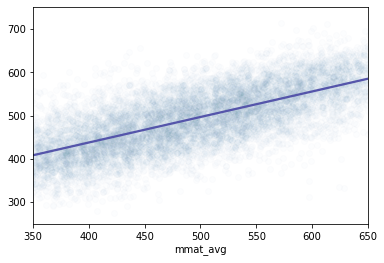

In [500]:
sns.regplot(x=y_test, y=predictions, scatter_kws={'alpha':0.01}, line_kws={'color':'#5555AA'});
plt.xlim(350,650);

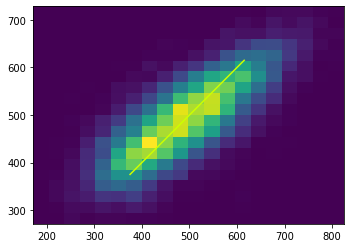

In [501]:
graph, xedges, yedges = np.histogram2d(y_test, predictions, bins=20)
graph = graph.T
plt.imshow(graph, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]]);
x=np.arange(375,625,10)
plt.plot(x,x,color='#CCFF00');

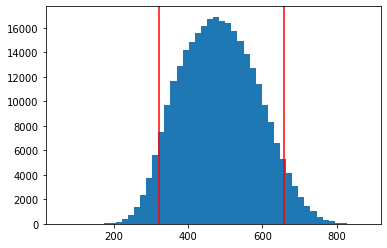

In [502]:
plt.hist(student['mmat_avg'], bins=50);
plt.axvline(student['mmat_avg'].quantile(0.05), color='r');
plt.axvline(student['mmat_avg'].quantile(0.95), color='r');

In [503]:
import statsmodels.api as sm

X_train_Sm = sm.add_constant(X_train)
ls = sm.OLS(y_train, X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:               mmat_avg   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     1839.
Date:                Sun, 14 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:43:37   Log-Likelihood:            -5.0530e+05
No. Observations:               90000   AIC:                         1.011e+06
Df Residuals:                   89926   BIC:                         1.011e+06
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [504]:
x_matrix = sm.add_constant(X_test)
prediction_CI = ls.get_prediction(x_matrix)
prediction_CI = prediction_CI.summary_frame(alpha=0.40)

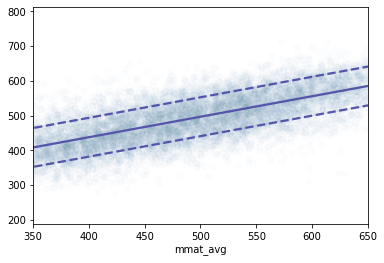

In [505]:
sns.regplot(x=y_test, y=predictions, scatter_kws={'alpha':0.01}, line_kws={'color':'#5555AA'});
sns.regplot(x=y_test, y=prediction_CI.obs_ci_lower.values, scatter_kws={'alpha':0.0}, line_kws={'linestyle':'--','color':'#5555AA'});
sns.regplot(x=y_test, y=prediction_CI.obs_ci_upper.values, scatter_kws={'alpha':0.0}, line_kws={'linestyle':'--','color':'#5555AA'});
plt.xlim(350,650);

In [507]:
school.columns

Index(['IDCNTRY', 'IDSCHOOL', 'grade', 'language', 'disc_prob_score',
       'acad_emph_score', 'math_shortage_score', 'sci_shortage_score',
       'acad_hours', 'disc_prob', 'acad_emph', 'math_shortage', 'sci_shortage',
       'socio_background', 'mmat_avg', 'ssci_avg', 'malg_avg', 'mapp_avg',
       'mdat_avg', 'mgeo_avg', 'mkno_avg', 'mnum_avg', 'mrea_avg', 'sapp_avg',
       'sbio_avg', 'sche_avg', 'sear_avg', 'skno_avg', 'sphy_avg', 'srea_avg'],
      dtype='object')

In [448]:
school['IDCNTRY'] = school['IDCNTRY'].astype(str)

In [449]:
school_sub_set = school[['IDCNTRY','acad_emph_score','disc_prob_score','math_shortage_score','socio_background','mmat_avg','sapp_avg']].dropna()

In [450]:
X = school_sub_set[['IDCNTRY','acad_emph_score','disc_prob_score','math_shortage_score','socio_background']]
X = pd.get_dummies(data=X, drop_first=True)
X.head()

acad_emph_score  disc_prob_score  math_shortage_score  IDCNTRY_158  \
1         12.55044         12.80218             14.25596            0   
2         10.46161          9.25300              9.52239            0   
3         12.86324         12.13532             11.53380            0   
4          9.26475         12.80218             11.26511            0   
5         10.76309          9.51279             12.29366            0   

   IDCNTRY_196  IDCNTRY_246  IDCNTRY_250  IDCNTRY_268  IDCNTRY_344  \
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   
5            0            0            0            0            0   

   IDCNTRY_348  IDCNTRY_36  IDCNTRY_364  IDCNTRY_372  IDCNTRY_376  \
1            0           1            0            0            0   
2            0           1            0            0            0   
3            0           1            0            0            0   
4            0           1            0            0            0   
5            0           1            0            0            0   

   IDCNTRY_380  IDCNTRY_392  IDCNTRY_398  IDCNTRY_400  IDCNTRY_410  \
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   
5            0            0            0            0            0   

   IDCNTRY_422  IDCNTRY_440  IDCNTRY_458  IDCNTRY_48  IDCNTRY_504  \
1            0            0            0           0            0   
2            0            0            0           0            0   
3            0            0            0           0            0   
4            0            0            0           0            0   
5            0            0            0           0            0   

   IDCNTRY_512  IDCNTRY_554  IDCNTRY_578  IDCNTRY_620  IDCNTRY_634  \
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   
5            0            0            0            0            0   

   IDCNTRY_642  IDCNTRY_643  IDCNTRY_643001  IDCNTRY_702  IDCNTRY_710  \
1            0            0               0            0            0   
2            0            0               0            0            0   
3            0            0               0            0            0   
4            0            0               0            0            0   
5            0            0               0            0            0   

   IDCNTRY_710003  IDCNTRY_710004  IDCNTRY_752  IDCNTRY_784  IDCNTRY_7841  \
1               0               0            0            0             0   
2               0               0            0            0             0   
3               0               0            0            0             0   
4               0               0            0            0             0   
5               0               0            0            0             0   

   IDCNTRY_7842  IDCNTRY_792  IDCNTRY_818  IDCNTRY_840  IDCNTRY_9132  \
1             0            0            0            0             0   
2             0            0            0            0             0   
3             0            0            0            0             0   
4             0            0            0            0             0   
5             0            0            0            0             0   

   IDCNTRY_9133  IDCNTRY_926  socio_background_More Disadvantaged  \
1             0            0                                    0  

In [451]:
Y = school_sub_set['mmat_avg']

In [452]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4670, 48)
(3114, 48)
(4670,)
(3114,)


In [453]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [454]:
print(model.intercept_)

343.19945488734936


In [455]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

Coefficient
acad_emph_score                                        8.713077
disc_prob_score                                        2.417945
math_shortage_score                                    2.224930
IDCNTRY_158                                          140.851306
IDCNTRY_196                                           28.617455
IDCNTRY_246                                           41.851116
IDCNTRY_250                                           23.697205
IDCNTRY_268                                           -4.998878
IDCNTRY_344                                          119.240864
IDCNTRY_348                                           59.218582
IDCNTRY_36                                            49.758378
IDCNTRY_364                                            2.915926
IDCNTRY_372                                           55.181545
IDCNTRY_376                                           49.039381
IDCNTRY_380                                           42.107024
IDCNTRY_392                                          122.694999
IDCNTRY_398                                            4.652597
IDCNTRY_400                                          -26.932973
IDCNTRY_410                                          125.933581
IDCNTRY_422                                          -26.330113
IDCNTRY_440                                           28.732055
IDCNTRY_458                                           47.467668
IDCNTRY_48                                            14.157302
IDCNTRY_504                                          -39.811462
IDCNTRY_512                                          -58.041026
IDCNTRY_554                                           24.324098
IDCNTRY_578                                           38.152864
IDCNTRY_620                                           50.035945
IDCNTRY_634                                          -32.389820
IDCNTRY_642                                           20.854964
IDCNTRY_643                                           74.884733
IDCNTRY_643001                                        94.260769
IDCNTRY_702                                          139.090984
IDCNTRY_710                                          -20.753439
IDCNTRY_710003                                        -9.203000
IDCNTRY_710004                                         8.931237
IDCNTRY_752                                           31.446856
IDCNTRY_784                                          -12.555280
IDCNTRY_7841                                          47.508590
IDCNTRY_7842                                         -45.556459
IDCNTRY_792                                           42.504841
IDCNTRY_818                                          -33.529957
IDCNTRY_840                                           62.857146
IDCNTRY_9132                                          56.126409
IDCNTRY_9133                                          73.400219
IDCNTRY_926                                           45.078193
socio_background_More Disadvantaged                  -38.920693
socio_background_Neither More Affluent nor More...   -16.144269

In [456]:
predictions = model.predict(X_test)

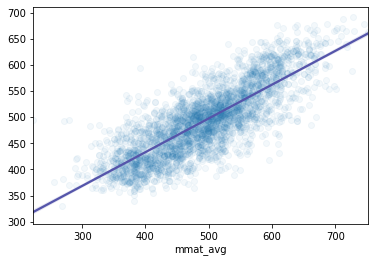

In [457]:
sns.regplot(x=y_test, y=predictions, scatter_kws={'alpha':0.05}, line_kws={'color':'#5555AA'});

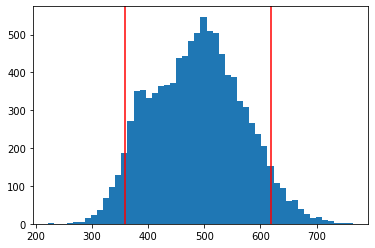

In [458]:
plt.hist(school['mmat_avg'], bins=50);
plt.axvline(school['mmat_avg'].quantile(0.05), color='r');
plt.axvline(school['mmat_avg'].quantile(0.95), color='r');

In [459]:
import statsmodels.api as sm

X_train_Sm = sm.add_constant(X_train)
ls = sm.OLS(y_train, X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:               mmat_avg   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     173.1
Date:                Sun, 14 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:30:42   Log-Likelihood:                -24737.
No. Observations:                4670   AIC:                         4.957e+04
Df Residuals:                    4621   BIC:                         4.989e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [460]:
x_matrix = sm.add_constant(X_test)
prediction_CI = ls.get_prediction(x_matrix)
prediction_CI = prediction_CI.summary_frame(alpha=0.10)

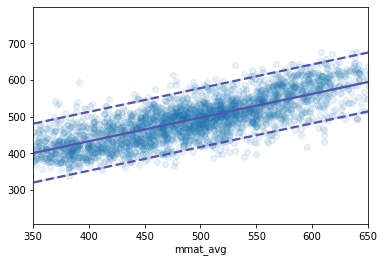

In [462]:
sns.regplot(x=y_test, y=predictions, scatter_kws={'alpha':0.1}, line_kws={'color':'#5555AA'});
sns.regplot(x=y_test, y=prediction_CI.obs_ci_lower.values, scatter_kws={'alpha':0.0}, line_kws={'linestyle':'--','color':'#5555AA'});
sns.regplot(x=y_test, y=prediction_CI.obs_ci_upper.values, scatter_kws={'alpha':0.0}, line_kws={'linestyle':'--','color':'#5555AA'});
plt.xlim(350,650);

In [463]:
math_teach.columns

Index(['IDCNTRY', 'IDSCHOOL', 'IDTEALIN', 'IDTEACH', 'IDLINK', 'experience',
       'sex', 'age', 'prob_class_size', 'prob_much_material', 'prob_much_time',
       'prob_need_prep', 'prob_need_class_time', 'prob_much_pressure',
       'prob_change_material', 'prob_admin_tasks', 'class_size',
       'stud_lang_diff', 'style_daily_lives', 'style_explain_work',
       'style_challenge', 'style_discussion', 'style_link_previous',
       'style_procedures', 'style_express_ideas', 'class_time',
       'stud_explain_new', 'stud_explain_solve', 'stud_memorize',
       'stud_practice', 'stud_apply', 'stud_class_work', 'stud_heterogeneous',
       'stud_homogenous', 'computer_math', 'computer_stud', 'computer_class',
       'computer_school', 'computer_class_freq', 'computer_low_freq',
       'computer_high_freq', 'computer_spec_freq', 'hw_freq', 'hw_time',
       'hw_correct', 'hw_self_correct', 'hw_discuss', 'hw_complete',
       'hw_graded', 'assess_observe', 'assess_ask', 'assess_short',
   

In [464]:
math_teach['IDCNTRY'] = math_teach['IDCNTRY'].astype(str)

In [465]:
math_teach_sub_set = math_teach[['IDCNTRY','experience','style_daily_lives', 'style_explain_work',
       'style_challenge', 'style_discussion', 'style_link_previous',
       'style_procedures', 'style_express_ideas', 'class_time',
       'stud_explain_new', 'stud_explain_solve', 'stud_memorize',
       'stud_practice', 'stud_apply', 'stud_class_work', 'stud_heterogeneous',
       'stud_homogenous', 'computer_class', 'hw_freq', 'hw_time',
       'hw_self_correct', 'hw_graded', 'assess_observe', 'assess_ask', 'assess_short',
       'assess_long', 'assess_projects', 'pd_hours',
       'school_acad_focus_score', 'limited_by_needs_score',
       'school_safe_score', 'job_satisfaction_score','study_stem', 'study_edu','edu_level','mmat_avg']].dropna()

In [466]:
X = math_teach_sub_set[['IDCNTRY','experience','style_daily_lives', 'style_explain_work',
       'style_challenge', 'style_discussion', 'style_link_previous',
       'style_procedures', 'style_express_ideas', 'class_time',
       'stud_explain_new', 'stud_explain_solve', 'stud_memorize',
       'stud_practice', 'stud_apply', 'stud_class_work', 'stud_heterogeneous',
       'stud_homogenous', 'computer_class', 'hw_freq', 'hw_time',
       'hw_self_correct', 'hw_graded', 'assess_observe', 'assess_ask', 'assess_short',
       'assess_long', 'assess_projects', 'pd_hours',
       'school_acad_focus_score', 'limited_by_needs_score',
       'school_safe_score', 'job_satisfaction_score','study_stem', 'study_edu','edu_level']]
X = pd.get_dummies(data=X, drop_first=True)
X.head()

experience  style_daily_lives  style_explain_work  style_challenge  \
0        16.0                1.0                 3.0              2.0   
2        22.0                1.0                 2.0              3.0   
3         3.0                1.0                 3.0              2.0   
5        16.0                2.0                 2.0              3.0   
7         1.0                2.0                 1.0              1.0   

   style_discussion  style_link_previous  style_procedures  \
0               3.0                  2.0               2.0   
2               2.0                  3.0               2.0   
3               2.0                  3.0               2.0   
5               2.0                  3.0               3.0   
7               2.0                  2.0               2.0   

   style_express_ideas  class_time  stud_explain_new  stud_explain_solve  \
0                  3.0       210.0               3.0                 1.0   
2                  2.0       200.0               3.0                 3.0   
3                  2.0       228.0               3.0                 3.0   
5                  3.0       240.0               2.0                 2.0   
7                  2.0       250.0               3.0                 3.0   

   stud_memorize  stud_practice  stud_apply  stud_class_work  \
0            1.0            2.0         2.0              1.0   
2            3.0            3.0         3.0              3.0   
3            1.0            3.0         2.0              2.0   
5            1.0            2.0         3.0              2.0   
7            2.0            2.0         2.0              3.0   

   stud_heterogeneous  stud_homogenous  computer_class  hw_freq  hw_time  \
0                 2.0              1.0             0.0      2.0     60.0   
2                 0.0              1.0             1.0      2.0     30.0   
3                 2.0              1.0             0.0      1.0     30.0   
5                 2.0              2.0             0.0      2.0     30.0   
7                 1.0              1.0             1.0      2.0     30.0   

   hw_self_correct  hw_graded  assess_observe  assess_ask  assess_short  \
0              0.0        0.0             1.0         1.0           1.0   
2              1.0        2.0             2.0         2.0           2.0   
3              1.0        0.0             2.0         2.0           0.0   
5              1.0        1.0             1.0         1.0           2.0   
7              1.0        0.0             2.0         2.0           2.0   

   assess_long  assess_projects  school_acad_focus_score  \
0          2.0              0.0                 13.12465   
2          2.0              0.0                 10.35236   
3          1.0              1.0                 10.65284   
5          2.0              1.0                 13.86227   
7          0.0              0.0                 10.95225   

   limited_by_needs_score  school_safe_score  job_satisfaction_score  \
0                12.67245           10.58171                10.25874   
2                11.28828           12.56459                11.74559   
3                 9.11668            9.18523                10.82008   
5                 9.11668           11.78998                11.74559   
7                 8.15603           10.58171                10.25874   

   study_stem  study_edu  IDCNTRY_158  IDCNTRY_196  IDCNTRY_246  IDCNTRY_250  \
0           1          1            0            0            0            0   
2           1          0            0            0            0            0   
3           1          1            0            0            0            0   
5           1          1            0            0            0            0   
7           0          1            0            0            0            0   

   IDCNTRY_268  IDCNTRY_344  IDCNTRY_348  IDCNTRY_36  IDCNTRY_364  \
0            0            0            0           1            0   
2            0            0 

In [467]:
Y = math_teach_sub_set['mmat_avg']

In [468]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3049, 88)
(1307, 88)
(3049,)
(1307,)


In [469]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [470]:
print(model.intercept_)

332.2720262758373


In [471]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

Coefficient
experience                      0.028558
style_daily_lives             -11.304789
style_explain_work              3.958862
style_challenge                12.258394
style_discussion               -1.406712
style_link_previous            -0.112383
style_procedures                3.924571
style_express_ideas             0.732846
class_time                     -0.036326
stud_explain_new                2.141261
stud_explain_solve             -3.034688
stud_memorize                  -6.507720
stud_practice                  -0.301477
stud_apply                      3.201417
stud_class_work                -3.423927
stud_heterogeneous             -3.018872
stud_homogenous                 0.162264
computer_class                 -0.868214
hw_freq                         4.350022
hw_time                         0.397103
hw_self_correct                 5.001305
hw_graded                      -7.444831
assess_observe                 -5.054595
assess_ask                      1.707022
assess_short                   -5.112873
assess_long                     8.468329
assess_projects                -2.069019
school_acad_focus_score         6.397565
limited_by_needs_score          9.996265
school_safe_score               0.939486
job_satisfaction_score         -2.916266
study_stem                     18.408122
study_edu                       0.720603
IDCNTRY_158                   136.356408
IDCNTRY_196                    51.550750
IDCNTRY_246                    29.231258
IDCNTRY_250                    18.324644
IDCNTRY_268                    -0.436446
IDCNTRY_344                   101.980124
IDCNTRY_348                    58.691487
IDCNTRY_36                     69.969112
IDCNTRY_364                    17.906817
IDCNTRY_372                    32.484783
IDCNTRY_376                    37.982963
IDCNTRY_380                    17.564620
IDCNTRY_392                   116.963245
IDCNTRY_398                    27.347462
IDCNTRY_400                    -4.060599
IDCNTRY_410                   133.679041
IDCNTRY_414                   -25.280688
IDCNTRY_422                   -34.590977
IDCNTRY_440                    49.516311
IDCNTRY_458                    55.727461
IDCNTRY_48                     17.276961
IDCNTRY_504                   -13.018475
IDCNTRY_512                    19.099121
IDCNTRY_554                    24.750357
IDCNTRY_578                    33.062998
IDCNTRY_620                    51.614618
IDCNTRY_634                     4.991028
IDCNTRY_642                    11.998559
IDCNTRY_643                    83.798454
IDCNTRY_643001                118.603443
IDCNTRY_682                   -23.533566
IDCNTRY_702                   141.265562
IDCNTRY_710                     4.897557
IDCNTRY_710003                -57.135328
IDCNTRY_710004                 35.959600
IDCNTRY_752                    35.384076
IDCNTRY_784                     7.719059
IDCNTRY_7841                   58.083110
IDCNTRY_7842                  -24.800485
IDCNTRY_792                    64.333499
IDCNTRY_818                   -21.817565
IDCNTRY_840                    67.166482
IDCNTRY_9132                   84.770431
IDCNTRY_9133                   78.130840
IDCNTRY_926                    17.922467
pd_hours_6–15 hours            12.809182
pd_hours_Less than 6 hours      5.654786
pd_hours_More than 35 hours    -3.875238
pd_hours_None                  -2.416986
edu_level_ISCED Level 3       -53.852521
edu_level_ISCED Level 4       -64.946059
edu_level_ISCED Level 5       -62.593622
edu_level_ISCED Level 6       -55.732139
edu_level_ISCED Level 7       -40.513588
edu_level_ISCED Level 8       -41.409187

In [472]:
predictions = model.predict(X_test)

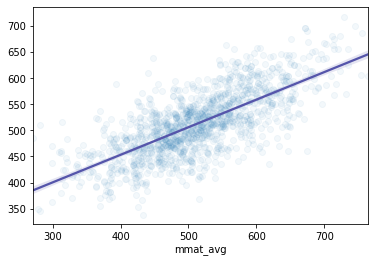

In [473]:
sns.regplot(x=y_test, y=predictions, scatter_kws={'alpha':0.05}, line_kws={'color':'#5555AA'});

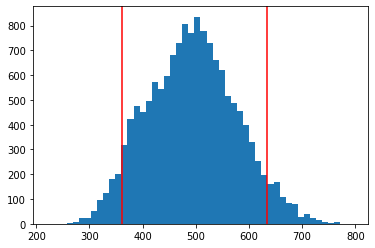

In [474]:
plt.hist(math_teach['mmat_avg'], bins=50);
plt.axvline(math_teach['mmat_avg'].quantile(0.05), color='r');
plt.axvline(math_teach['mmat_avg'].quantile(0.95), color='r');

In [475]:
import statsmodels.api as sm

X_train_Sm = sm.add_constant(X_train)
ls = sm.OLS(y_train, X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:               mmat_avg   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     40.02
Date:                Sun, 14 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:33:23   Log-Likelihood:                -16584.
No. Observations:                3049   AIC:                         3.335e+04
Df Residuals:                    2960   BIC:                         3.388e+04
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [476]:
x_matrix = sm.add_constant(X_test)
prediction_CI = ls.get_prediction(x_matrix)
prediction_CI = prediction_CI.summary_frame(alpha=0.10)

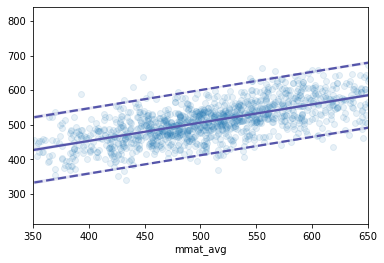

In [478]:
sns.regplot(x=y_test, y=predictions, scatter_kws={'alpha':0.1}, line_kws={'color':'#5555AA'});
sns.regplot(x=y_test, y=prediction_CI.obs_ci_lower.values, scatter_kws={'alpha':0.0}, line_kws={'linestyle':'--','color':'#5555AA'});
sns.regplot(x=y_test, y=prediction_CI.obs_ci_upper.values, scatter_kws={'alpha':0.0}, line_kws={'linestyle':'--','color':'#5555AA'});
plt.xlim(350,650);

In [508]:
sci_teach.columns

Index(['IDCNTRY', 'IDSCHOOL', 'IDTEALIN', 'IDTEACH', 'IDLINK', 'ITCOURSE',
       'experience', 'sex', 'age', 'prob_class_size', 'prob_much_material',
       'prob_much_time', 'prob_need_prep', 'prob_need_class_time',
       'prob_much_pressure', 'prob_change_material', 'prob_admin_tasks',
       'class_size', 'stud_lang_diff', 'style_daily_lives',
       'style_explain_work', 'style_challenge', 'style_discussion',
       'style_link_previous', 'style_procedures', 'style_express_ideas',
       'class_time', 'stud_explain_new', 'stud_observe_phenom',
       'stud_demo_exp', 'stud_plan_exp', 'stud_conduct_exp', 'stud_present',
       'stud_interpret', 'stud_use_evid', 'stud_read_text', 'stud_memorize',
       'stud_formulas', 'stud_field', 'stud_heterogeneous', 'stud_homogenous',
       'computer_sci', 'computer_stud', 'computer_class', 'computer_school',
       'computer_class_freq', 'computer_low_freq', 'computer_high_freq',
       'computer_spec_freq', 'hw_freq', 'hw_time', 'hw_correc

In [509]:
sci_teach['IDCNTRY'] = sci_teach['IDCNTRY'].astype(str)

In [529]:
sci_teach_sub_set = sci_teach[['IDCNTRY','experience','style_daily_lives',
       'style_explain_work', 'style_challenge', 'style_discussion',
       'style_link_previous', 'style_procedures', 'style_express_ideas', 'class_time',
       'stud_explain_new', 'stud_observe_phenom',
       'stud_demo_exp', 'stud_plan_exp', 'stud_conduct_exp', 'stud_present',
       'stud_interpret', 'stud_use_evid', 'stud_read_text', 'stud_memorize',
       'stud_formulas', 'stud_field', 'stud_heterogeneous', 'stud_homogenous', 'computer_class', 'hw_freq', 'hw_time',
       'hw_self_correct', 'hw_graded', 'assess_observe', 'assess_ask', 'assess_short',
       'assess_long', 'assess_projects', 'pd_hours',
       'school_acad_focus_score', 'limited_by_needs_score',
       'school_safe_score', 'job_satisfaction_score','study_stem', 'study_edu','edu_level','sapp_avg']].dropna()
sci_teach_sub_set = sci_teach[['experience','style_daily_lives',
       'style_explain_work', 'style_challenge', 'style_discussion',
       'style_link_previous', 'style_procedures', 'style_express_ideas', 'class_time',
       'stud_explain_new', 'stud_observe_phenom',
       'stud_demo_exp', 'stud_plan_exp', 'stud_conduct_exp', 'stud_present',
       'stud_interpret', 'stud_use_evid', 'stud_read_text', 'stud_memorize',
       'stud_formulas', 'stud_field', 'stud_heterogeneous', 'stud_homogenous', 'computer_class', 'hw_freq', 'hw_time',
       'hw_self_correct', 'hw_graded', 'assess_observe', 'assess_ask', 'assess_short',
       'assess_long', 'assess_projects', 'pd_hours',
       'school_acad_focus_score', 'limited_by_needs_score',
       'school_safe_score', 'job_satisfaction_score','study_stem', 'study_edu','edu_level','sapp_avg']].dropna()

In [530]:
X = sci_teach_sub_set[['experience','style_daily_lives',
       'style_explain_work', 'style_challenge', 'style_discussion',
       'style_link_previous', 'style_procedures', 'style_express_ideas', 'class_time',
       'stud_explain_new', 'stud_observe_phenom',
       'stud_demo_exp', 'stud_plan_exp', 'stud_conduct_exp', 'stud_present',
       'stud_interpret', 'stud_use_evid', 'stud_read_text', 'stud_memorize',
       'stud_formulas', 'stud_field', 'stud_heterogeneous', 'stud_homogenous', 'computer_class', 'hw_freq', 'hw_time',
       'hw_self_correct', 'hw_graded', 'assess_observe', 'assess_ask', 'assess_short',
       'assess_long', 'assess_projects', 'pd_hours',
       'school_acad_focus_score', 'limited_by_needs_score',
       'school_safe_score', 'job_satisfaction_score','study_stem', 'study_edu','edu_level']]
X = pd.get_dummies(data=X, drop_first=True)
X.head()

experience  style_daily_lives  style_explain_work  style_challenge  \
0        16.0                2.0                 3.0              2.0   
2         4.0                1.0                 1.0              1.0   
3        15.0                3.0                 3.0              1.0   
4        14.0                2.0                 2.0              1.0   
5         6.0                1.0                 3.0              1.0   

   style_discussion  style_link_previous  style_procedures  \
0               3.0                  2.0               3.0   
2               2.0                  2.0               0.0   
3               2.0                  3.0               1.0   
4               1.0                  1.0               0.0   
5               3.0                  3.0               2.0   

   style_express_ideas  class_time  stud_explain_new  stud_observe_phenom  \
0                  3.0       140.0               2.0                  2.0   
2                  2.0       250.0               3.0                  0.0   
3                  3.0       200.0               3.0                  2.0   
4                  3.0       200.0               3.0                  2.0   
5                  2.0       200.0               2.0                  2.0   

   stud_demo_exp  stud_plan_exp  stud_conduct_exp  stud_present  \
0            2.0            1.0               1.0           1.0   
2            2.0            2.0               2.0           2.0   
3            3.0            2.0               2.0           2.0   
4            1.0            2.0               1.0           2.0   
5            1.0            1.0               2.0           1.0   

   stud_interpret  stud_use_evid  stud_read_text  stud_memorize  \
0             2.0            1.0             3.0            2.0   
2             2.0            2.0             2.0            3.0   
3             2.0            2.0             3.0            3.0   
4             2.0            2.0             1.0            0.0   
5             2.0            2.0             2.0            3.0   

   stud_formulas  stud_field  stud_heterogeneous  stud_homogenous  \
0            1.0         1.0                 2.0              1.0   
2            2.0         1.0                 1.0              2.0   
3            1.0         1.0                 3.0              1.0   
4            3.0         1.0                 1.0              3.0   
5            3.0         1.0                 2.0              2.0   

   computer_class  hw_freq  hw_time  hw_self_correct  hw_graded  \
0             0.0      2.0     30.0              2.0        1.0   
2             0.0      1.0     60.0              1.0        0.0   
3             1.0      1.0     30.0              0.0        1.0   
4             1.0      1.0     30.0              0.0        0.0   
5             1.0      2.0     15.0              0.0        0.0   

   assess_observe  assess_ask  assess_short  assess_long  assess_projects  \
0             2.0         2.0           1.0          1.0              1.0   
2             2.0         2.0           2.0          2.0              0.0   
3             2.0         2.0           2.0          2.0              2.0   
4             2.0         2.0           1.0          1.0              1.0   
5             1.0         2.0           1.0          1.0              1.0   

   school_acad_focus_score  limited_by_needs_score  school_safe_score  \
0                  8.84690                10.14509            9.18523   
2                  8.54651                 9.11668            8.39631   
3                 12.15607                 7.67828           11.14932   
4                 10.95225                 9.61910            9.18523   
5                  7.30893                 9.61910            9.18523   

   job_satisfaction_score  study_stem  study_edu  pd_hours_6–15 hours  \
0                 6.74486           1          1                    1   
2                 7.21969           1          1        

In [531]:
Y = sci_teach_sub_set['sapp_avg']

In [532]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4810, 49)
(2062, 49)
(4810,)
(2062,)


In [533]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [534]:
print(model.intercept_)

442.09684696348734


In [535]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

Coefficient
experience                     -0.007661
style_daily_lives              -2.144519
style_explain_work              6.741624
style_challenge                10.286924
style_discussion               -1.335197
style_link_previous             4.332406
style_procedures               -7.694613
style_express_ideas            -0.495118
class_time                     -0.049606
stud_explain_new               -2.592742
stud_observe_phenom            -3.842381
stud_demo_exp                  -3.572792
stud_plan_exp                  -9.367073
stud_conduct_exp               11.239160
stud_present                   -5.327332
stud_interpret                  4.012682
stud_use_evid                   4.456167
stud_read_text                 -6.228750
stud_memorize                  -7.306027
stud_formulas                   3.603020
stud_field                     -4.257510
stud_heterogeneous             -6.066937
stud_homogenous                -4.538246
computer_class                  2.603518
hw_freq                        -4.331182
hw_time                         0.258082
hw_self_correct                 8.388152
hw_graded                      -6.895750
assess_observe                 -9.093870
assess_ask                      6.047714
assess_short                    4.443217
assess_long                     8.690929
assess_projects                 1.253832
school_acad_focus_score         6.595573
limited_by_needs_score          9.731356
school_safe_score               0.619710
job_satisfaction_score         -4.154086
study_stem                     14.214499
study_edu                       1.561133
pd_hours_6–15 hours            -1.818870
pd_hours_Less than 6 hours      1.627427
pd_hours_More than 35 hours    -5.595036
pd_hours_None                  -7.327064
edu_level_ISCED Level 3       -75.477402
edu_level_ISCED Level 4      -105.157544
edu_level_ISCED Level 5       -98.583953
edu_level_ISCED Level 6       -64.332513
edu_level_ISCED Level 7       -51.352095
edu_level_ISCED Level 8       -37.881284

In [536]:
predictions = model.predict(X_test)

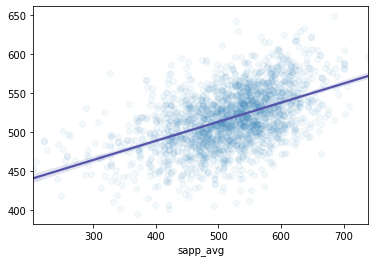

In [537]:
sns.regplot(x=y_test, y=predictions, scatter_kws={'alpha':0.05}, line_kws={'color':'#5555AA'});

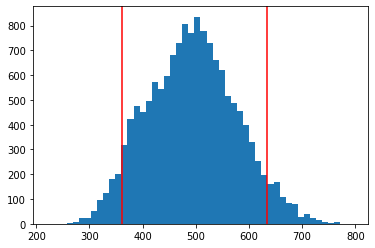

In [538]:
plt.hist(math_teach['mmat_avg'], bins=50);
plt.axvline(math_teach['mmat_avg'].quantile(0.05), color='r');
plt.axvline(math_teach['mmat_avg'].quantile(0.95), color='r');

In [539]:
import statsmodels.api as sm

X_train_Sm = sm.add_constant(X_train)
ls = sm.OLS(y_train, X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:               sapp_avg   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     29.83
Date:                Sun, 14 Mar 2021   Prob (F-statistic):          5.24e-236
Time:                        18:03:25   Log-Likelihood:                -27135.
No. Observations:                4810   AIC:                         5.437e+04
Df Residuals:                    4760   BIC:                         5.469e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [543]:
x_matrix = sm.add_constant(X_test)
prediction_CI = ls.get_prediction(x_matrix)
prediction_CI = prediction_CI.summary_frame(alpha=0.10)

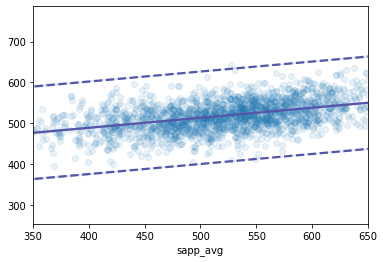

In [544]:
sns.regplot(x=y_test, y=predictions, scatter_kws={'alpha':0.1}, line_kws={'color':'#5555AA'});
sns.regplot(x=y_test, y=prediction_CI.obs_ci_lower.values, scatter_kws={'alpha':0.0}, line_kws={'linestyle':'--','color':'#5555AA'});
sns.regplot(x=y_test, y=prediction_CI.obs_ci_upper.values, scatter_kws={'alpha':0.0}, line_kws={'linestyle':'--','color':'#5555AA'});
plt.xlim(350,650);

In [567]:
school['socio_background'].value_counts()

More Affluent                                   3173
More Disadvantaged                              2880
Neither More Affluent nor More Disadvantaged    2631
Name: socio_background, dtype: int64

In [785]:
school.columns

Index(['IDCNTRY', 'IDSCHOOL', 'grade', 'language', 'disc_prob_score',
       'acad_emph_score', 'math_shortage_score', 'sci_shortage_score',
       'acad_hours', 'disc_prob', 'acad_emph', 'math_shortage', 'sci_shortage',
       'socio_background', 'mmat_avg', 'ssci_avg', 'malg_avg', 'mapp_avg',
       'mdat_avg', 'mgeo_avg', 'mkno_avg', 'mnum_avg', 'mrea_avg', 'sapp_avg',
       'sbio_avg', 'sche_avg', 'sear_avg', 'skno_avg', 'sphy_avg', 'srea_avg'],
      dtype='object')

In [554]:
math_teach.columns

Index(['IDCNTRY', 'IDSCHOOL', 'IDTEALIN', 'IDTEACH', 'IDLINK', 'experience',
       'sex', 'age', 'prob_class_size', 'prob_much_material', 'prob_much_time',
       'prob_need_prep', 'prob_need_class_time', 'prob_much_pressure',
       'prob_change_material', 'prob_admin_tasks', 'class_size',
       'stud_lang_diff', 'style_daily_lives', 'style_explain_work',
       'style_challenge', 'style_discussion', 'style_link_previous',
       'style_procedures', 'style_express_ideas', 'class_time',
       'stud_explain_new', 'stud_explain_solve', 'stud_memorize',
       'stud_practice', 'stud_apply', 'stud_class_work', 'stud_heterogeneous',
       'stud_homogenous', 'computer_math', 'computer_stud', 'computer_class',
       'computer_school', 'computer_class_freq', 'computer_low_freq',
       'computer_high_freq', 'computer_spec_freq', 'hw_freq', 'hw_time',
       'hw_correct', 'hw_self_correct', 'hw_discuss', 'hw_complete',
       'hw_graded', 'assess_observe', 'assess_ask', 'assess_short',
   

In [647]:
new_set = school.set_index(['IDCNTRY','IDSCHOOL']).join(math_teach.groupby(['IDCNTRY','IDSCHOOL']).mean().loc[:,['class_size','experience','job_satisfaction_score','class_time']]
                                                        .join(sci_teach.groupby(['IDCNTRY','IDSCHOOL']).mean().loc[:,['class_size','experience','job_satisfaction_score','class_time']], 
                                                              lsuffix="_math", rsuffix="_sci")).dropna()

In [806]:
new_set.reset_index(inplace=True)
new_set['IDCNTRY'] = new_set['IDCNTRY'].astype(int)

In [807]:
X = new_set[['IDCNTRY','disc_prob_score','acad_emph_score','acad_hours','class_size_math','class_time_math','experience_math','class_size_sci','class_time_sci','experience_sci','mmat_avg','sapp_avg']]
y = new_set.socio_background
print(X.shape)
print(y.shape)

(5801, 12)
(5801,)


In [808]:
from sklearn.model_selection import train_test_split

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [809]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 10, random_state=0, bootstrap=True)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [810]:
predictions = clf.predict(X_test)

In [811]:
(y_test == predictions).mean()

0.6073107049608355

In [812]:
from xgboost import XGBClassifier
# Create a classifier
xgb = XGBClassifier(booster='gbtree', random_state=42, eval_metric="rmse", num_class=3)
# Fit the classifier with the training data
xgb.fit(X_train,y_train)

C:\Users\sjhal\Anaconda3\envs\capstone\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='rmse',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_class=3, num_parallel_tree=1, objective='multi:softprob',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [813]:
predictions_xgb = xgb.predict(X_test)

In [814]:
(y_test == predictions_xgb).mean()

0.6349869451697128

In [815]:
(predictions == predictions_xgb).mean()

0.7154046997389034

In [816]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{'More Affluent': 721,
 'More Disadvantaged': 580,
 'Neither More Affluent nor More Disadvantaged': 614}

In [817]:
unique, counts = np.unique(predictions, return_counts=True)
dict(zip(unique, counts))

{'More Affluent': 825,
 'More Disadvantaged': 623,
 'Neither More Affluent nor More Disadvantaged': 467}

In [818]:
unique, counts = np.unique(predictions_xgb, return_counts=True)
dict(zip(unique, counts))

{'More Affluent': 775,
 'More Disadvantaged': 613,
 'Neither More Affluent nor More Disadvantaged': 527}

In [819]:
output = pd.DataFrame()
output['Expected Output'] = y_test
output['RF Output'] = predictions
output['XGB Output'] = predictions_xgb
output.head(20)

Expected Output  \
3737                            More Disadvantaged   
1103                            More Disadvantaged   
812                             More Disadvantaged   
1632                                 More Affluent   
1128                                 More Affluent   
1412                            More Disadvantaged   
712                             More Disadvantaged   
4464                                 More Affluent   
177   Neither More Affluent nor More Disadvantaged   
3599                                 More Affluent   
4437  Neither More Affluent nor More Disadvantaged   
1244                            More Disadvantaged   
1448  Neither More Affluent nor More Disadvantaged   
3783                                 More Affluent   
4680                                 More Affluent   
1117                            More Disadvantaged   
5282                            More Disadvantaged   
2164                                 More Affluent   
787   Neither More Affluent nor More Disadvantaged   
624   Neither More Affluent nor More Disadvantaged   

                                         RF Output  \
3737  Neither More Affluent nor More Disadvantaged   
1103                            More Disadvantaged   
812   Neither More Affluent nor More Disadvantaged   
1632  Neither More Affluent nor More Disadvantaged   
1128                                 More Affluent   
1412                            More Disadvantaged   
712                             More Disadvantaged   
4464                                 More Affluent   
177   Neither More Affluent nor More Disadvantaged   
3599                                 More Affluent   
4437                                 More Affluent   
1244                            More Disadvantaged   
1448  Neither More Affluent nor More Disadvantaged   
3783                                 More Affluent   
4680                                 More Affluent   
1117  Neither More Affluent nor More Disadvantaged   
5282                            More Disadvantaged   
2164                                 More Affluent   
787   Neither More Affluent nor More Disadvantaged   
624                             More Disadvantaged   

                                        XGB Output  
3737  Neither More Affluent nor More Disadvantaged  
1103                            More Disadvantaged  
812                             More Disadvantaged  
1632  Neither More Affluent nor More Disadvantaged  
1128                                 More Affluent  
1412                            More Disadvantaged  
712                             More Disadvantaged  
4464                                 More Affluent  
177   Neither More Affluent nor More Disadvantaged  
3599                                 More Affluent  
4437  Neither More Affluent nor More Disadvantaged  
1244                            More Disadvantaged  
1448  Neither More Affluent nor More Disadvantaged  
3783  Neither More Affluent nor More Disadvantaged  
4680                            More Disadvantaged  
1117                            More Disadvantaged  
5282                            More Disadvantaged  
2164                                 More Affluent  
787   Neither More Affluent nor More Disadvantaged  
624   Neither More Affluent nor More Disadvantaged

[Return to Top](#top)

<div id='evaluate_results'></div>

# Evaluate Results

[Return to Top](#top)

<div id='deploy_model'></div>

# Deploy Model